**<font size="5">read in data**

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
#read data
df = pd.read_csv("D:/data1030/project/ML_data.csv")

print(df.shape)
print(df.head())

print(df.dtypes)

(633, 34)
         date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
0  1971-01-01  358.0200     NaN     NaN     NaN     NaN     NaN     NaN   
1  1971-02-01  357.5450     NaN     NaN     NaN     NaN     NaN     NaN   
2  1971-03-01  357.5187     NaN     NaN     NaN     NaN     NaN     NaN   
3  1971-04-01  357.5032     NaN     NaN     NaN     NaN     NaN     NaN   
4  1971-05-01  357.4130     NaN     NaN     NaN     NaN     NaN     NaN   

   ExLag7  ExLag8  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  \
0     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

   R2Lag7  R2Lag8  R2Lag9  R2Lag10  
0     NaN     NaN     NaN      NaN  
1     NaN     NaN   

In [3]:
#check if there is any missing data
perc_missing_per_ftr = df.isnull().sum(axis = 0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

frac_missing = sum(df.isnull().sum(axis = 1) != 0 )/ df.shape[0]
print('fraction of points with missing values:')
print(frac_missing)

fraction of missing values in features:
ExLag1     0.015798
ExLag2     0.015798
ExLag3     0.015798
ExLag4     0.015798
ExLag5     0.015798
ExLag6     0.015798
ExLag7     0.015798
ExLag8     0.015798
ExLag9     0.015798
ExLag10    0.015798
R1Lag1     0.015798
R1Lag2     0.015798
R1Lag3     0.015798
R1Lag4     0.015798
R1Lag5     0.015798
R1Lag6     0.015798
R1Lag7     0.015798
R1Lag8     0.015798
R1Lag9     0.015798
R1Lag10    0.015798
R2         0.121643
R2Lag1     0.137441
R2Lag2     0.137441
R2Lag3     0.137441
R2Lag4     0.137441
R2Lag5     0.137441
R2Lag6     0.137441
R2Lag7     0.137441
R2Lag8     0.137441
R2Lag9     0.137441
R2Lag10    0.137441
dtype: float64
fraction of points with missing values:
0.13744075829383887


In [4]:
#check if the data is correct
print(df[df['Ex']>360].any().any())
print(df[df['Ex']<70].any().any())
print(df[df['R1']<0].any().any())
print(df[df['R2']<0].any().any())

False
False
False
False


In [5]:
print(df['Ex'].describe())

count    633.000000
mean     156.705209
std       70.992032
min       76.643000
25%      108.068500
50%      121.635000
75%      216.285200
max      358.020000
Name: Ex, dtype: float64


**<font size="5">EDA**

Text(0, 0.5, 'Count')

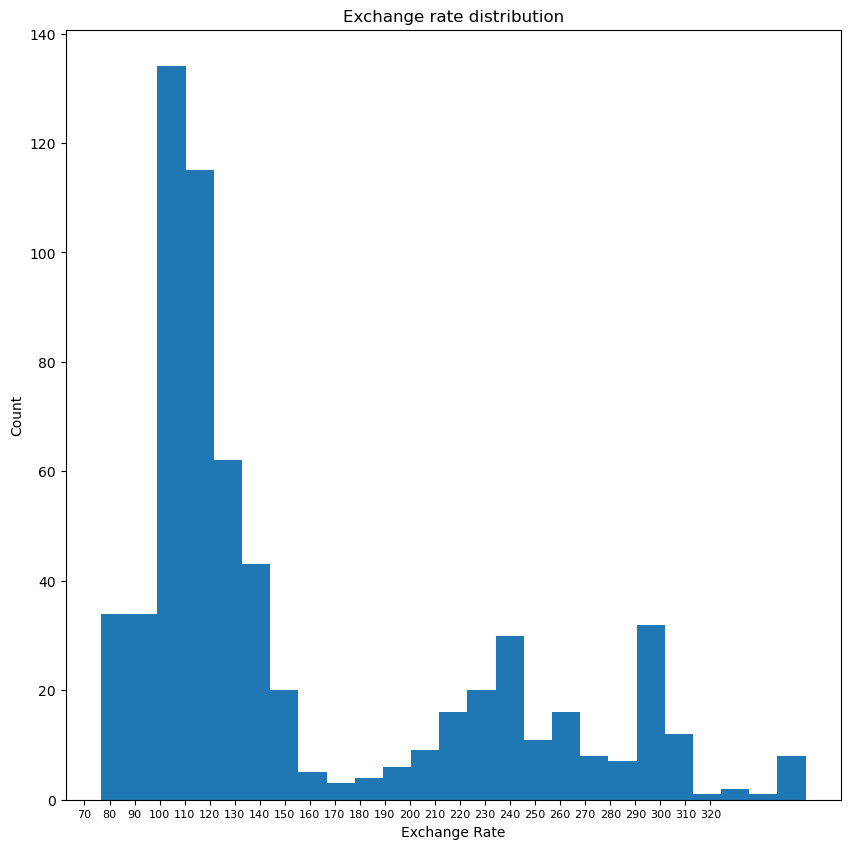

In [6]:
import matplotlib 
from matplotlib import pylab as plt

plt.figure(figsize = (10,10))


df['Ex'].plot.hist(bins = int(np.sqrt(df.shape[0])))
x_ticks_labels = [10*i for i in range (7,33)]
plt.title('Exchange rate distribution')
plt.xticks(x_ticks_labels,fontsize = 8)
plt.xlabel('Exchange Rate')
plt.ylabel('Count')

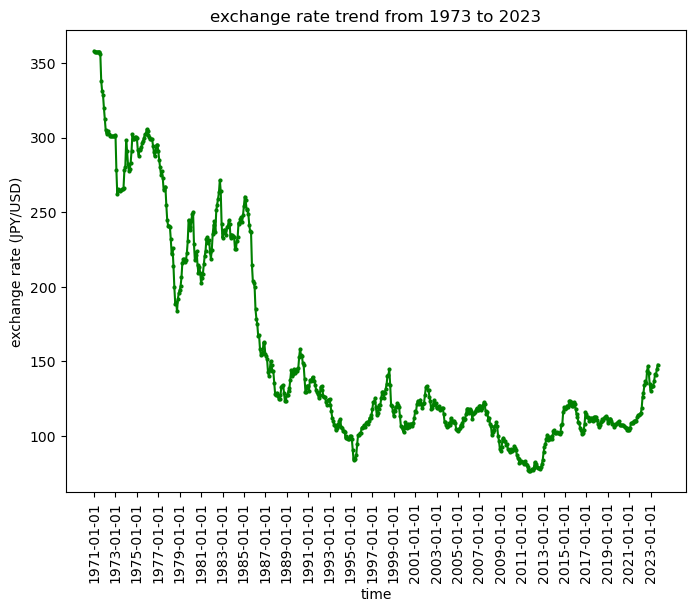

In [7]:
from matplotlib.dates import MonthLocator, DateFormatter

plt.figure(figsize = (8,6))
plt.plot( df['date'],df['Ex'], label='Exchange rate trend', color='green', marker='o', markersize=2)

plt.xticks(np.arange(len(df['date']))[::24],df['date'].iloc[::24],rotation = 90)
plt.ylabel('exchange rate (JPY/USD)')
plt.xlabel('time')
plt.title('exchange rate trend from 1973 to 2023')
# plt.savefig('figures/EX_trend', dpi=350, bbox_inches = 'tight')
plt.show()





(441, 34)


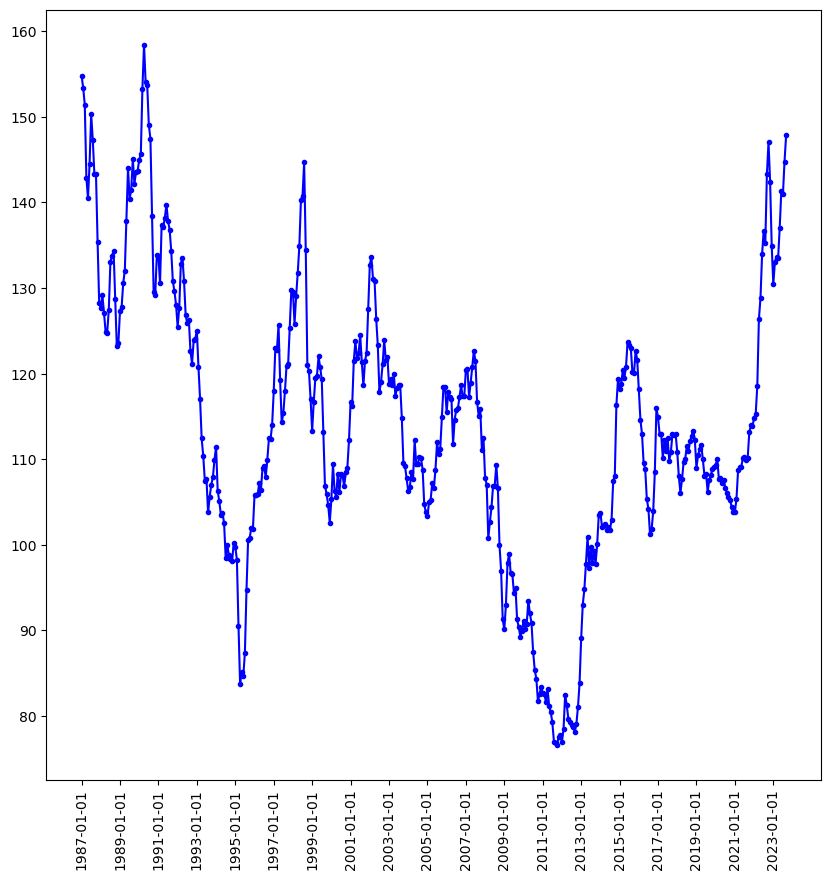

In [8]:
df87 = df[192:]
print(df87.shape)

plt.figure(figsize = (10,10))
plt.plot( df87['date'],df87['Ex'], label='Exchange rate trend', color='blue', marker='o', markersize=3)

plt.xticks(np.arange(len(df87['date']))[::24],df87['date'].iloc[::24],rotation = 90)
plt.show()

In [9]:
dataR = pd.melt(df, id_vars=['date'], value_vars=['R1', 'R2'])#, ignore_index=False)
dfR = pd.DataFrame(dataR)
print(dfR.dtypes)
dfR['variable'] = dfR['variable'].astype('category')
dfR['date'] = pd.to_datetime(dfR['date'])
dfR['variable'] = dfR['variable'].cat.codes

print(dfR.dtypes)

date         object
variable     object
value       float64
dtype: object
date        datetime64[ns]
variable              int8
value              float64
dtype: object


<Figure size 1000x1000 with 0 Axes>

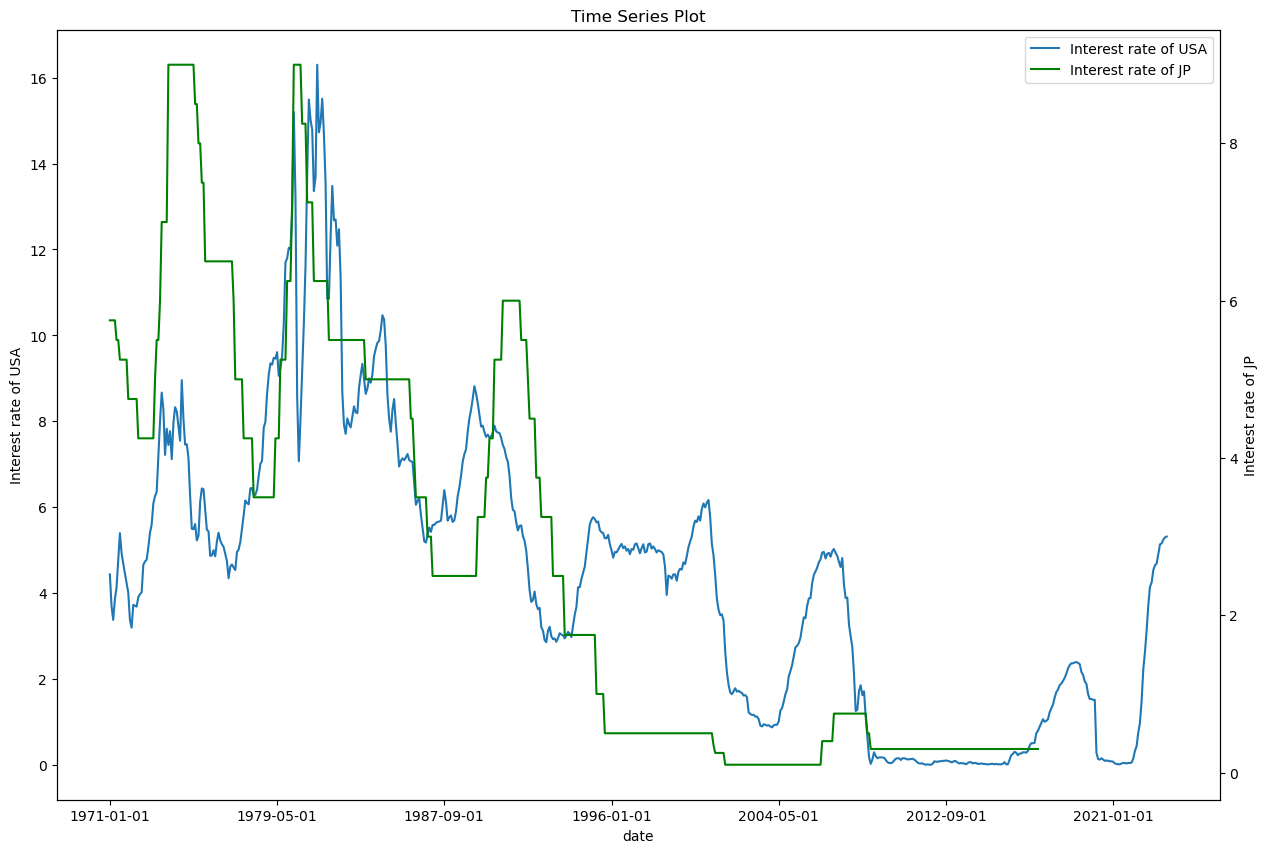

In [10]:

plt.figure(figsize=(10, 10))

dfT = df
dfT.set_index('date', inplace=True)


plt.figure(figsize=(15, 10)) 


ax1 = plt.gca()
dfT["R1"].plot(ax=ax1, label='Interest rate of USA')


ax2 = ax1.twinx()


dfT["R2"].plot(ax=ax2, style="g", label='Interest rate of JP')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xlabel('Date')

ax1.set_ylabel('Interest rate of USA')
ax2.set_ylabel('Interest rate of JP')

plt.title('Time Series Plot')

plt.show()

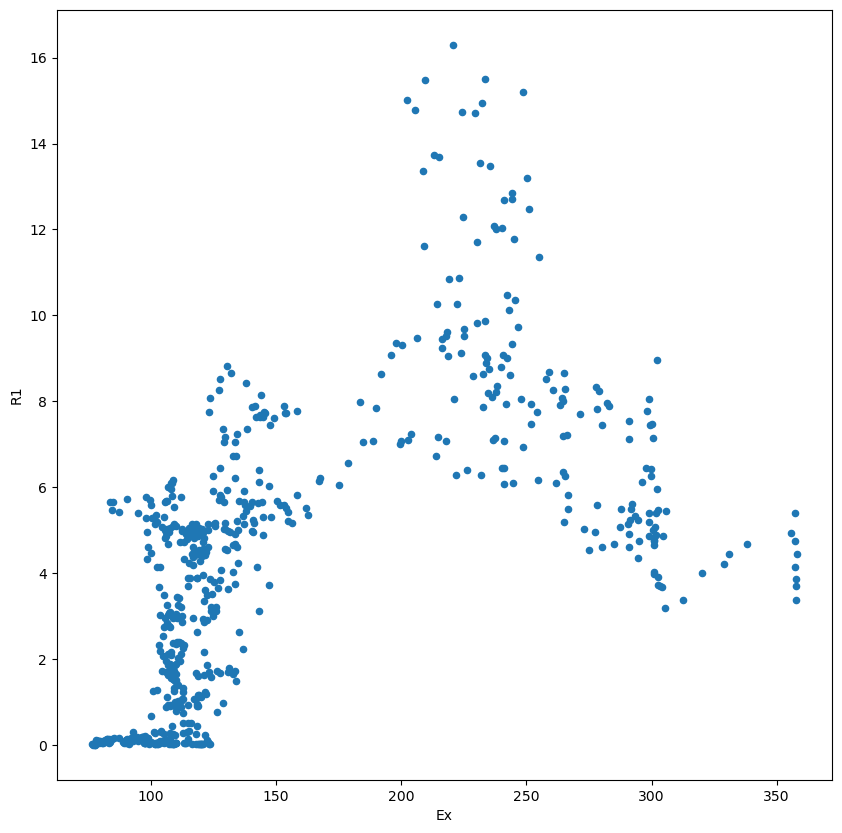

In [11]:
df.plot.scatter('Ex','R1', figsize = (10,10))
plt.show()

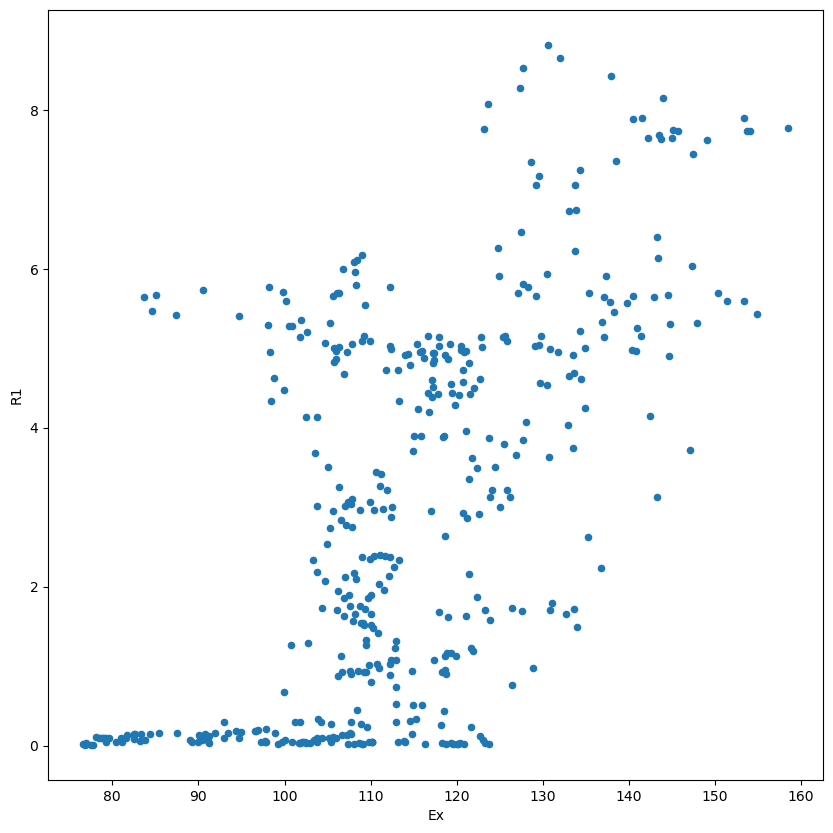

In [12]:
df87.plot.scatter('Ex','R1', figsize = (10,10))
plt.show()

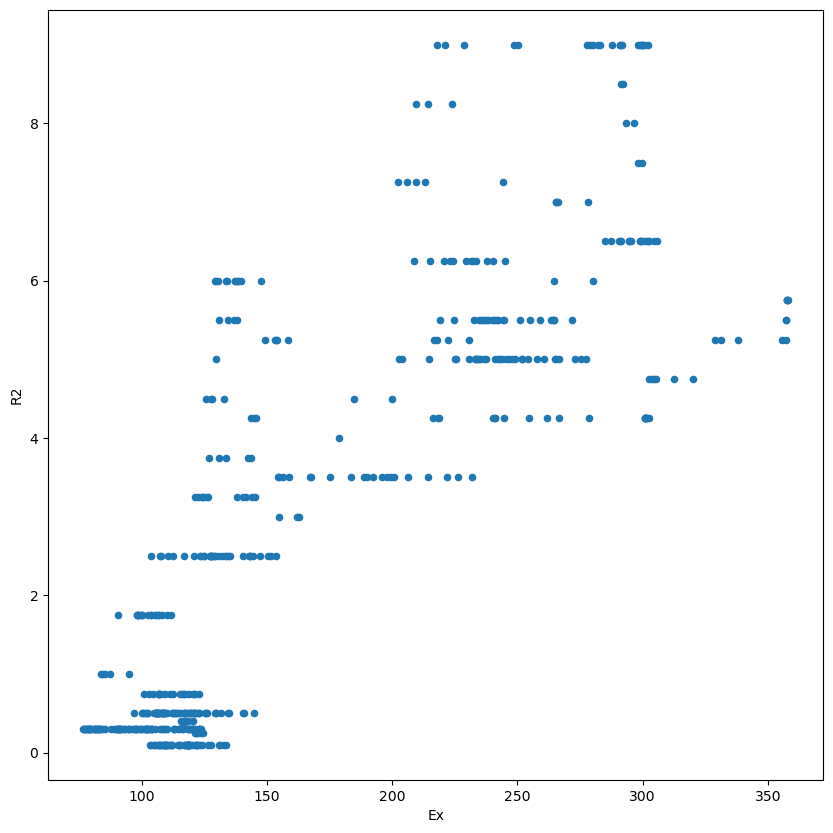

R2
0.30    101
0.50     67
0.10     58
5.00     34
2.50     34
5.50     30
4.25     22
9.00     21
0.75     20
3.50     20
1.75     19
6.50     17
5.25     14
6.00     13
3.25     12
6.25     12
0.40      7
0.25      6
4.50      6
4.75      6
1.00      5
7.25      5
3.75      5
5.75      4
7.00      4
3.00      3
8.25      3
7.50      2
8.00      2
8.50      2
4.00      1
0.35      1
Name: count, dtype: int64


In [13]:
df.plot.scatter('Ex','R2', figsize = (10,10))
plt.show()
print(df['R2'].value_counts())

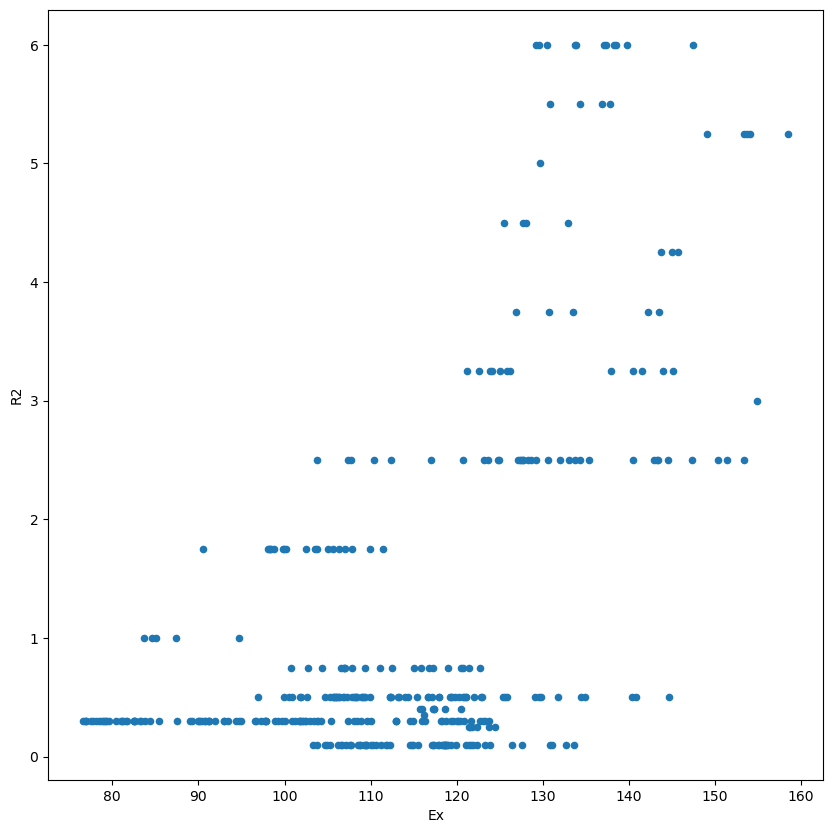

R2
0.30    101
0.50     67
0.10     58
2.50     34
0.75     20
1.75     19
3.25     12
6.00     11
0.40      7
0.25      6
3.75      5
5.25      5
1.00      5
4.50      4
5.50      4
4.25      3
0.35      1
5.00      1
3.00      1
Name: count, dtype: int64


In [14]:
df87.plot.scatter('Ex','R2', figsize = (10,10))
plt.show()
print(df87['R2'].value_counts())

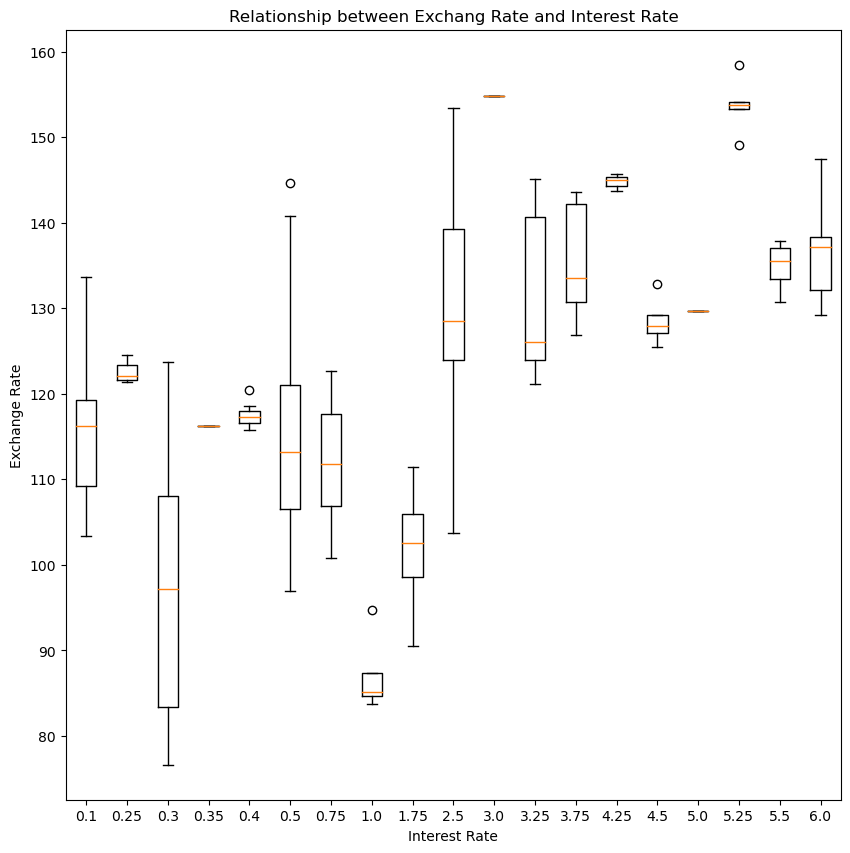

In [15]:
ordinal = [0.1, 0.25, 0.3, 0.35, 0.4, 0.5, 0.75, 1.0, 1.75, 2.5, 3.0, 3.25, 3.75, 4.25, 4.5, 5.0, 5.25, 5.5, 6.0]
dataset = []
for i in ordinal:
    Ex_value = df87[df87['R2'] == i]['Ex'].values
    dataset.append(Ex_value)
    
positions = list(range(1, len(ordinal) + 1))
xticks = ordinal
plt.figure(figsize = (10,10))
plt.boxplot(dataset)
plt.ylabel('Exchange Rate')
plt.xlabel('Interest Rate')
plt.xticks(positions,xticks)
plt.title('Relationship between Exchang Rate and Interest Rate')

plt.show()

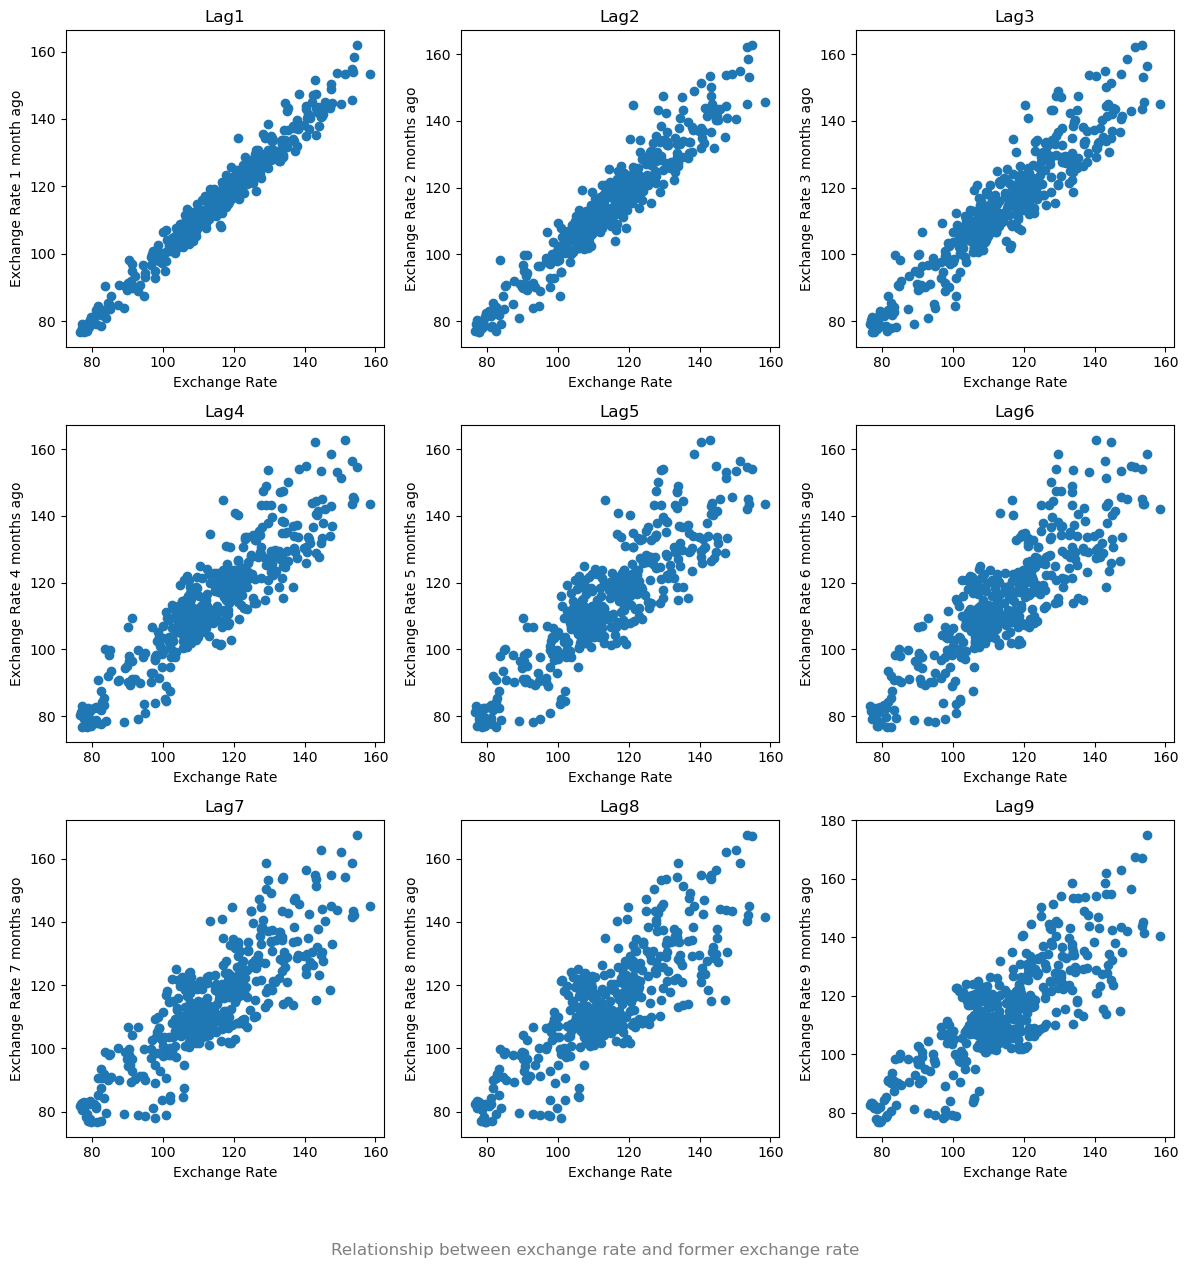

In [16]:
import matplotlib 
from matplotlib import pylab as plt
import numpy as np
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes[0,0].scatter(df87['Ex'],df87['ExLag1'])
axes[0,0].set_xlabel('Exchange Rate')
axes[0,0].set_ylabel('Exchange Rate 1 month ago')
axes[0,0].set_title('Lag1')


axes[0,1].scatter(df87['Ex'],df87['ExLag2'])
axes[0,1].set_xlabel('Exchange Rate')
axes[0,1].set_ylabel('Exchange Rate 2 months ago')
axes[0,1].set_title('Lag2')


axes[0,2].scatter(df87['Ex'],df87['ExLag3'])
axes[0,2].set_xlabel('Exchange Rate')
axes[0,2].set_ylabel('Exchange Rate 3 months ago')
axes[0,2].set_title('Lag3')


axes[1,0].scatter(df87['Ex'],df87['ExLag4'])
axes[1,0].set_xlabel('Exchange Rate')
axes[1,0].set_ylabel('Exchange Rate 4 months ago')
axes[1,0].set_title('Lag4')


axes[1,1].scatter(df87['Ex'],df87['ExLag5'])
axes[1,1].set_xlabel('Exchange Rate')
axes[1,1].set_ylabel('Exchange Rate 5 months ago')
axes[1,1].set_title('Lag5')


axes[1,2].scatter(df87['Ex'],df87['ExLag6'])
axes[1,2].set_xlabel('Exchange Rate')
axes[1,2].set_ylabel('Exchange Rate 6 months ago')
axes[1,2].set_title('Lag6')


axes[2,0].scatter(df87['Ex'],df87['ExLag7'])
axes[2,0].set_xlabel('Exchange Rate')
axes[2,0].set_ylabel('Exchange Rate 7 months ago')
axes[2,0].set_title('Lag7')


axes[2,1].scatter(df87['Ex'],df87['ExLag8'])
axes[2,1].set_xlabel('Exchange Rate')
axes[2,1].set_ylabel('Exchange Rate 8 months ago')
axes[2,1].set_title('Lag8')


axes[2,2].scatter(df87['Ex'],df87['ExLag9'])
axes[2,2].set_xlabel('Exchange Rate')
axes[2,2].set_ylabel('Exchange Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)
# plt.savefig('figures/EX_trend', dpi=350, bbox_inches = 'tight')
plt.show()


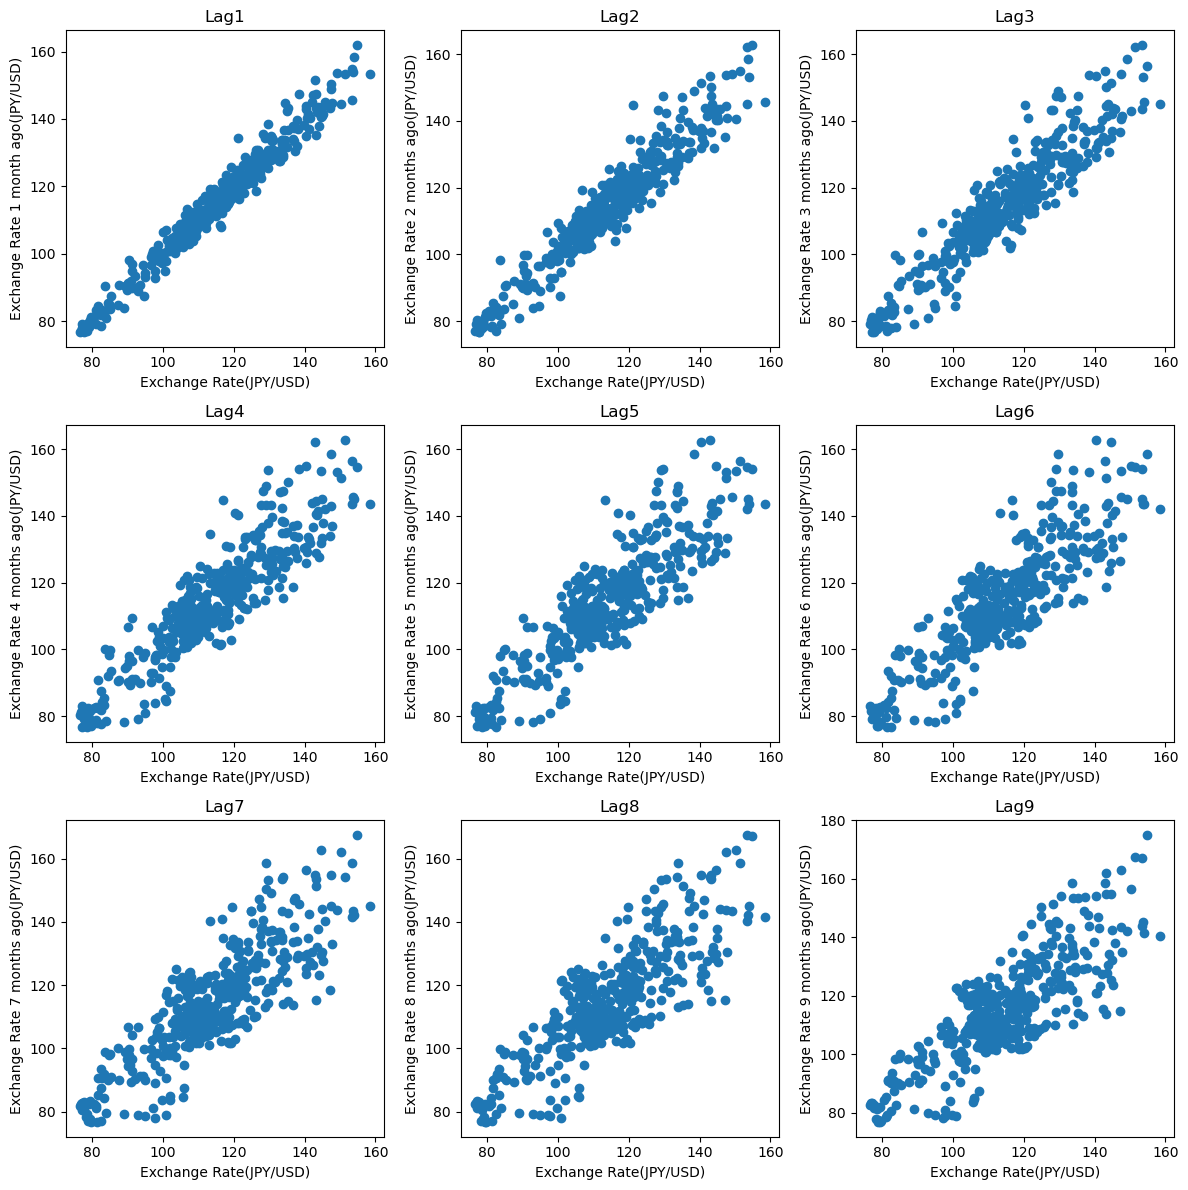

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes[0,0].scatter(df87['Ex'],df87['ExLag1'])
axes[0,0].set_xlabel('Exchange Rate(JPY/USD)')
axes[0,0].set_ylabel('Exchange Rate 1 month ago(JPY/USD)')
axes[0,0].set_title('Lag1')


axes[0,1].scatter(df87['Ex'],df87['ExLag2'])
axes[0,1].set_xlabel('Exchange Rate(JPY/USD)')
axes[0,1].set_ylabel('Exchange Rate 2 months ago(JPY/USD)')
axes[0,1].set_title('Lag2')


axes[0,2].scatter(df87['Ex'],df87['ExLag3'])
axes[0,2].set_xlabel('Exchange Rate(JPY/USD)')
axes[0,2].set_ylabel('Exchange Rate 3 months ago(JPY/USD)')
axes[0,2].set_title('Lag3')


axes[1,0].scatter(df87['Ex'],df87['ExLag4'])
axes[1,0].set_xlabel('Exchange Rate(JPY/USD)')
axes[1,0].set_ylabel('Exchange Rate 4 months ago(JPY/USD)')
axes[1,0].set_title('Lag4')


axes[1,1].scatter(df87['Ex'],df87['ExLag5'])
axes[1,1].set_xlabel('Exchange Rate(JPY/USD)')
axes[1,1].set_ylabel('Exchange Rate 5 months ago(JPY/USD)')
axes[1,1].set_title('Lag5')


axes[1,2].scatter(df87['Ex'],df87['ExLag6'])
axes[1,2].set_xlabel('Exchange Rate(JPY/USD)')
axes[1,2].set_ylabel('Exchange Rate 6 months ago(JPY/USD)')
axes[1,2].set_title('Lag6')


axes[2,0].scatter(df87['Ex'],df87['ExLag7'])
axes[2,0].set_xlabel('Exchange Rate(JPY/USD)')
axes[2,0].set_ylabel('Exchange Rate 7 months ago(JPY/USD)')
axes[2,0].set_title('Lag7')


axes[2,1].scatter(df87['Ex'],df87['ExLag8'])
axes[2,1].set_xlabel('Exchange Rate(JPY/USD)')
axes[2,1].set_ylabel('Exchange Rate 8 months ago(JPY/USD)')
axes[2,1].set_title('Lag8')


axes[2,2].scatter(df87['Ex'],df87['ExLag9'])
axes[2,2].set_xlabel('Exchange Rate(JPY/USD)')
axes[2,2].set_ylabel('Exchange Rate 9 months ago(JPY/USD)')
axes[2,2].set_title('Lag9')

plt.tight_layout()

# plt.savefig('figures/ExLag_vs_Ex', dpi=350, bbox_inches = 'tight')
plt.show()

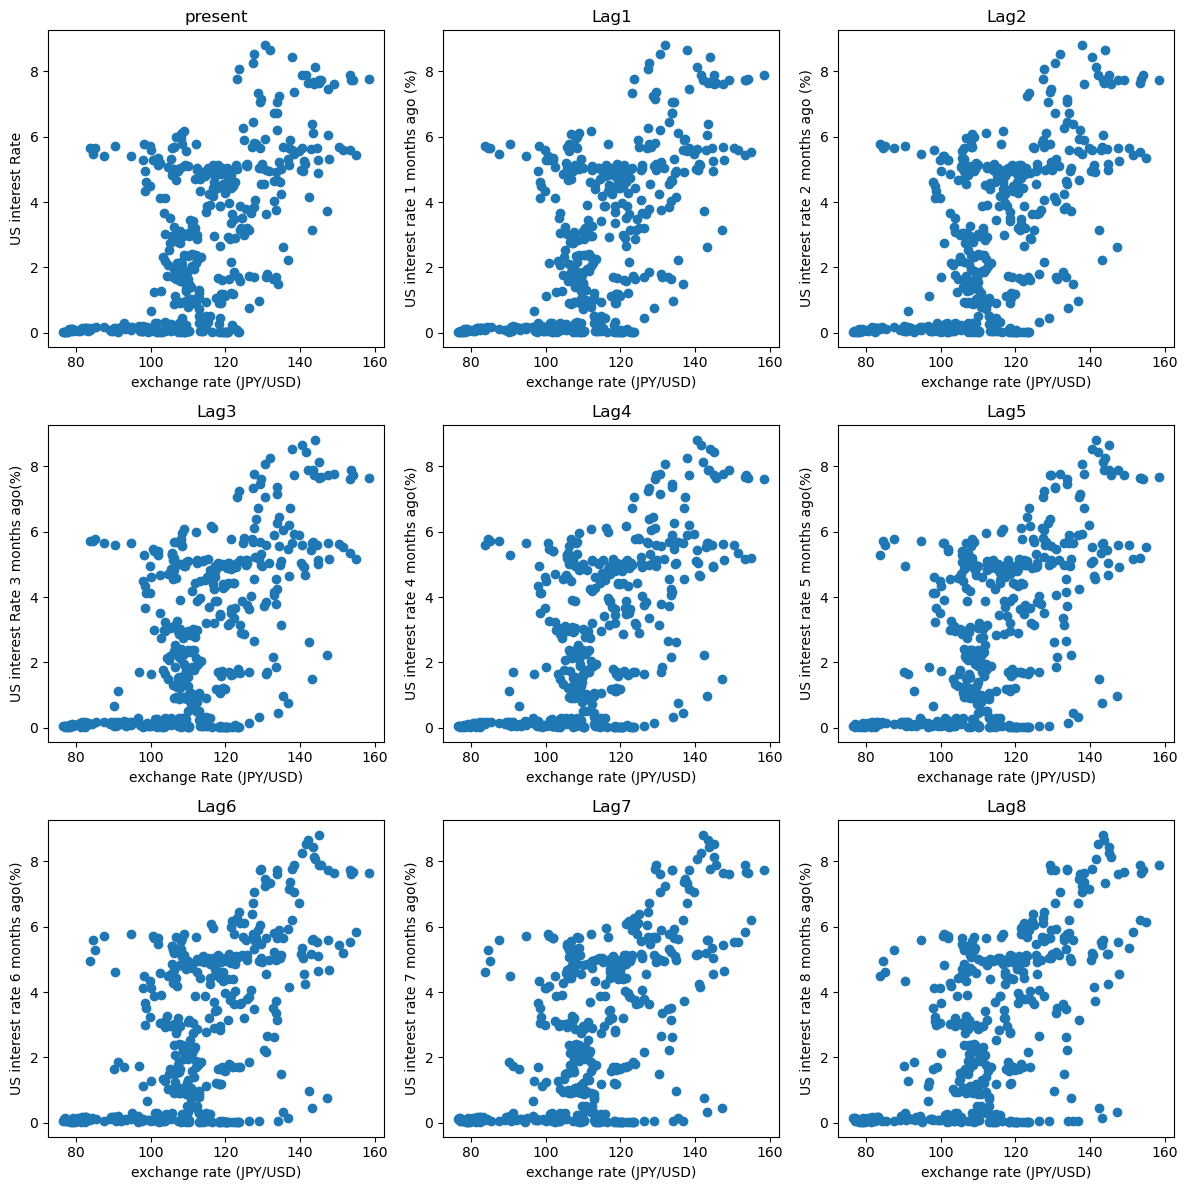

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))



axes[0,0].scatter(df87['Ex'],df87['R1'])
axes[0,0].set_xlabel('exchange rate (JPY/USD)')
axes[0,0].set_ylabel('US interest Rate')
axes[0,0].set_title('present')


axes[0,1].scatter(df87['Ex'],df87['R1Lag1'])
axes[0,1].set_xlabel('exchange rate (JPY/USD)')
axes[0,1].set_ylabel('US interest rate 1 months ago (%)')
axes[0,1].set_title('Lag1')


axes[0,2].scatter(df87['Ex'],df87['R1Lag2'])
axes[0,2].set_xlabel('exchange rate (JPY/USD)')
axes[0,2].set_ylabel('US interest rate 2 months ago (%)')
axes[0,2].set_title('Lag2')


axes[1,0].scatter(df87['Ex'],df87['R1Lag3'])
axes[1,0].set_xlabel('exchange Rate (JPY/USD)')
axes[1,0].set_ylabel('US interest Rate 3 months ago(%)')
axes[1,0].set_title('Lag3')


axes[1,1].scatter(df87['Ex'],df87['R1Lag4'])
axes[1,1].set_xlabel('exchange rate (JPY/USD)')
axes[1,1].set_ylabel('US interest rate 4 months ago(%)')
axes[1,1].set_title('Lag4')


axes[1,2].scatter(df87['Ex'],df87['R1Lag5'])
axes[1,2].set_xlabel('exchanage rate (JPY/USD)')
axes[1,2].set_ylabel('US interest rate 5 months ago(%)')
axes[1,2].set_title('Lag5')


axes[2,0].scatter(df87['Ex'],df87['R1Lag6'])
axes[2,0].set_xlabel('exchange rate (JPY/USD)')
axes[2,0].set_ylabel('US interest rate 6 months ago(%)')
axes[2,0].set_title('Lag6')


axes[2,1].scatter(df87['Ex'],df87['R1Lag7'])
axes[2,1].set_xlabel('exchange rate (JPY/USD)')
axes[2,1].set_ylabel('US interest rate 7 months ago(%)')
axes[2,1].set_title('Lag7')

axes[2,2].scatter(df87['Ex'],df87['R1Lag8'])
axes[2,2].set_xlabel('exchange rate (JPY/USD)')
axes[2,2].set_ylabel('US interest rate 8 months ago(%)')
axes[2,2].set_title('Lag8')




plt.tight_layout()

# plt.savefig('figures/R1lag_vs_Ex', dpi=350, bbox_inches = 'tight')
plt.show()

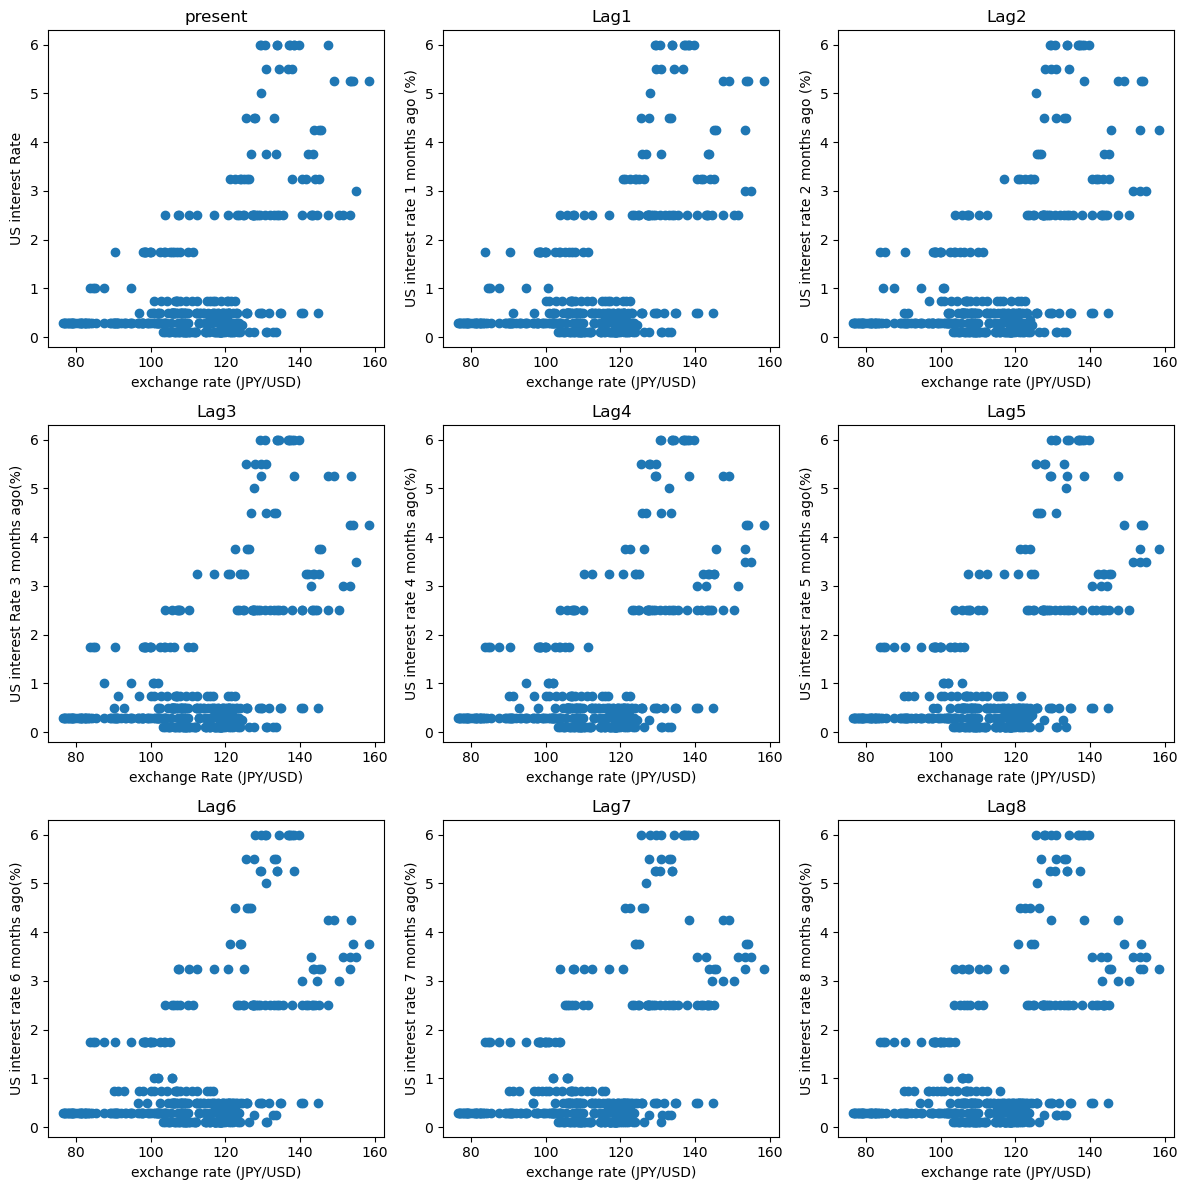

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))


axes[0,0].scatter(df87['Ex'],df87['R2'])
axes[0,0].set_xlabel('exchange rate (JPY/USD)')
axes[0,0].set_ylabel('US interest Rate')
axes[0,0].set_title('present')


axes[0,1].scatter(df87['Ex'],df87['R2Lag1'])
axes[0,1].set_xlabel('exchange rate (JPY/USD)')
axes[0,1].set_ylabel('US interest rate 1 months ago (%)')
axes[0,1].set_title('Lag1')


axes[0,2].scatter(df87['Ex'],df87['R2Lag2'])
axes[0,2].set_xlabel('exchange rate (JPY/USD)')
axes[0,2].set_ylabel('US interest rate 2 months ago (%)')
axes[0,2].set_title('Lag2')


axes[1,0].scatter(df87['Ex'],df87['R2Lag3'])
axes[1,0].set_xlabel('exchange Rate (JPY/USD)')
axes[1,0].set_ylabel('US interest Rate 3 months ago(%)')
axes[1,0].set_title('Lag3')


axes[1,1].scatter(df87['Ex'],df87['R2Lag4'])
axes[1,1].set_xlabel('exchange rate (JPY/USD)')
axes[1,1].set_ylabel('US interest rate 4 months ago(%)')
axes[1,1].set_title('Lag4')


axes[1,2].scatter(df87['Ex'],df87['R2Lag5'])
axes[1,2].set_xlabel('exchanage rate (JPY/USD)')
axes[1,2].set_ylabel('US interest rate 5 months ago(%)')
axes[1,2].set_title('Lag5')


axes[2,0].scatter(df87['Ex'],df87['R2Lag6'])
axes[2,0].set_xlabel('exchange rate (JPY/USD)')
axes[2,0].set_ylabel('US interest rate 6 months ago(%)')
axes[2,0].set_title('Lag6')


axes[2,1].scatter(df87['Ex'],df87['R2Lag7'])
axes[2,1].set_xlabel('exchange rate (JPY/USD)')
axes[2,1].set_ylabel('US interest rate 7 months ago(%)')
axes[2,1].set_title('Lag7')

axes[2,2].scatter(df87['Ex'],df87['R2Lag8'])
axes[2,2].set_xlabel('exchange rate (JPY/USD)')
axes[2,2].set_ylabel('US interest rate 8 months ago(%)')
axes[2,2].set_title('Lag8')



plt.tight_layout()

# plt.savefig('figures/R2lag_vs_Ex', dpi=350, bbox_inches = 'tight')
plt.show()

Text(0.5, -0.05, 'Relationship between exchange rate and former exchange rate of USA')

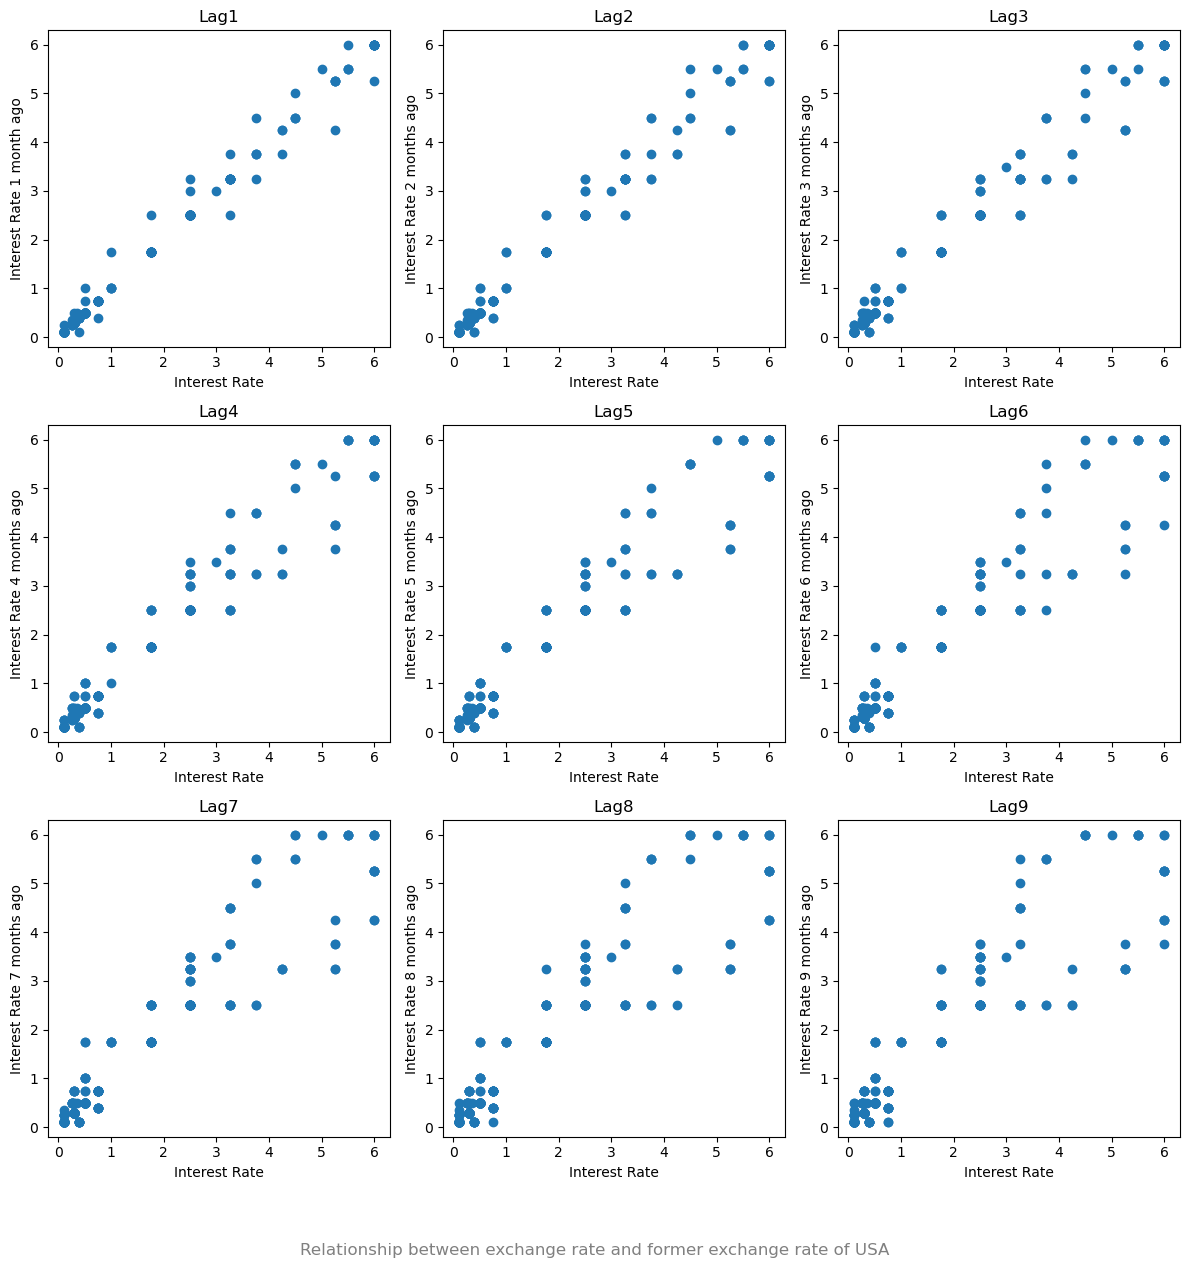

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes[0,0].scatter(df87['R2'],df87['R2Lag1'])
axes[0,0].set_xlabel('Interest Rate')
axes[0,0].set_ylabel('Interest Rate 1 month ago')
axes[0,0].set_title('Lag1')


axes[0,1].scatter(df87['R2'],df87['R2Lag2'])
axes[0,1].set_xlabel('Interest Rate')
axes[0,1].set_ylabel('Interest Rate 2 months ago')
axes[0,1].set_title('Lag2')


axes[0,2].scatter(df87['R2'],df87['R2Lag3'])
axes[0,2].set_xlabel('Interest Rate')
axes[0,2].set_ylabel('Interest Rate 3 months ago')
axes[0,2].set_title('Lag3')


axes[1,0].scatter(df87['R2'],df87['R2Lag4'])
axes[1,0].set_xlabel('Interest Rate')
axes[1,0].set_ylabel('Interest Rate 4 months ago')
axes[1,0].set_title('Lag4')


axes[1,1].scatter(df87['R2'],df87['R2Lag5'])
axes[1,1].set_xlabel('Interest Rate')
axes[1,1].set_ylabel('Interest Rate 5 months ago')
axes[1,1].set_title('Lag5')


axes[1,2].scatter(df87['R2'],df87['R2Lag6'])
axes[1,2].set_xlabel('Interest Rate')
axes[1,2].set_ylabel('Interest Rate 6 months ago')
axes[1,2].set_title('Lag6')


axes[2,0].scatter(df87['R2'],df87['R2Lag7'])
axes[2,0].set_xlabel('Interest Rate')
axes[2,0].set_ylabel('Interest Rate 7 months ago')
axes[2,0].set_title('Lag7')


axes[2,1].scatter(df87['R2'],df87['R2Lag8'])
axes[2,1].set_xlabel('Interest Rate')
axes[2,1].set_ylabel('Interest Rate 8 months ago')
axes[2,1].set_title('Lag8')


axes[2,2].scatter(df87['R2'],df87['R2Lag9'])
axes[2,2].set_xlabel('Interest Rate')
axes[2,2].set_ylabel('Interest Rate 9 months ago')
axes[2,2].set_title('Lag9')

plt.tight_layout()

txt = "Relationship between exchange rate and former exchange rate of USA"
plt.figtext(0.5, -0.05, txt, wrap=True, color = 'grey', horizontalalignment='center', fontsize=12)


**<font size="5">data splitting**

In [21]:
#split data
df87['year'] = pd.to_datetime(df87.date).dt.year #create a time index 'year'
print(df87.head())

           date        Ex  ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  \
192  1987-01-01  154.8295  162.05  162.85  156.47  154.73  154.18  158.61   
193  1987-02-01  153.4068  154.83  162.05  162.85  156.47  154.73  154.18   
194  1987-03-01  151.4332  153.41  154.83  162.05  162.85  156.47  154.73   
195  1987-04-01  142.8986  151.43  153.41  154.83  162.05  162.85  156.47   
196  1987-05-01  140.4790  142.90  151.43  153.41  154.83  162.05  162.85   

     ExLag7  ExLag8  ...  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  R2Lag7  \
192  167.54  167.03  ...     3.0     3.5     3.5     3.5     3.5     3.5   
193  158.61  167.54  ...     3.0     3.0     3.5     3.5     3.5     3.5   
194  154.18  158.61  ...     3.0     3.0     3.0     3.5     3.5     3.5   
195  154.73  154.18  ...     2.5     3.0     3.0     3.0     3.5     3.5   
196  156.47  154.73  ...     2.5     2.5     3.0     3.0     3.0     3.5   

     R2Lag8  R2Lag9  R2Lag10  year  
192     3.5     3.5      4.0  1987  
193   

In [22]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

df87.set_index('year', inplace=True)
df87.sort_index(inplace=True)
X = df87.drop(labels=['Ex'], axis=1)
y = df87['Ex']

for train_index, test_index in tss.split(X):
    X_other, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_other, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_other.index)
print("X_test:", X_test.index)
print(len(X_test))

Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       ...
       2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='year', length=353)
X_test: Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021,
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022,
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023],
      dtype='int32', name='year')
88


In [23]:
for train_index, test_index in tss.split(X_other):
    X_train, X_val = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

print("X_train:",X_train.index)
print("X_val:", X_val.index)
print(len(X_val))

X_train: Index([1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       ...
       2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='year', length=283)
X_val: Index([2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016],
      dtype='int32', name='year')
70


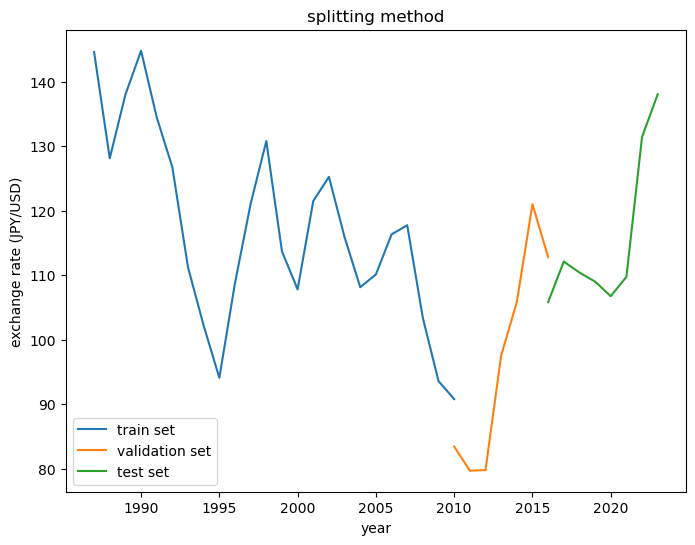

In [24]:
plt.figure(figsize = (8,6))
y_train.groupby('year').mean().plot(label = 'train set')
y_val.groupby('year').mean().plot(label = 'validation set')
y_test.groupby('year').mean().plot(label = 'test set')
plt.title('splitting method')
plt.ylabel('exchange rate (JPY/USD)')
plt.xlabel('year')
plt.legend()
# plt.savefig('figures/Splitting method', dpi=350, bbox_inches = 'tight')
plt.show()

In [25]:
X_train = X_train.drop(columns=['date'])
print(X_train.head())
X_val = X_val.drop(columns=['date'])
print(X_val.head())
X_test = X_test.drop(columns=['date'])
print(X_test.head())

      ExLag1  ExLag2  ExLag3  ExLag4  ExLag5  ExLag6  ExLag7  ExLag8  ExLag9  \
year                                                                           
1987  162.05  162.85  156.47  154.73  154.18  158.61  167.54  167.03  175.09   
1987  154.83  162.05  162.85  156.47  154.73  154.18  158.61  167.54  167.03   
1987  153.41  154.83  162.05  162.85  156.47  154.73  154.18  158.61  167.54   
1987  151.43  153.41  154.83  162.05  162.85  156.47  154.73  154.18  158.61   
1987  142.90  151.43  153.41  154.83  162.05  162.85  156.47  154.73  154.18   

      ExLag10  ...  R2Lag1  R2Lag2  R2Lag3  R2Lag4  R2Lag5  R2Lag6  R2Lag7  \
year           ...                                                           
1987   178.69  ...     3.0     3.0     3.5     3.5     3.5     3.5     3.5   
1987   175.09  ...     3.0     3.0     3.0     3.5     3.5     3.5     3.5   
1987   167.03  ...     2.5     3.0     3.0     3.0     3.5     3.5     3.5   
1987   167.54  ...     2.5     2.5     3.0     3.

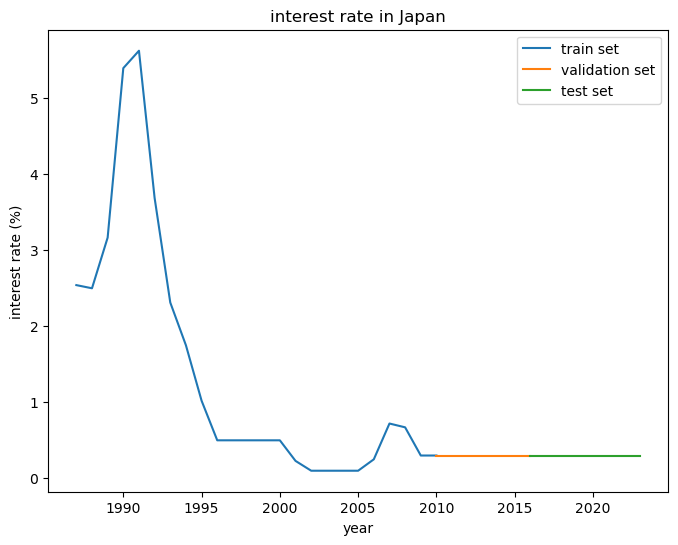

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)

X_impute = imputer.fit_transform(X_test)

X_test_imp = pd.DataFrame(data=X_impute, columns = X_test.columns, index = X_test.index)

plt.figure(figsize = (8,6))
X_train['R2'].groupby('year').mean().plot(label = 'train set')
X_val['R2'].groupby('year').mean().plot(label = 'validation set')
X_test_imp['R2'].groupby('year').mean().plot(label = 'test set')
plt.title('interest rate in Japan')
plt.ylabel('interest rate (%)')
plt.xlabel('year')
plt.legend()
# plt.savefig('figures/R2', dpi=350, bbox_inches = 'tight')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

std_ftrs = ['ExLag1','ExLag2','ExLag3','ExLag4','ExLag5','ExLag6','ExLag7','ExLag8','ExLag9','ExLag10','R1','R1Lag1','R1Lag2','R1Lag3','R1Lag4','R1Lag5','R1Lag6','R1Lag7','R1Lag8','R1Lag9','R1Lag10','R2','R2Lag1','R2Lag2','R2Lag3','R2Lag4','R2Lag5','R2Lag6','R2Lag7','R2Lag8','R2Lag9','R2Lag10']

preprocessor = ColumnTransformer(
    transformers = [('std', StandardScaler(), std_ftrs)])


clf = Pipeline(steps = [('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)



(283, 32)
(283, 32)


In [28]:
feature_names = preprocessor.get_feature_names_out()

df_train_prep = pd.DataFrame(data=X_train_prep,columns=feature_names)


df_val_prep = pd.DataFrame(data = X_val_prep, columns = feature_names)
print(df_val_prep.shape)

df_test_prep = pd.DataFrame(data = X_test_prep, columns = feature_names)
print(df_test_prep.shape)


(70, 32)
(88, 32)


**<font size="5">handle missing values**

In [29]:
print('data dimensions of train set:',df_train_prep.shape)
perc_missing_per_ftr = df_train_prep.isnull().sum(axis=0)/df_train_prep.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train_prep.isnull().sum(axis=1)!=0)/df_train_prep.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions of train set: (283, 32)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


In [30]:
print('data dimensions of train set:',df_val_prep.shape)
perc_missing_per_ftr = df_val_prep.isnull().sum(axis=0)/df_val_prep.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train_prep.isnull().sum(axis=1)!=0)/df_val_prep.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions of train set: (70, 32)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


In [31]:
print('data dimensions of test set:',df_test_prep.shape)
perc_missing_per_ftr = df_test_prep.isnull().sum(axis=0)/df_test_prep.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_test_prep.isnull().sum(axis=1)!=0)/df_test_prep.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions of test set: (88, 32)
fraction of missing values in features:
std__R2         0.875
std__R2Lag1     0.875
std__R2Lag2     0.875
std__R2Lag3     0.875
std__R2Lag4     0.875
std__R2Lag5     0.875
std__R2Lag6     0.875
std__R2Lag7     0.875
std__R2Lag8     0.875
std__R2Lag9     0.875
std__R2Lag10    0.875
dtype: float64
fraction of points with missing values: 0.875


In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)
X_impute = imputer.fit_transform(df_test_prep)
df_test_imp = pd.DataFrame(data=X_impute, columns = df_test_prep.columns)

print('data dimensions of train set:',df_test_imp.shape)
perc_missing_per_ftr = df_test_imp.isnull().sum(axis=0)/df_test_imp.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_test_imp.isnull().sum(axis=1)!=0)/df_test_imp.shape[0]
print('fraction of points with missing values:',frac_missing)


data dimensions of train set: (88, 32)
fraction of missing values in features:
Series([], dtype: float64)
fraction of points with missing values: 0.0


**<font size="5">Ridge**

In [33]:
# Ridge
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import joblib

nr_states = [0,1,2,3,4]
test_scores = np.zeros(nr_states)
final_models = []
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {
        'regressor__alpha': alpha_values,
    }


train_rmse_score_ridge = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_score_ridge = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_scores_ridge = np.zeros(len(nr_states))
test_rmse_scores_ridge = np.zeros(len(nr_states))
base_rmse_test_ridge = []
base_rmse_val_ridge = []


for i in nr_states:
    models = []
    print('---------------------------------------')
    print('randoms state '+str(i))

    alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {
        'regressor__alpha': alpha_values,
    }



    
    

    for p, params in enumerate(ParameterGrid(param_grid)):
        
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        
        model = Ridge(alpha=params['regressor__alpha'], solver = 'saga' ,random_state=i, max_iter=10000)
        
        model.fit(X_train_prep,y_train) 
        models.append(model) 
        
        y_train_pred = model.predict(X_train_prep)
        train_rmse_score_ridge[p] = mean_squared_error(y_train, y_train_pred, squared=False)
        y_val_pred = model.predict(X_val_prep)
        val_rmse_score_ridge[p] = mean_squared_error(y_val, y_val_pred, squared=False)
        print('   ', train_rmse_score_ridge[p],val_rmse_score_ridge[p])
    

   
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_rmse_score_ridge)])
    print('corresponding validation score:',np.min(val_rmse_score_ridge))
    val_rmse_scores_ridge[i] = np.min(val_rmse_score_ridge)

    
    final_models.append(models[np.argmin(val_rmse_score_ridge)])
  
    y_test_pred = final_models[-1].predict(df_test_imp)
    
    # result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
    
    
    # result_df.to_csv('results/ridge_predictions_rs{}.csv'.format(i), index=False)
    
    # print("Predictions saved to /results/ridge_predictions_rs{}.csv".format(i))
    
    
    test_rmse_scores_ridge[i] = mean_squared_error(y_test, y_test_pred, squared=False)
    print('test score:',test_rmse_scores_ridge[i])
    
# save_path = "results/best_models_of_ridge_rs0-4.joblib"
# joblib.dump(final_models, save_path)
# print(f"Model saved to {save_path}")

---------------------------------------
randoms state 0
    {'regressor__alpha': 0.0001}
    2.6791231920826197 2.530976751422433
    {'regressor__alpha': 0.001}
    2.6791631237745297 2.531049409958225
    {'regressor__alpha': 0.01}
    2.6795079068799486 2.5320883108329073
    {'regressor__alpha': 0.1}
    2.683864194047314 2.5424378301095456
    {'regressor__alpha': 1}
    2.740943945266466 2.652358549535003
    {'regressor__alpha': 10}
    3.1778190253001943 3.5248837069113907
    {'regressor__alpha': 100}
    4.610802755123171 5.903565509694579
best model parameters: {'regressor__alpha': 0.0001}
corresponding validation score: 2.530976751422433
test score: 3.228984151953245
---------------------------------------
randoms state 1
    {'regressor__alpha': 0.0001}
    2.6791485970018636 2.5309811945973353
    {'regressor__alpha': 0.001}
    2.679193634452735 2.5310550416071704
    {'regressor__alpha': 0.01}
    2.6795305125379922 2.5320449079545457
    {'regressor__alpha': 0.1}
    2

In [34]:
print(val_rmse_scores_ridge)
print(test_rmse_scores_ridge)
mean_val_rmse_for_ridge = np.mean(val_rmse_scores_ridge)
std_val_rmse_for_ridge = np.std(val_rmse_scores_ridge)
mean_test_rmse_for_ridge = np.mean(test_rmse_scores_ridge)
std_test_rmse_for_ridge = np.std(test_rmse_scores_ridge)
base_rmse_for_ridge = np.mean(base_rmse_test_ridge)

global_scores = test_rmse_scores_ridge
print(base_rmse_test_ridge)
print('Ridge mean = ',mean_test_rmse_for_ridge)
print('Ridge std = ', std_test_rmse_for_ridge)

print('----global:', global_scores)

[2.53097675 2.53098119 2.53097087 2.53098595 2.53094087]
[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
[]
Ridge mean =  3.229091934464249
Ridge std =  0.00010176369080907504
----global: [3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]


In [35]:
print(final_models)

[Ridge(alpha=0.0001, max_iter=10000, random_state=0, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=1, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=2, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=3, solver='saga'), Ridge(alpha=0.0001, max_iter=10000, random_state=4, solver='saga')]


**<font size="5">Lasso**

In [36]:
# Lasso
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

nr_states = [0,1,2,3,4]
test_scores = np.zeros(nr_states)
final_models = []

train_rmse_score = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_score = np.zeros(len(ParameterGrid(param_grid)))
val_rmse_scores = np.zeros(len(nr_states))
test_rmse_scores = np.zeros(len(nr_states))
base_rmse_test_lasso = []
base_rmse_val = []


for i in nr_states:
    models = []
    print('---------------------------------------')
    print('randoms state '+str(i))

    alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {
        'regressor__alpha': alpha_values,
    }



    
    

    for p, params in enumerate(ParameterGrid(param_grid)):
        
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        
        model = Lasso(alpha=params['regressor__alpha'], selection = 'random', random_state=i, max_iter=10000)


        model.fit(X_train_prep,y_train) 
        models.append(model)
        
        y_train_pred = model.predict(X_train_prep)
        train_rmse_score[p] = mean_squared_error(y_train, y_train_pred, squared=False)
        y_val_pred = model.predict(X_val_prep)
        val_rmse_score[p] = mean_squared_error(y_val, y_val_pred, squared=False)
        print('   ', train_rmse_score[p],val_rmse_score[p])
    
    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_rmse_score)])
    print('corresponding validation score:',np.min(val_rmse_score))
    val_rmse_scores[i] = np.min(val_rmse_score)
    
    final_models.append(models[np.argmin(val_rmse_score)])
    
    print(final_models,'--------------')
    y_test_pred = final_models[-1].predict(df_test_imp)

    # result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
    
    
    # result_df.to_csv('results/lasso_predictions_rs{}.csv'.format(i), index=False)
    
    # print("Predictions saved to /results/lasso_predictions_rs{}.csv".format(i))

    
    test_rmse_scores[i] = mean_squared_error(y_test, y_test_pred, squared=False)
    print('test score:',test_rmse_scores[i])

# save_path = "results/best_models_of_lasso_rs0-4.joblib"
# joblib.dump(final_models, save_path)
# print(f"Model saved to {save_path}")


---------------------------------------
randoms state 0
    {'regressor__alpha': 0.0001}
    2.6769066949231917 2.5307036722391953
    {'regressor__alpha': 0.001}
    2.679057025183229 2.5324720513366232
    {'regressor__alpha': 0.01}
    2.7392702286435533 2.5272597046050667
    {'regressor__alpha': 0.1}
    3.0523307216022144 2.6922933340918886
    {'regressor__alpha': 1}
    3.3090935294175736 2.9134058409288595
    {'regressor__alpha': 10}
    10.50186339670171 17.434574378498294
    {'regressor__alpha': 100}
    15.41687804580567 26.043506211524793
best model parameters: {'regressor__alpha': 0.01}
corresponding validation score: 2.5272597046050667
[Lasso(alpha=0.01, max_iter=10000, random_state=0, selection='random')] --------------
test score: 3.157118768228965
---------------------------------------
randoms state 1
    {'regressor__alpha': 0.0001}
    2.6769067209084647 2.530698569422554
    {'regressor__alpha': 0.001}
    2.6790846213986823 2.53229969125205
    {'regressor__alp

In [37]:
print(val_rmse_scores)
print(test_rmse_scores)
mean_val_rmse_for_lasso = np.mean(val_rmse_scores)
std_val_rmse_for_lasso = np.std(val_rmse_scores)
mean_test_rmse_for_lasso = np.mean(test_rmse_scores)
std_test_rmse_for_lasso = np.std(test_rmse_scores)
scores_lasso = []

global_scores = np.vstack((global_scores, test_rmse_scores))

print('lasso rmse mean for test set = ',mean_test_rmse_for_lasso)
print('lasso rmse std for test set = ', std_test_rmse_for_lasso)
base_rmse_for_lasso = np.mean(base_rmse_test_lasso)
print('Lasso base mean = ', base_rmse_for_lasso)
print(global_scores)

[2.5272597  2.52759447 2.52597623 2.5266791  2.5272926 ]
[3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
lasso rmse mean for test set =  3.15453307867768
lasso rmse std for test set =  0.004916980183120864
Lasso base mean =  nan
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]]


**<font size="5">XGBoost**

In [38]:
#XGBoost
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import warnings


warnings.filterwarnings('ignore', message='`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.', category=UserWarning)


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    "missing": [np.nan], 
    'n_estimators': [50, 100, 200], 
    
}


val_rmses = []
train_rmses = []
test_rmses = []
best_models = []
test_sets = []


random_states = [0]  
for random_state in random_states:
    

    
    grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search.fit(X_train_prep, y_train, eval_metric="logloss", eval_set=[(X_val_prep, y_val)], early_stopping_rounds=10, verbose=False)


    
    best_models.append(grid_search.best_estimator_)

    
    test_sets.append({'X_test': pd.DataFrame(X_test, columns=X.columns), 'y_test': pd.Series(y_test)})

    
    y_pred_train = grid_search.predict(X_train_prep)
    y_pred_test = grid_search.predict(X_test_prep)
    y_pred_val = grid_search.predict(X_val_prep)
    
    # result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
    
    
    # result_df.to_csv('results/XGB_prediction.csv', index=False)
    
    # print("Predictions saved to /results/SGB_predictions.csv")
    
    val_rmse = mean_squared_error(y_val, y_pred_val, squared = False)
    val_rmses.append(val_rmse)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared = False)
    train_rmses.append(train_rmse)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared= False)
    test_rmses.append(test_rmse)

# save_path = "results/best_model_of_XGBoost.joblib"
# joblib.dump(final_models, save_path)
# print(f"Model saved to {save_path}")

In [39]:
print(best_models)

[XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)]


In [40]:
from itertools import repeat
base = np.mean(grid_search.predict(X_test_prep))

bases = [base]*len(X_test_prep)
base_score = mean_squared_error(y_test, bases,squared = False)
print(train_rmses)
print('--------------------')
print(val_rmses)
print('--------------------')
print(test_rmses)
print('--------------------')
print(base_score)

test_rmse_scores = test_rmses*5
print(val_rmse_scores)




global_scores = np.vstack((global_scores, test_rmse_scores))
print(global_scores)

[0.6186844978789423]
--------------------
[7.827905216198524]
--------------------
[5.137030015211077]
--------------------
12.375296283796501
[2.5272597  2.52759447 2.52597623 2.5266791  2.5272926 ]
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]]


**<font size="5">RF**

In [41]:
#RF
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
              'max_features': [None,1, 3, 10, 20], 
              'max_depth': [None,1, 3, 10, 20]
              } 


val_rmses = []
train_rmses = []
test_rmses = []
best_models = []
test_sets = []


random_states = [0,1,2,3,4]  
for random_state in random_states:
    

    
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state = random_state), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search.fit(X_train_prep, y_train)


    
    best_models.append(grid_search.best_estimator_)

    
    test_sets.append({'X_test': pd.DataFrame(X_test, columns=X.columns), 'y_test': pd.Series(y_test)})

    
    y_pred_train = grid_search.predict(X_train_prep)
    y_pred_test = grid_search.predict(df_test_imp)
    y_pred_val = grid_search.predict(X_val_prep)

    # result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
    
    
    # result_df.to_csv('results/RF_predictions_rs{}.csv'.format(random_state), index=False)
    
    # print("Predictions saved to /results/RF_predictions_rs{}.csv".format(random_state))

    val_rmse = mean_squared_error(y_val, y_pred_val, squared = False)
    val_rmses.append(val_rmse)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared = False)
    train_rmses.append(train_rmse)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared= False)
    test_rmses.append(test_rmse)

# save_path = "results/best_models_of_RF_rs0-4.joblib"
# joblib.dump(final_models, save_path)
# print(f"Model saved to {save_path}")

In [42]:
print(best_models)

[RandomForestRegressor(max_depth=3, max_features=None, random_state=0), RandomForestRegressor(max_features=None, random_state=1), RandomForestRegressor(max_depth=3, max_features=None, random_state=2), RandomForestRegressor(max_features=None, random_state=3), RandomForestRegressor(max_features=None, random_state=4)]


In [43]:

print(train_rmses)
print('--------------------')
print(val_rmses)
print('--------------------')
print(test_rmses)




global_scores = np.vstack((global_scores, test_rmses))
print(global_scores)

[2.984816471245954, 1.230707039386859, 2.9824762643107823, 1.2292946812753471, 1.21627873826274]
--------------------
[7.140165286926264, 7.217264358907613, 7.258064604554781, 7.1804726022492975, 7.0674968920155745]
--------------------
[2.900069128951297, 3.1880615726920496, 2.879131464171557, 3.223530188661483, 3.312585156749436]
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]]


**<font size="5">Global feature importance for RF**

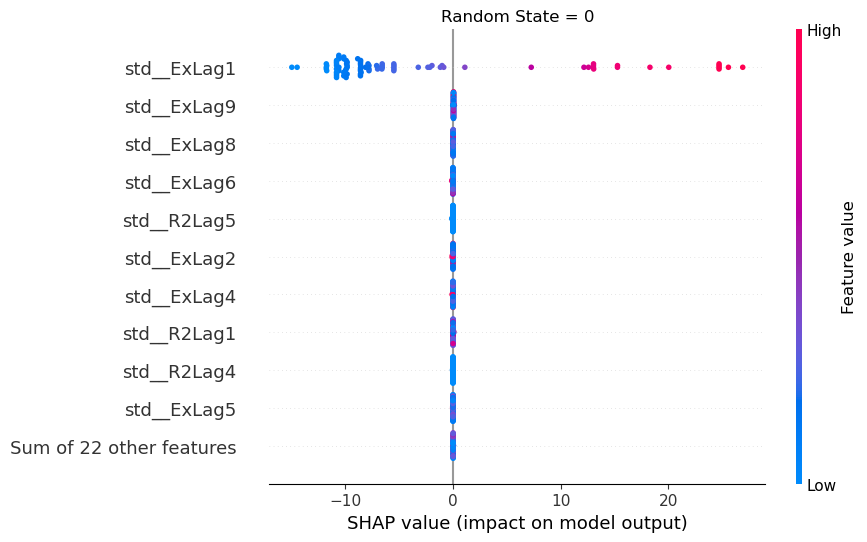

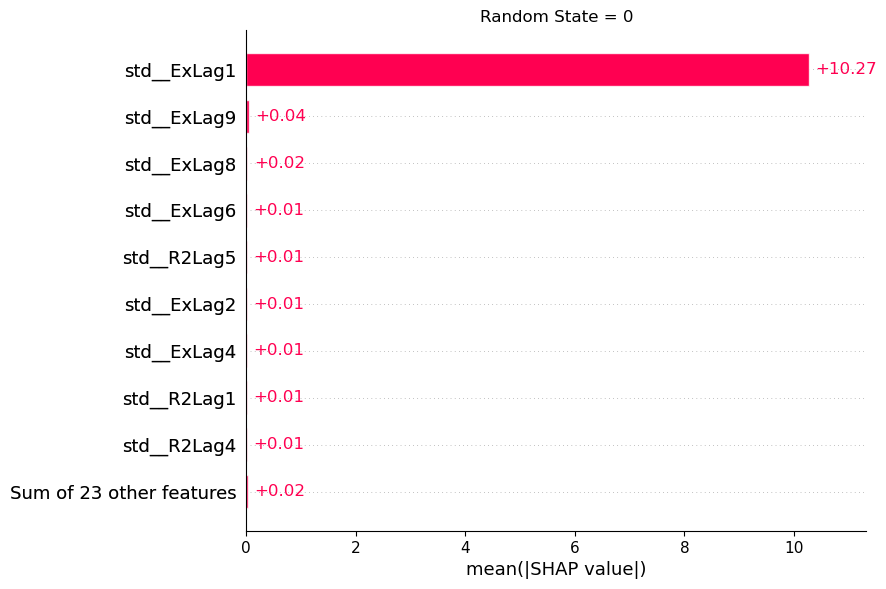

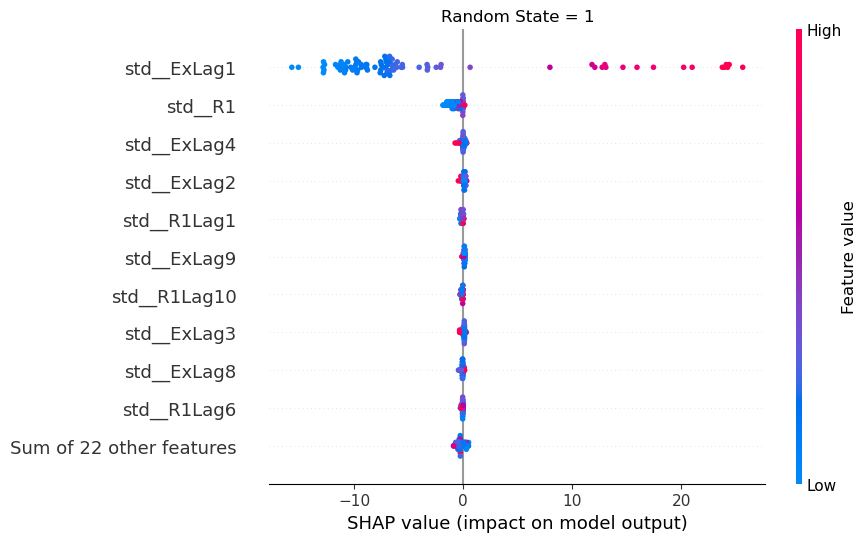

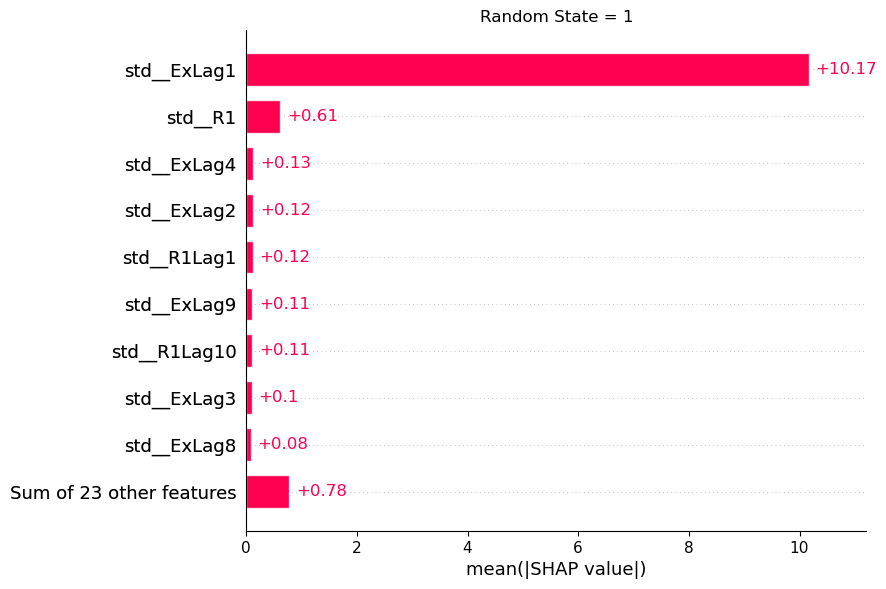

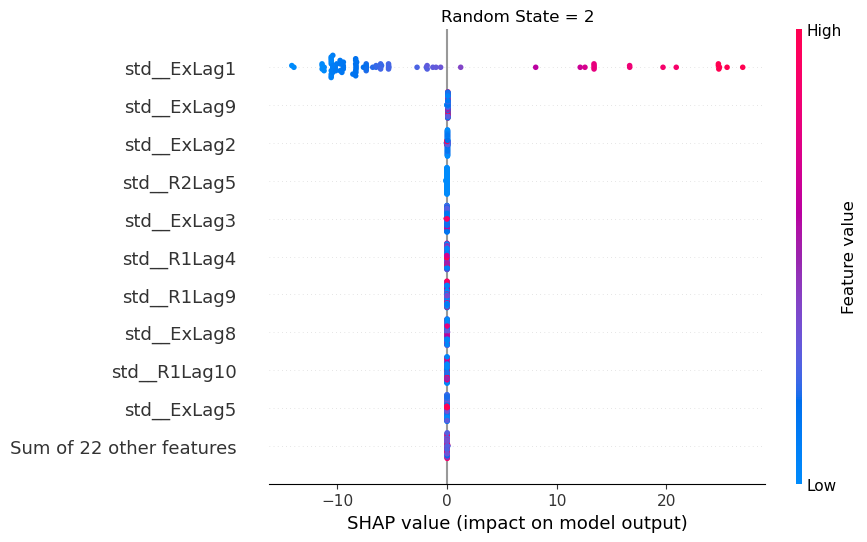

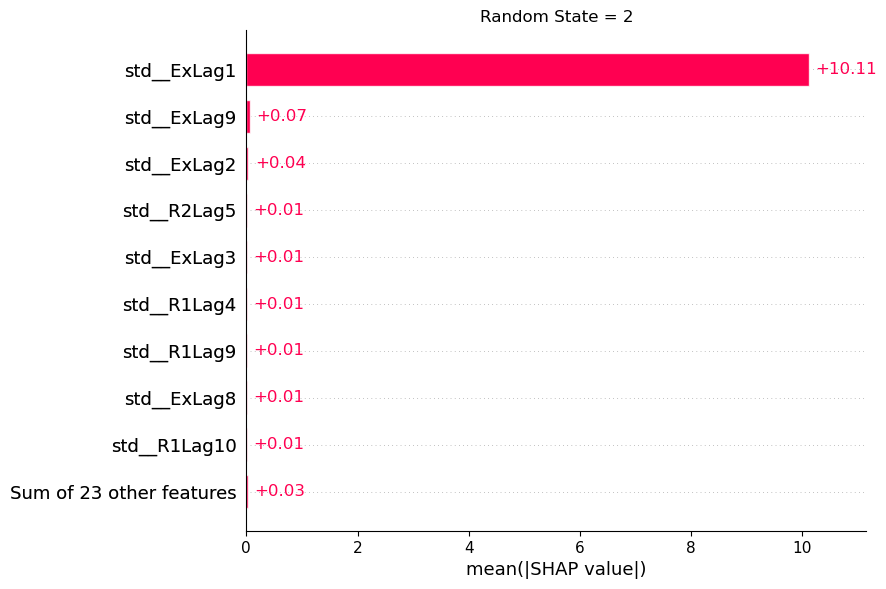

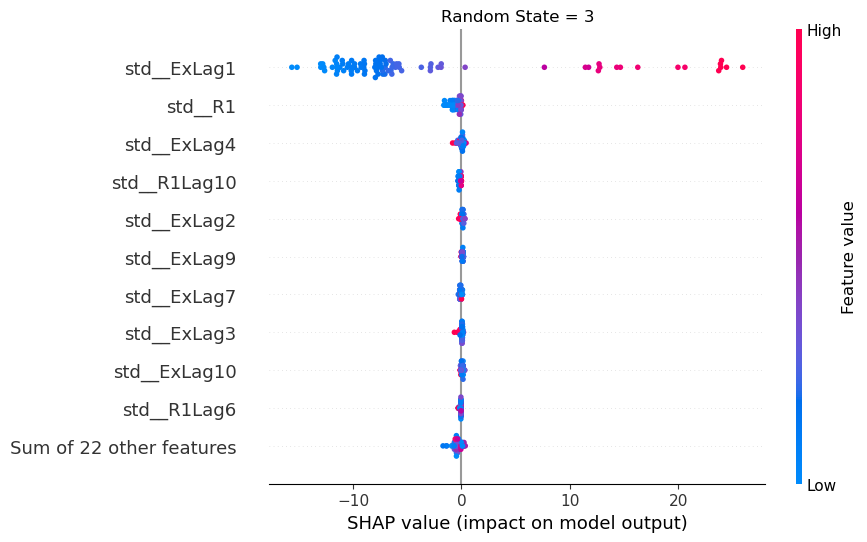

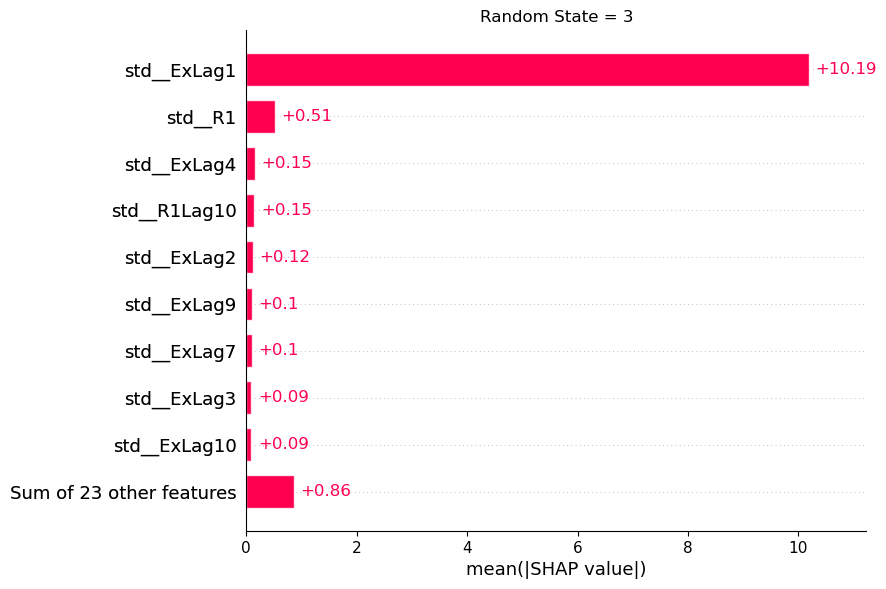

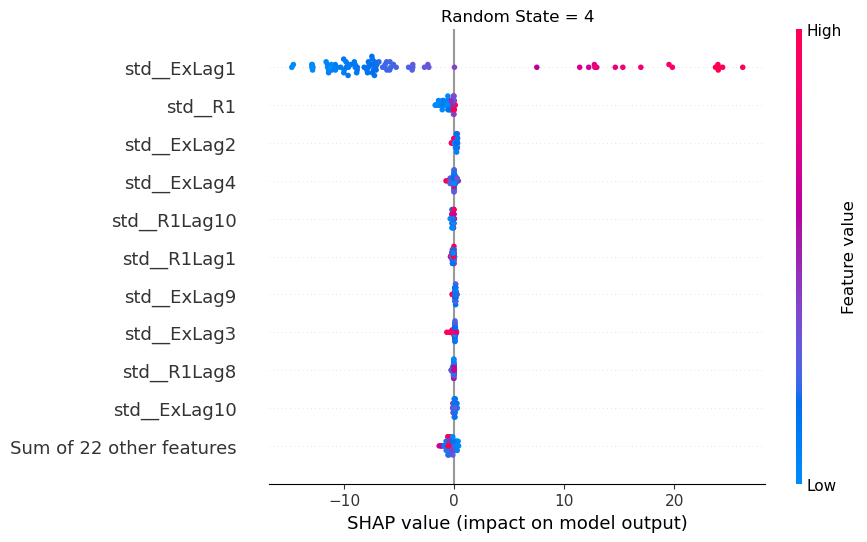

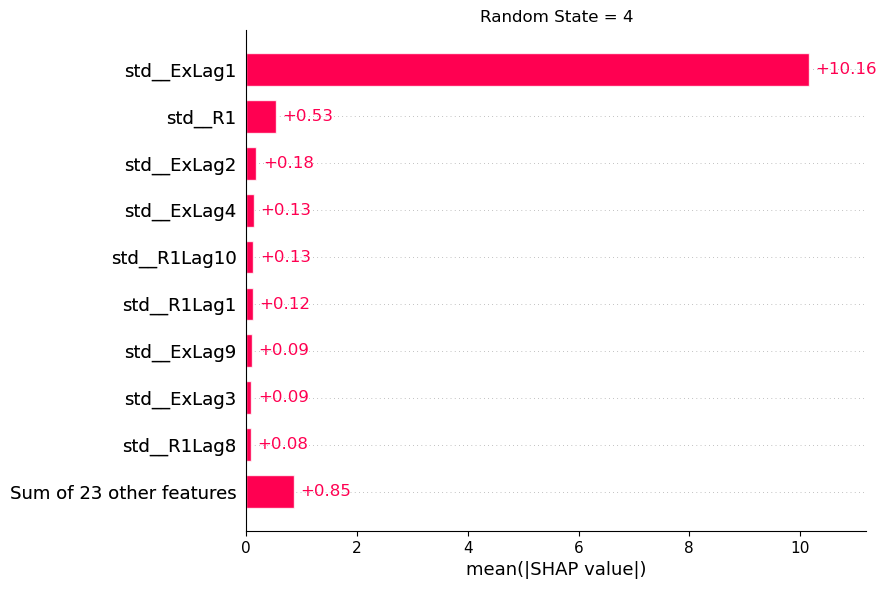

In [45]:
import shap

for i in [0,1,2,3,4]:
    explainer = shap.TreeExplainer(best_models[i])
    shap_values = explainer(df_test_imp)
    plt.title("Random State = {}".format(i))
    shap.plots.beeswarm(shap_values,  max_display=11, order=shap.Explanation.abs.mean(0),show=False)
    # plt.savefig('figures/beeswarm plot of RF(random state = {}.png'.format(i),dpi=350, bbox_inches = 'tight')
    plt.show()
    plt.title("Random State = {}".format(i))
    shap.plots.bar(shap_values.abs.mean(0),show=False)
    # plt.savefig('figures/bar plot of RF(random state = {}.png'.format(i),dpi=350, bbox_inches = 'tight')

    plt.show()


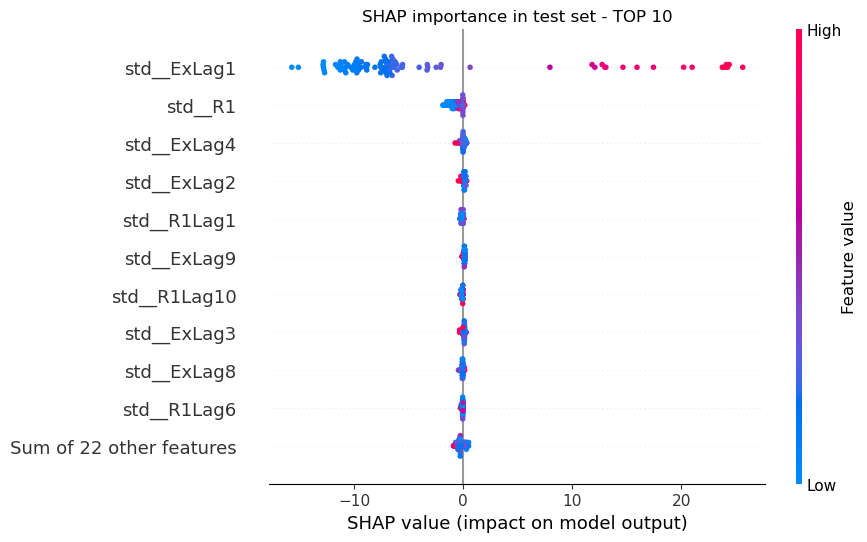

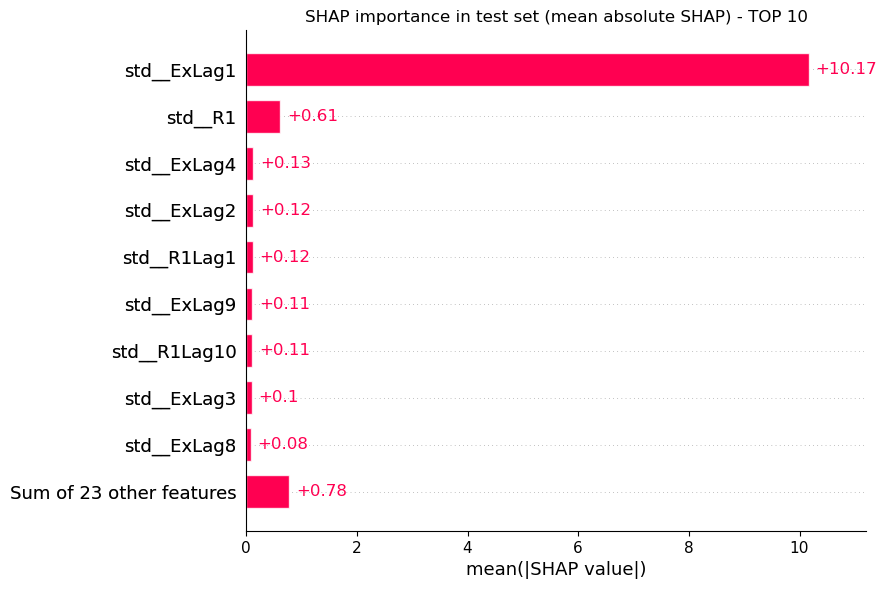

In [51]:
import shap

for i in [1]:
    explainer = shap.TreeExplainer(best_models[i])
    shap_values = explainer(df_test_imp)
    plt.title("SHAP importance in test set - TOP 10")
    shap.plots.beeswarm(shap_values,  max_display=11, order=shap.Explanation.abs.mean(0),show=False)
    # plt.savefig('figures/beeswarm plot of RF(random state = {}.png'.format(i),dpi=350, bbox_inches = 'tight')
    plt.show()
    plt.title("SHAP importance in test set (mean absolute SHAP) - TOP 10")
    shap.plots.bar(shap_values.abs.mean(0),show=False)
    # plt.savefig('figures/1(random state = {}.png'.format(i),dpi=350, bbox_inches = 'tight')

    plt.show()


In [52]:
import warnings

np.random.seed(42)

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
for i in [4]:
    
    y_test_prep = best_models[i].predict(df_test_imp)

    RMSE = mean_squared_error(y_test,y_test_pred, squared = False)
    
    ftrs = df_test_imp.columns
    
    nr_runs = 1
    scores = np.zeros([len(ftrs),nr_runs])
    
    
    
    for k in range(len(ftrs)):
        print('shuffling '+str(ftrs[k]))
        RMSEs = []
        for j in range(nr_runs):
            X_test_shuffled = df_test_imp.copy()
            X_test_shuffled[ftrs[j]] = np.random.permutation(df_test_imp[ftrs[j]].values)
            y_test_pred = best_models[i].predict(X_test_shuffled)
            RMSEs.append(mean_squared_error(y_test_pred,y_test, squared = False))
        print('   shuffled test score:',np.around(np.mean(RMSEs),3),'+/-',np.around(np.std(RMSEs),3))
        scores[k] = RMSEs

shuffling std__ExLag1
   shuffled test score: 16.275 +/- 0.0
shuffling std__ExLag2
   shuffled test score: 16.289 +/- 0.0
shuffling std__ExLag3
   shuffled test score: 15.794 +/- 0.0
shuffling std__ExLag4
   shuffled test score: 17.235 +/- 0.0
shuffling std__ExLag5
   shuffled test score: 18.306 +/- 0.0
shuffling std__ExLag6
   shuffled test score: 15.847 +/- 0.0
shuffling std__ExLag7
   shuffled test score: 15.749 +/- 0.0
shuffling std__ExLag8
   shuffled test score: 15.676 +/- 0.0
shuffling std__ExLag9
   shuffled test score: 16.06 +/- 0.0
shuffling std__ExLag10
   shuffled test score: 15.403 +/- 0.0
shuffling std__R1
   shuffled test score: 16.453 +/- 0.0
shuffling std__R1Lag1
   shuffled test score: 16.639 +/- 0.0
shuffling std__R1Lag2
   shuffled test score: 16.541 +/- 0.0
shuffling std__R1Lag3
   shuffled test score: 17.081 +/- 0.0
shuffling std__R1Lag4
   shuffled test score: 15.029 +/- 0.0
shuffling std__R1Lag5
   shuffled test score: 16.961 +/- 0.0
shuffling std__R1Lag6
   shu

In [53]:
import warnings

np.random.seed(42)

y_test_prep = best_models[1].predict(df_test_imp)

RMSE = mean_squared_error(y_test,y_test_pred, squared = False)

ftrs = df_test_imp.columns

nr_runs = 10
scores = np.zeros([len(ftrs),nr_runs])

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


for i in range(len(ftrs)):
    print('shuffling '+str(ftrs[i]))
    RMSEs = []
    for j in range(nr_runs):
        X_test_shuffled = df_test_imp.copy()
        X_test_shuffled[ftrs[i]] = np.random.permutation(df_test_imp[ftrs[i]].values)
        y_test_pred = best_models[1].predict(X_test_shuffled)
        RMSEs.append(mean_squared_error(y_test_pred,y_test, squared = False))
    print('   shuffled test score:',np.around(np.mean(RMSEs),3),'+/-',np.around(np.std(RMSEs),3))
    scores[i] = RMSEs

shuffling std__ExLag1
   shuffled test score: 16.277 +/- 0.824
shuffling std__ExLag2
   shuffled test score: 3.155 +/- 0.02
shuffling std__ExLag3
   shuffled test score: 3.122 +/- 0.015
shuffling std__ExLag4
   shuffled test score: 3.185 +/- 0.033
shuffling std__ExLag5
   shuffled test score: 3.18 +/- 0.006
shuffling std__ExLag6
   shuffled test score: 3.175 +/- 0.009
shuffling std__ExLag7
   shuffled test score: 3.172 +/- 0.008
shuffling std__ExLag8
   shuffled test score: 3.234 +/- 0.01
shuffling std__ExLag9
   shuffled test score: 3.176 +/- 0.008
shuffling std__ExLag10
   shuffled test score: 3.116 +/- 0.015
shuffling std__R1
   shuffled test score: 3.297 +/- 0.037
shuffling std__R1Lag1
   shuffled test score: 3.198 +/- 0.01
shuffling std__R1Lag2
   shuffled test score: 3.177 +/- 0.008
shuffling std__R1Lag3
   shuffled test score: 3.188 +/- 0.002
shuffling std__R1Lag4
   shuffled test score: 3.19 +/- 0.013
shuffling std__R1Lag5
   shuffled test score: 3.187 +/- 0.006
shuffling std__

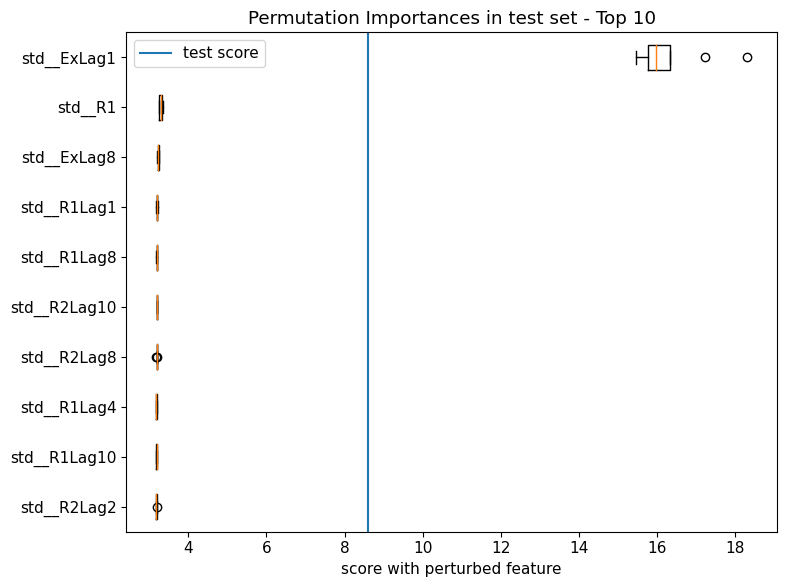

In [54]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs[:10]][::-1].T,labels=ftrs[sorted_indcs[:10]][::-1],vert=False)
plt.axvline(test_rmses[1],label='test score')
plt.title("Permutation Importances in test set - Top 10")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
# plt.savefig('figures/permutation_rs1',dpi=350, bbox_inches = 'tight')
plt.show()

<Figure size 800x600 with 0 Axes>

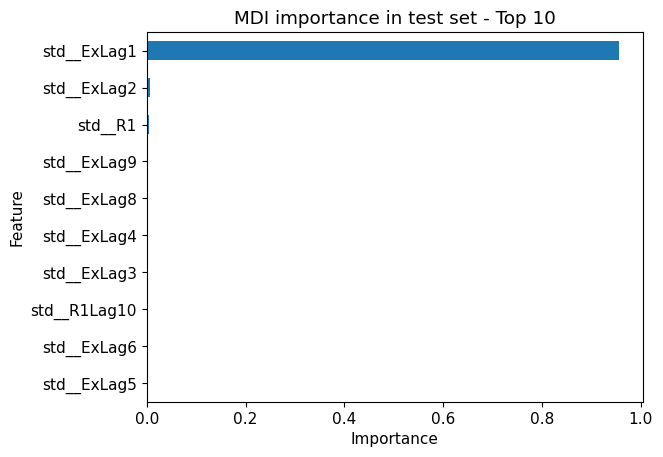

In [55]:
feature_names = df_test_imp.columns

mdi_importances = pd.Series(
    best_models[1].feature_importances_, index=feature_names
).sort_values(ascending=True)


top_10_importances = mdi_importances.tail(10)

plt.figure(figsize=(8,6))
ig, ax = plt.subplots()
top_10_importances.plot.barh(ax=ax)
ax.set_title("MDI importance in test set - Top 10")
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
fig.tight_layout()


# plt.savefig('figures/MDI_rs1.png', dpi=350, bbox_inches='tight')


plt.show()

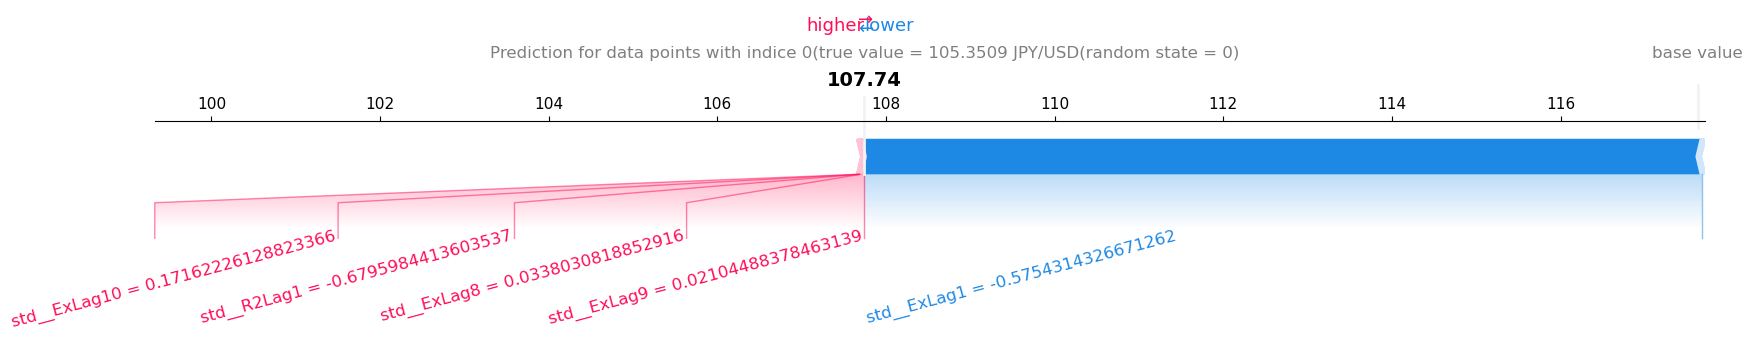

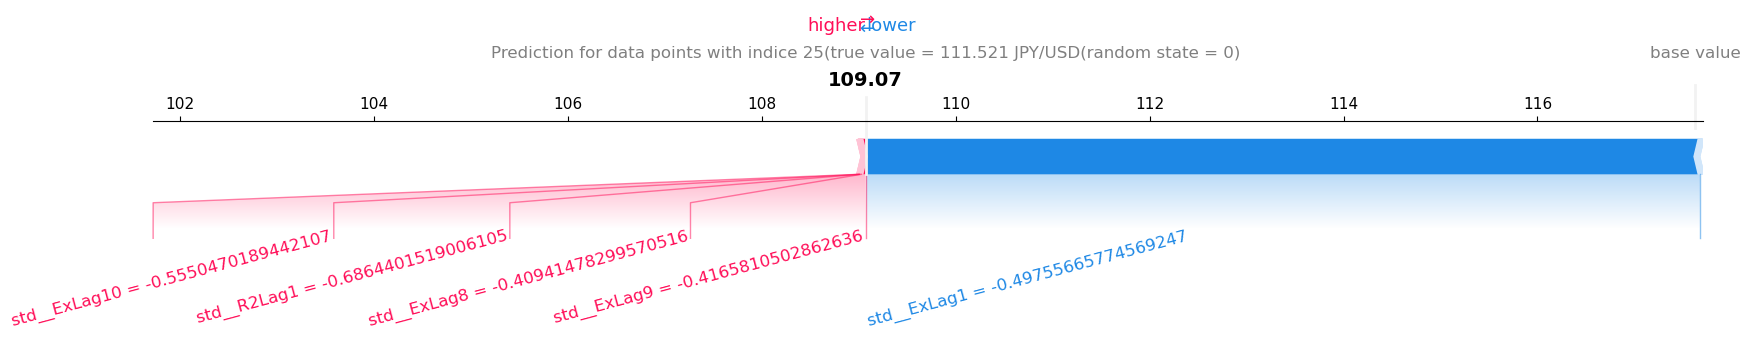

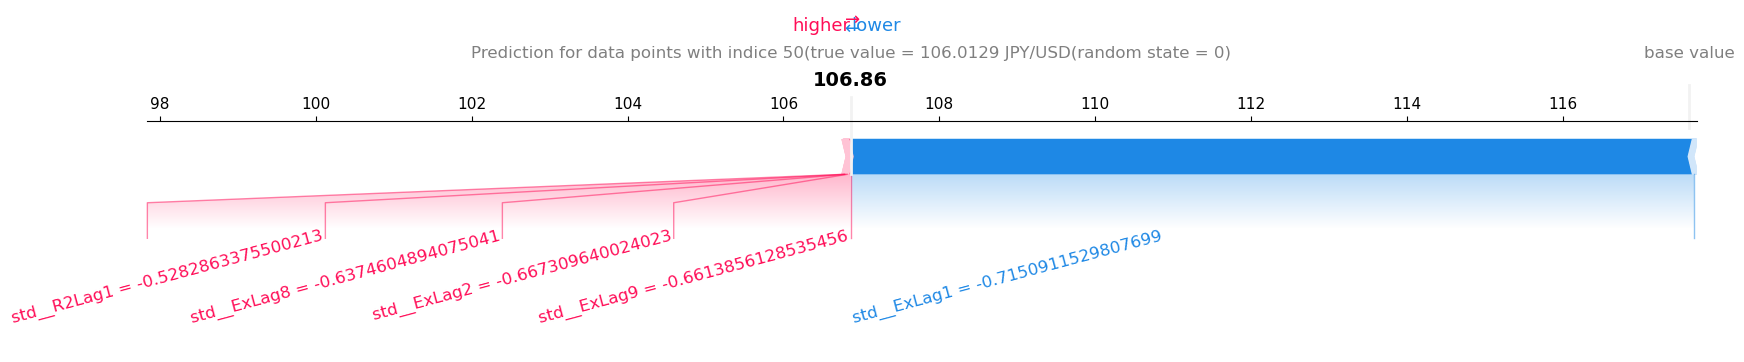

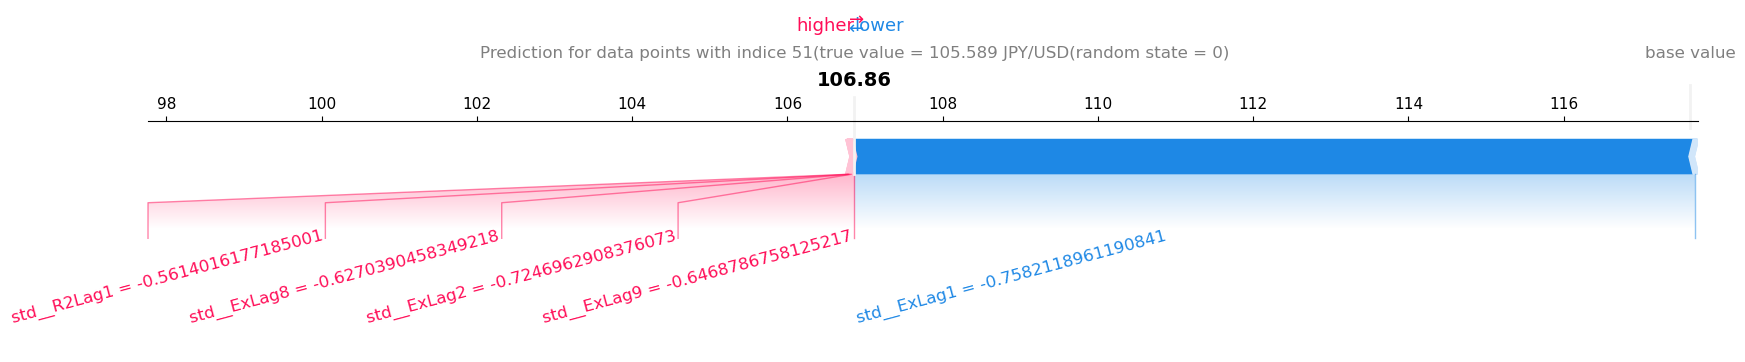

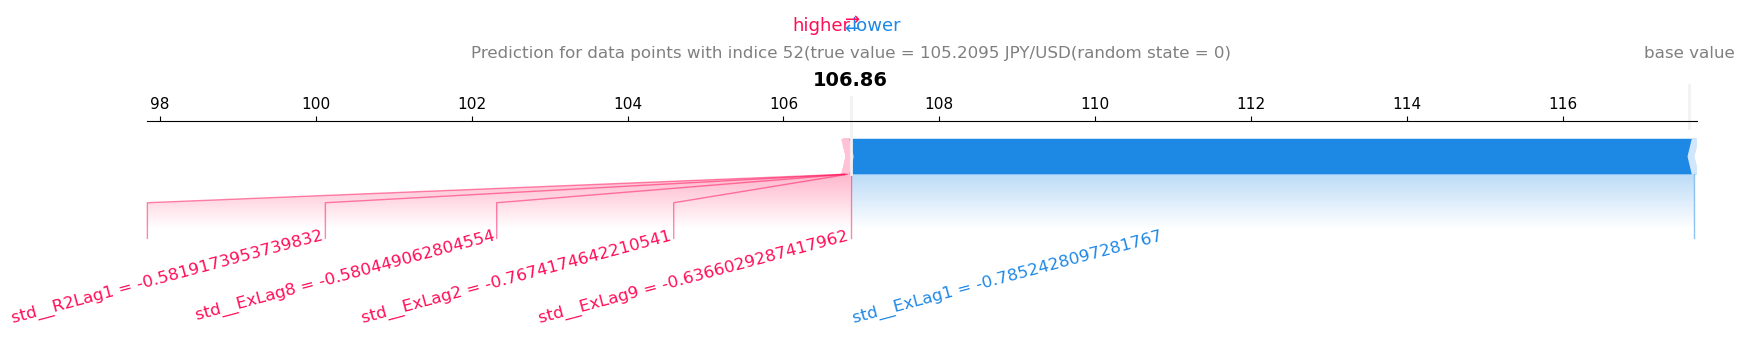

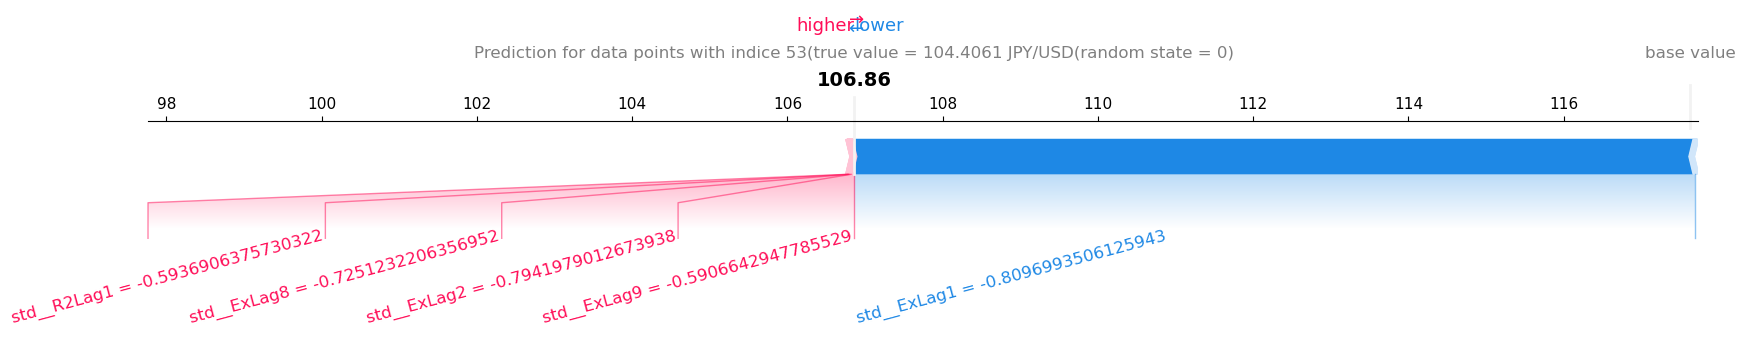

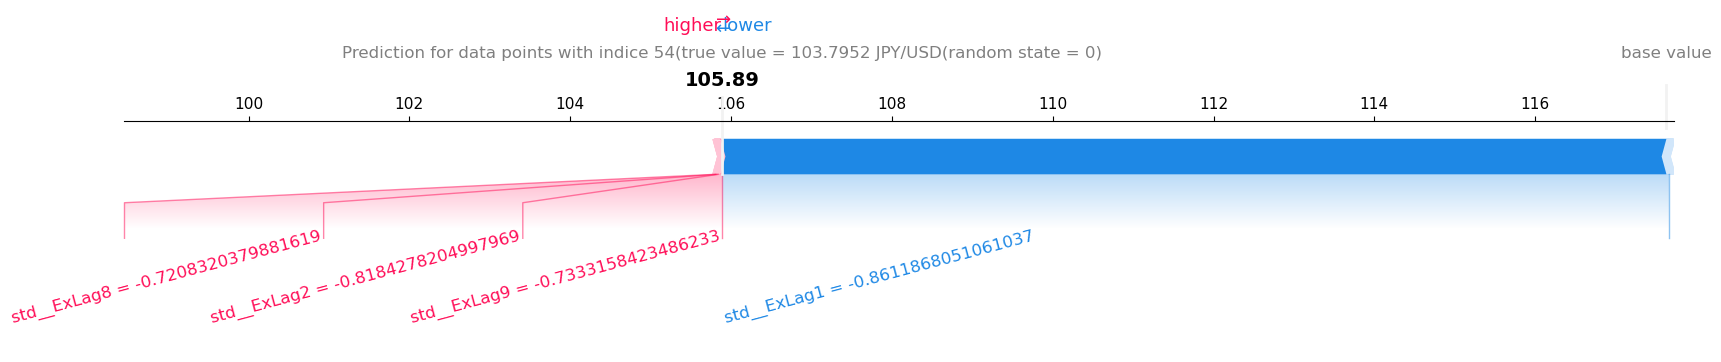

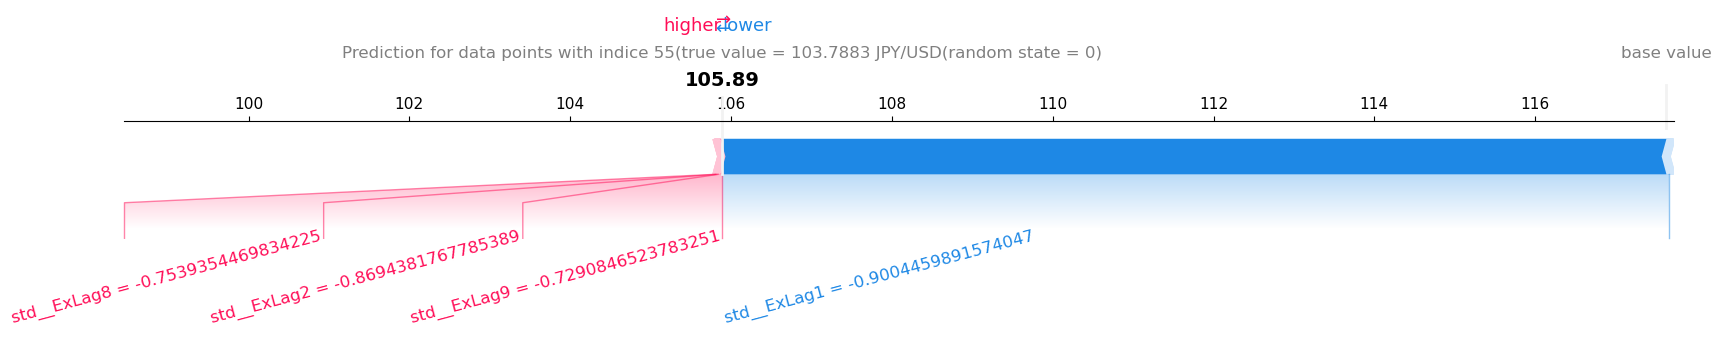

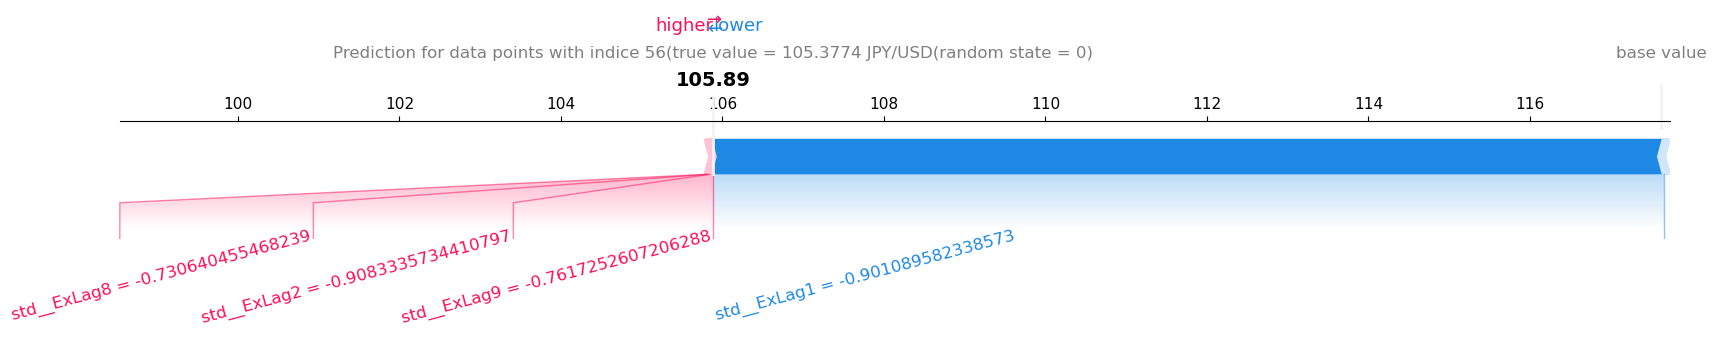

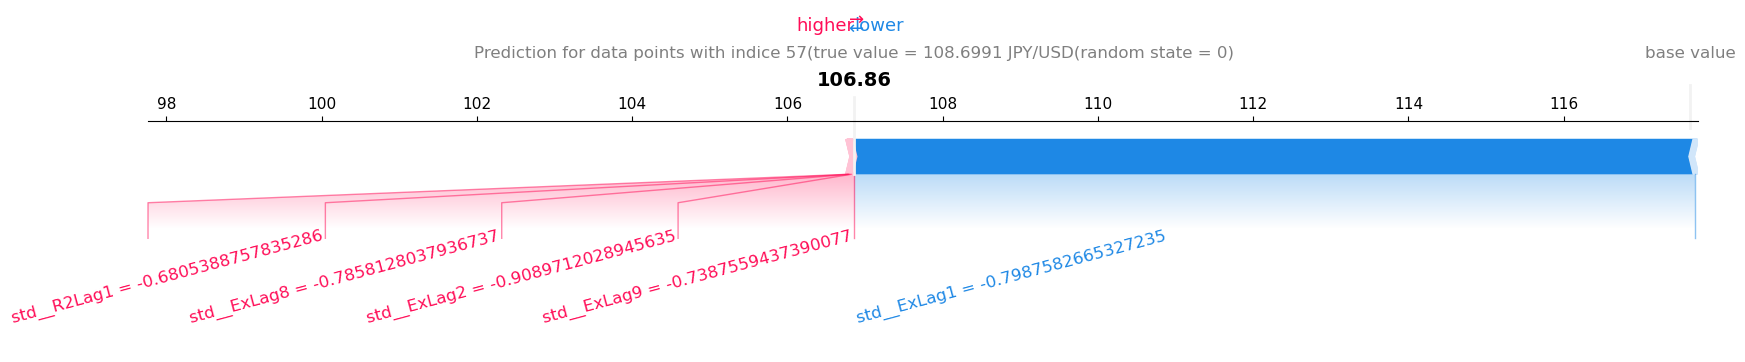

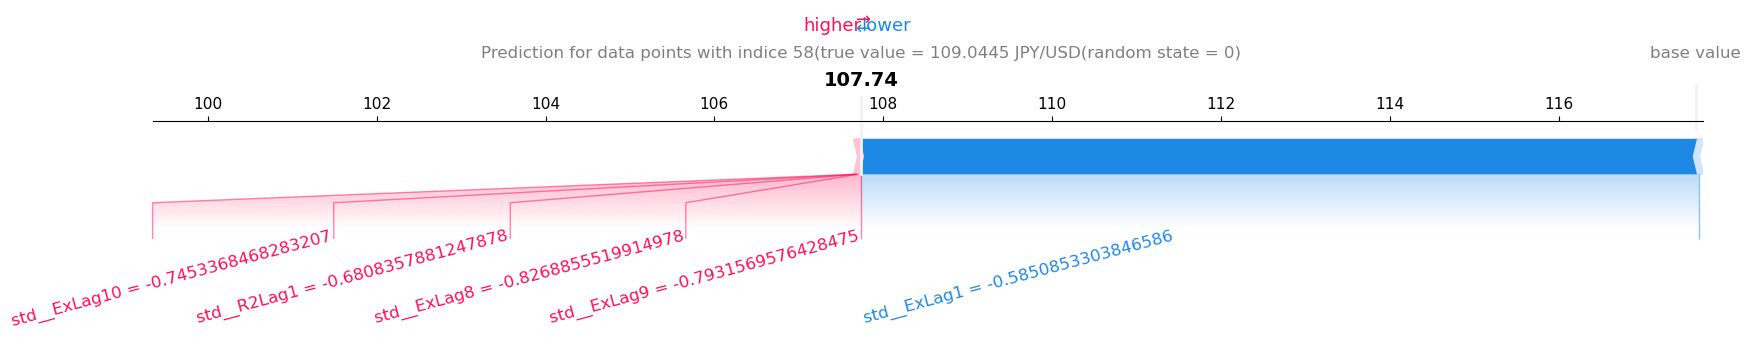

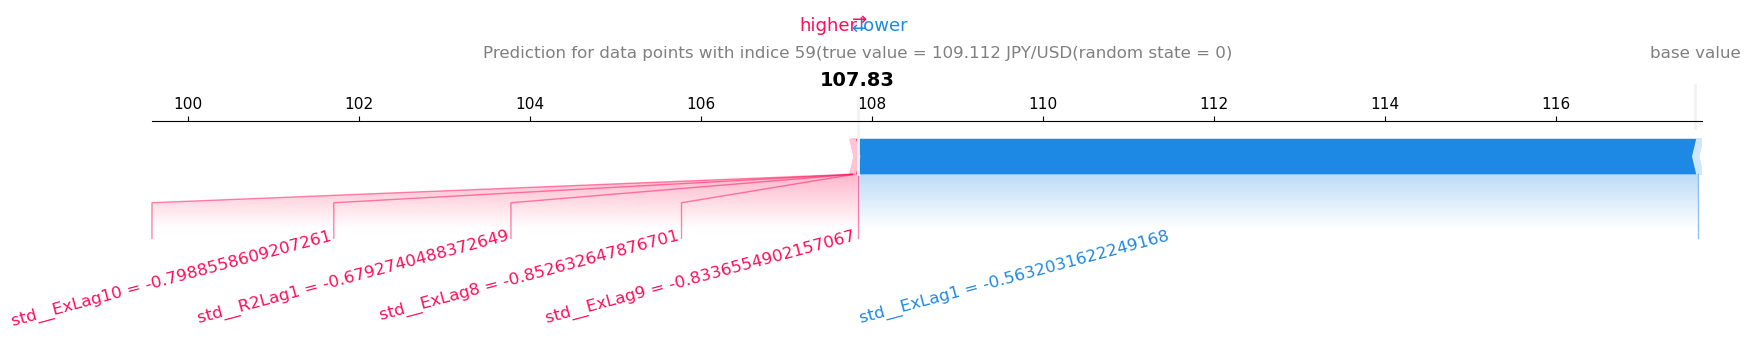

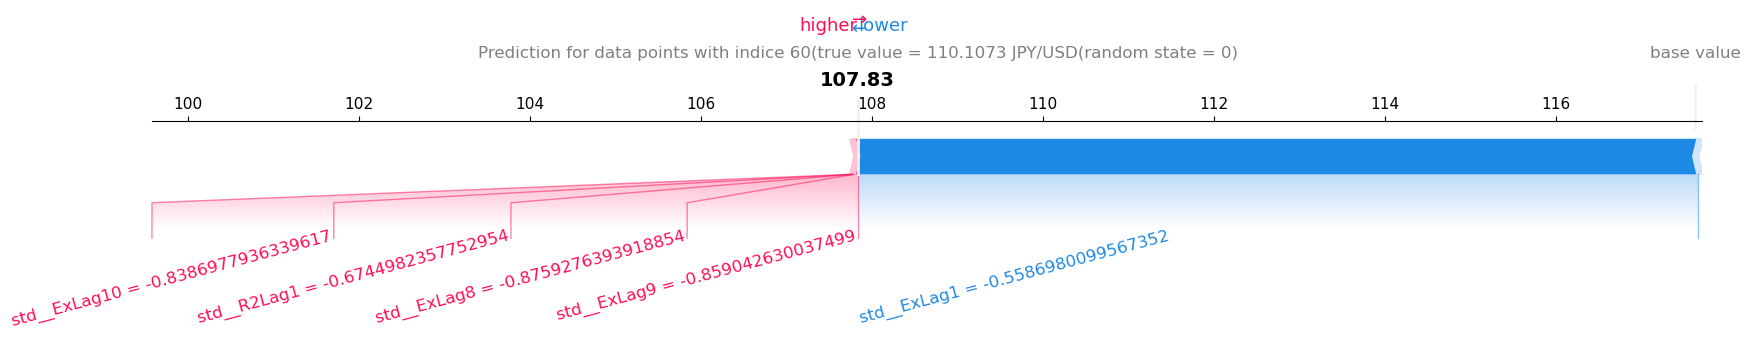

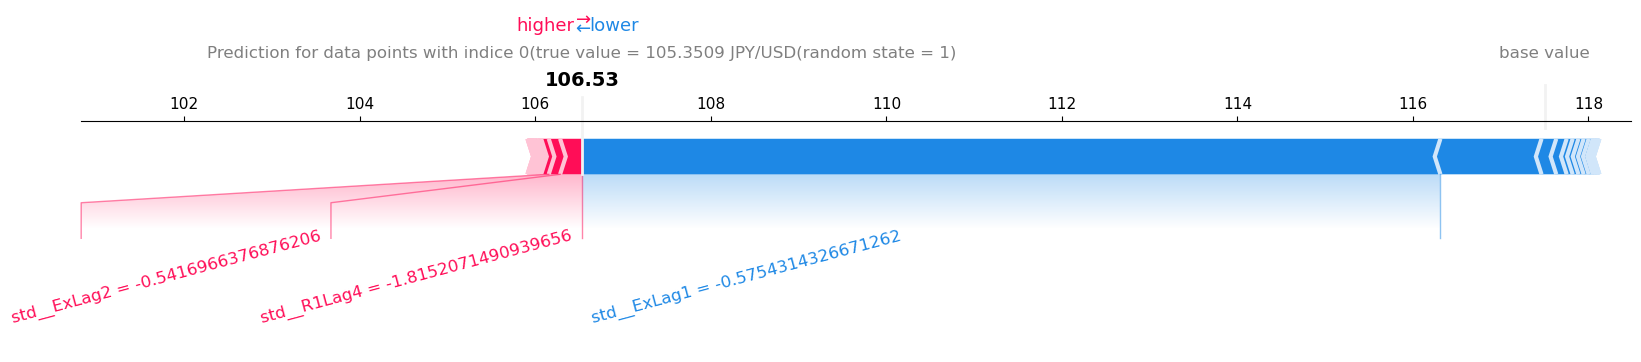

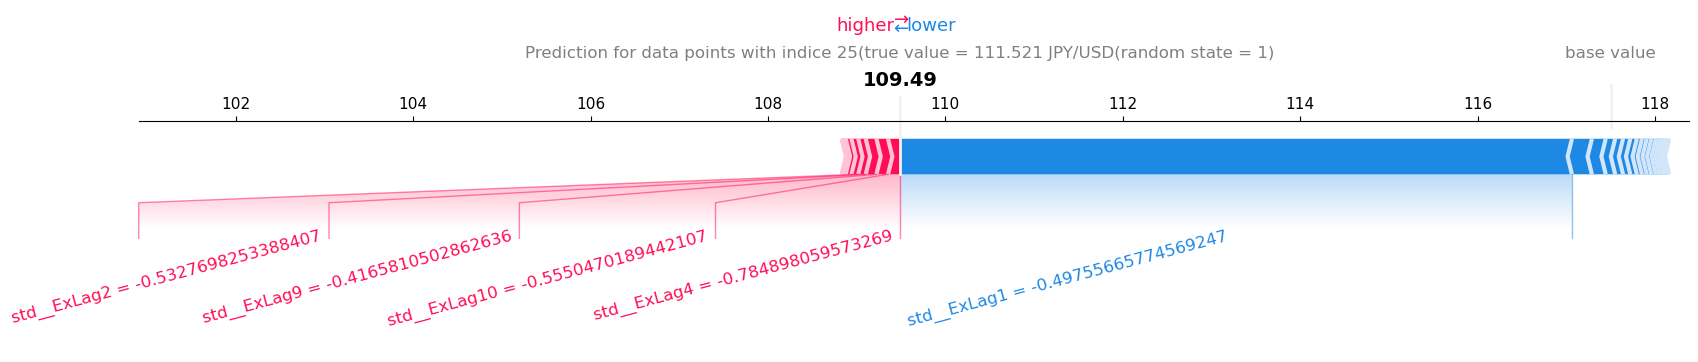

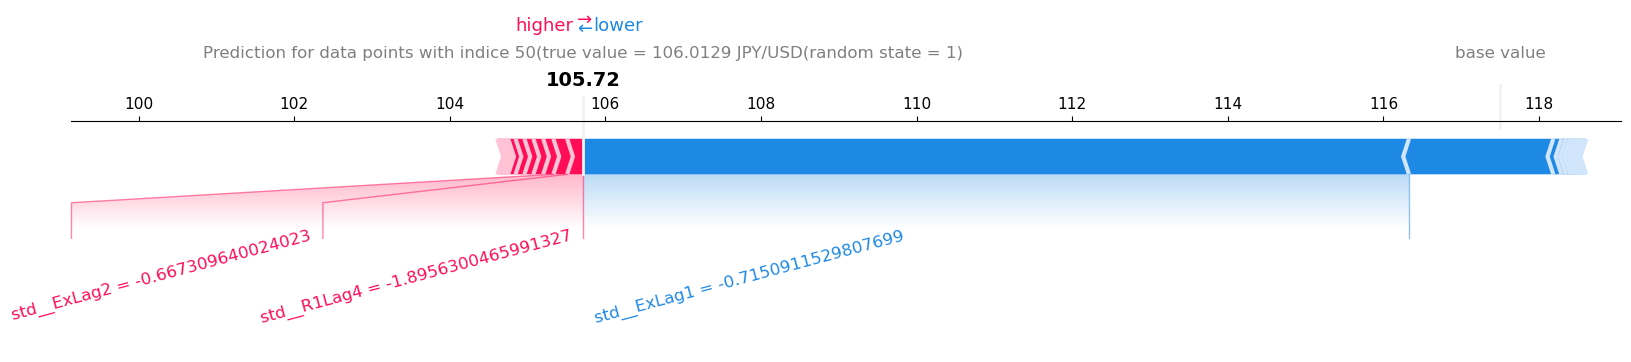

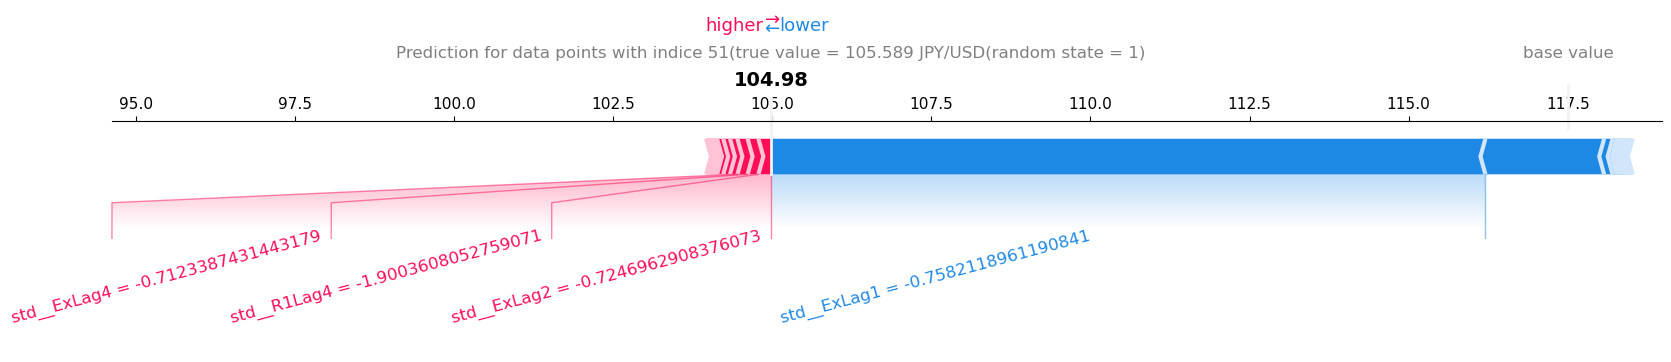

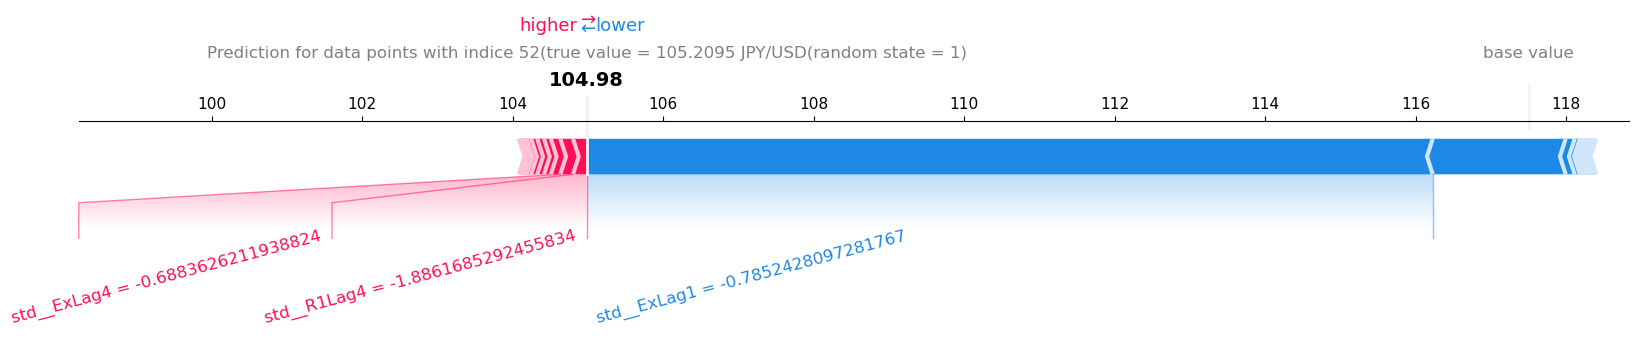

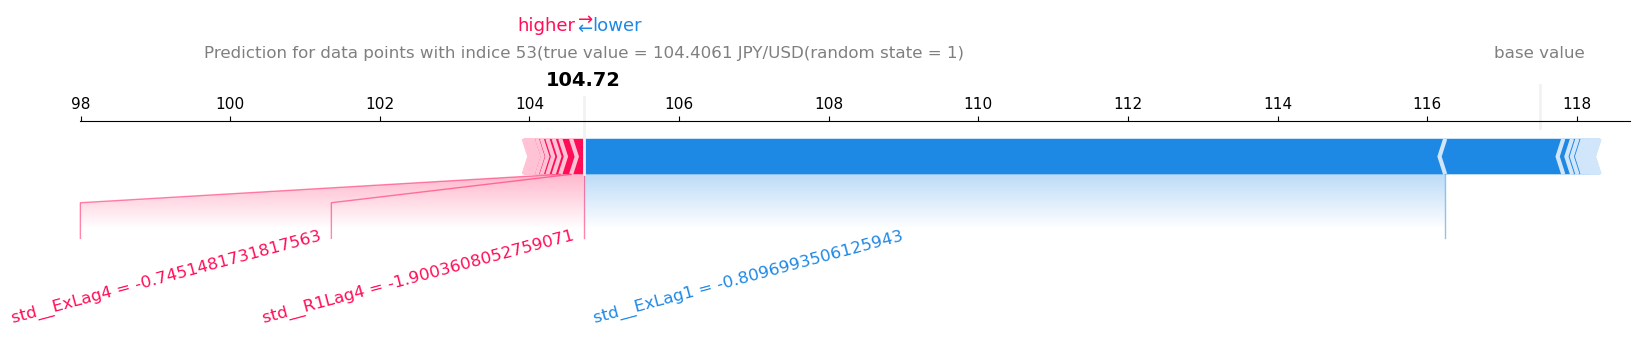

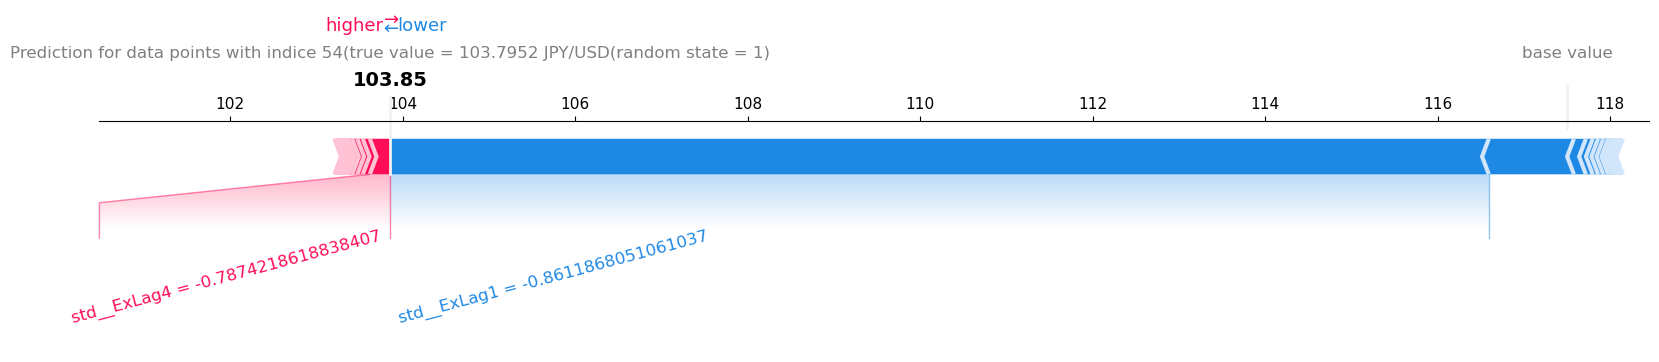

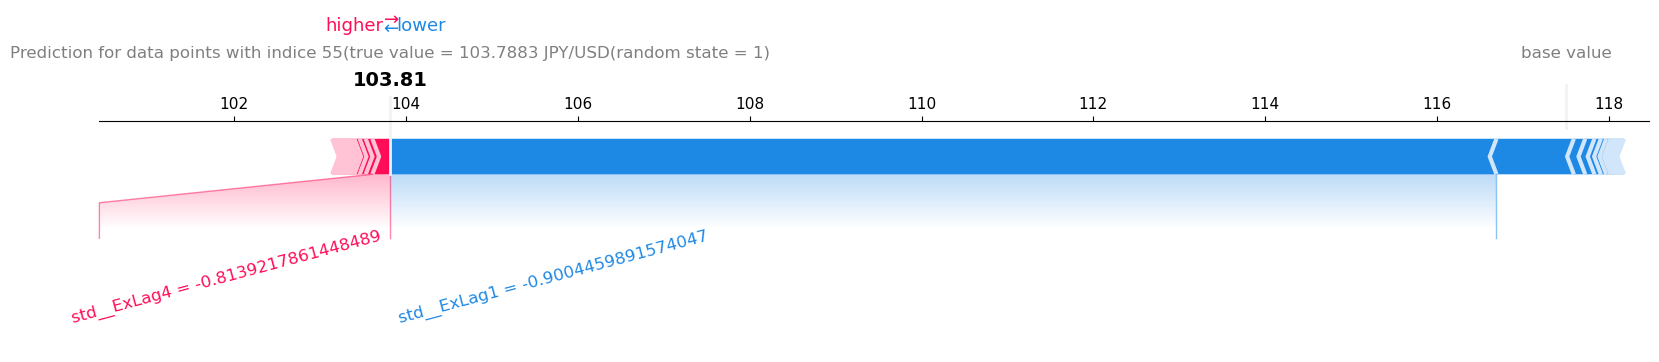

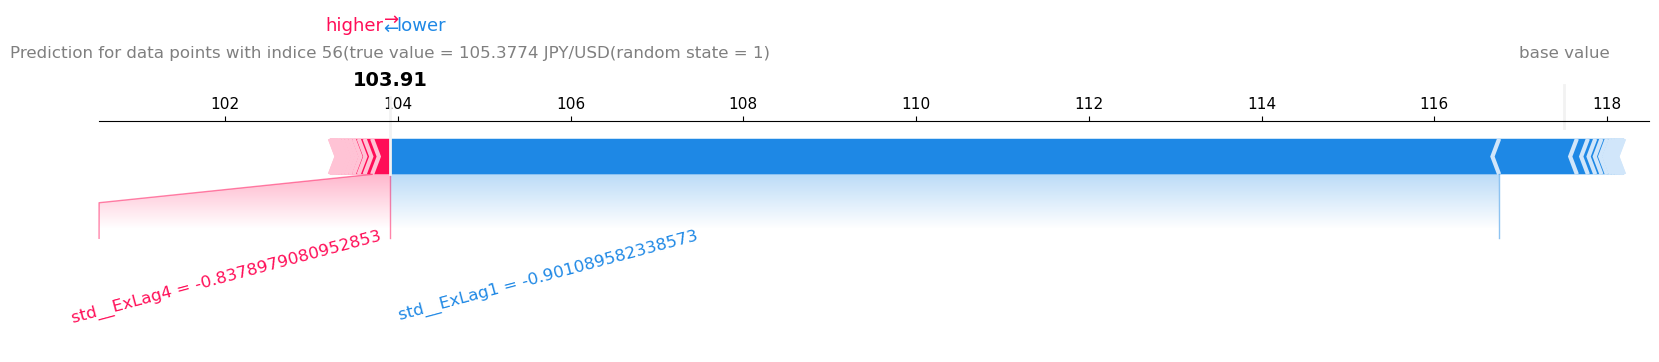

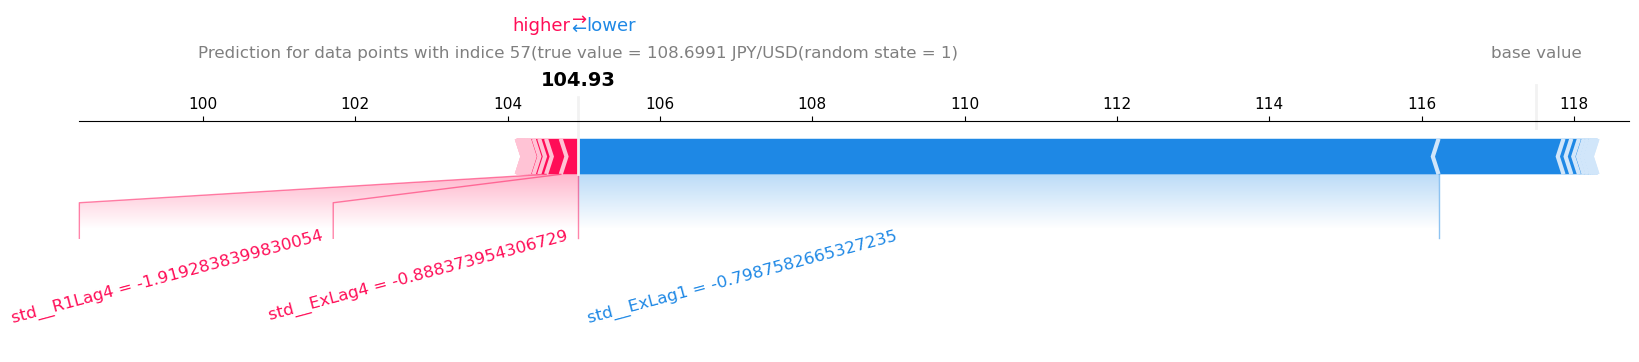

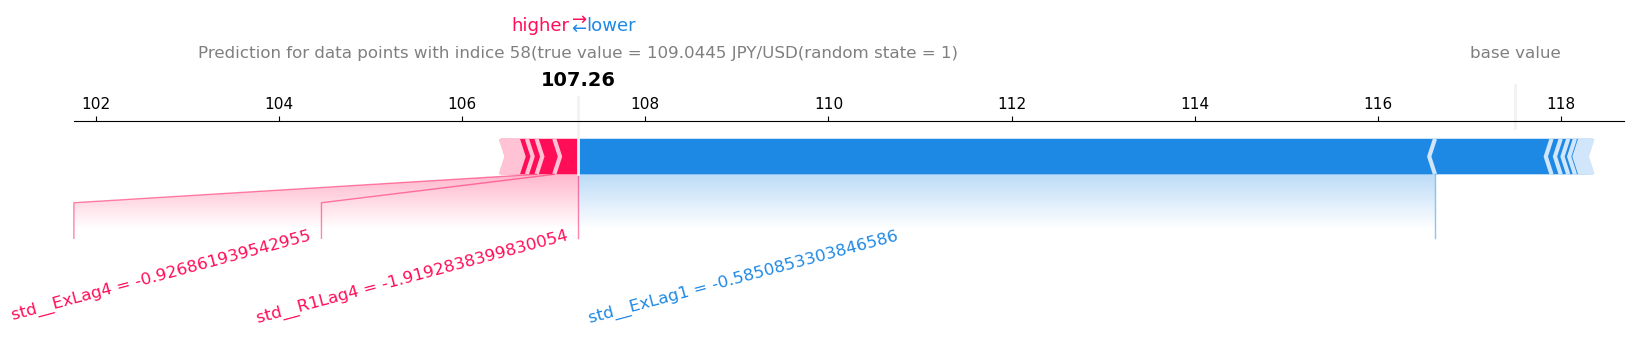

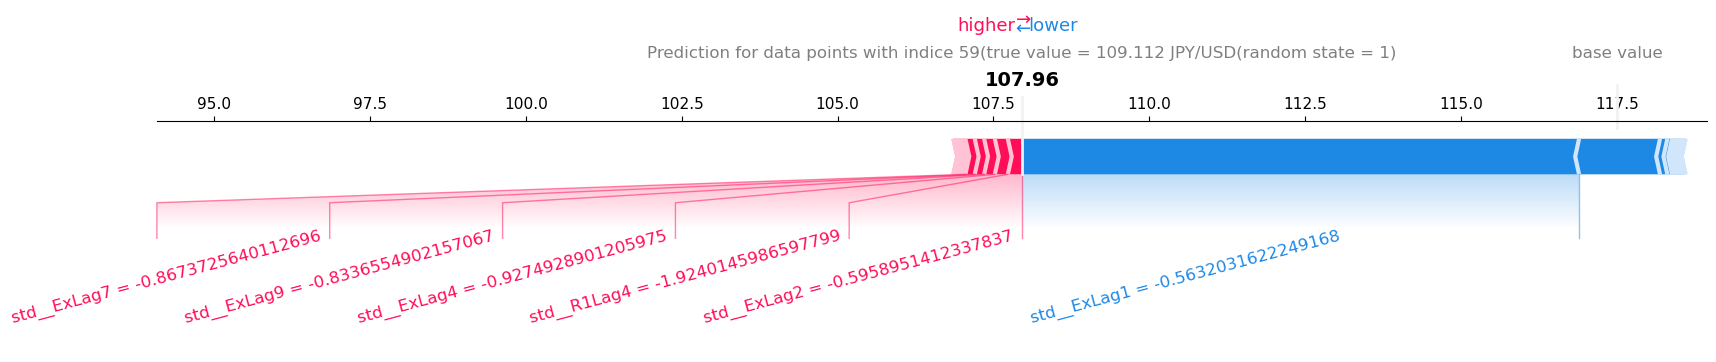

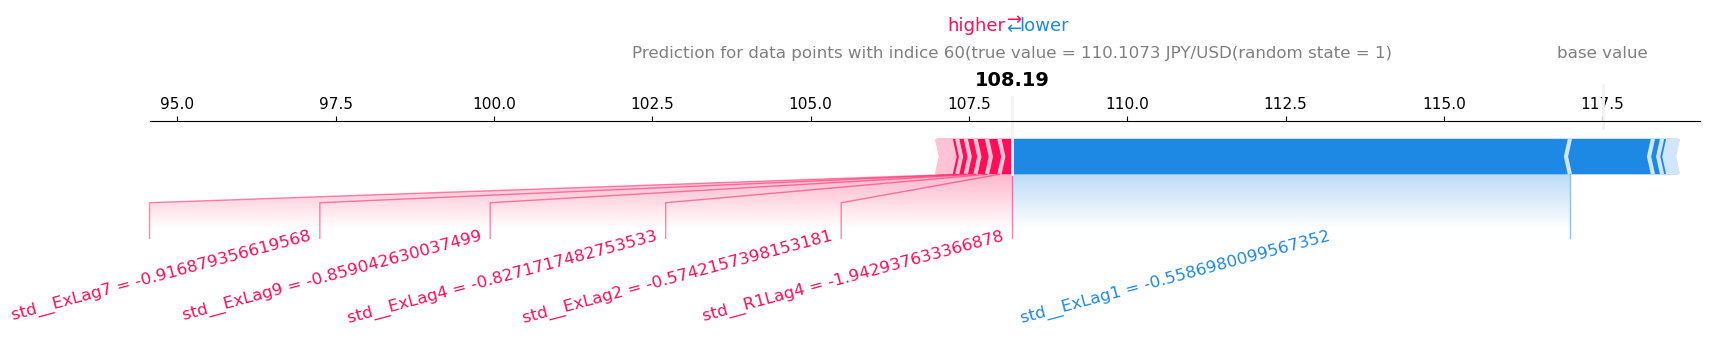

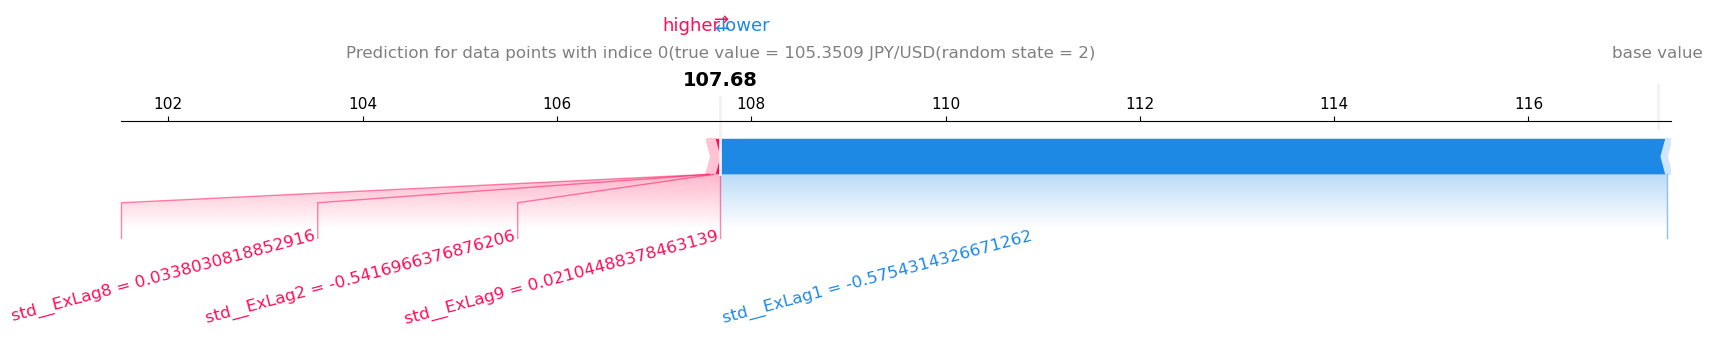

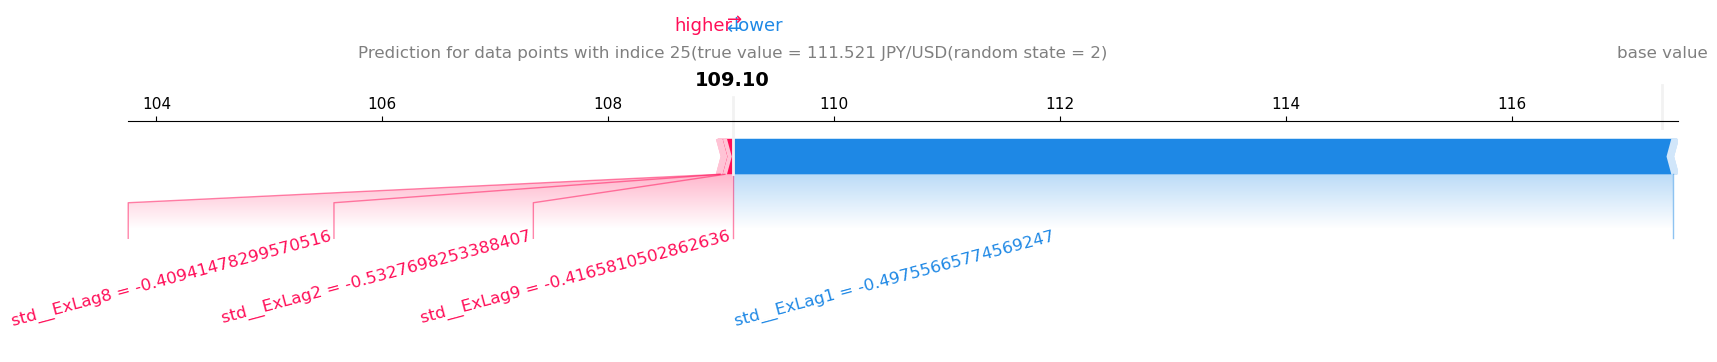

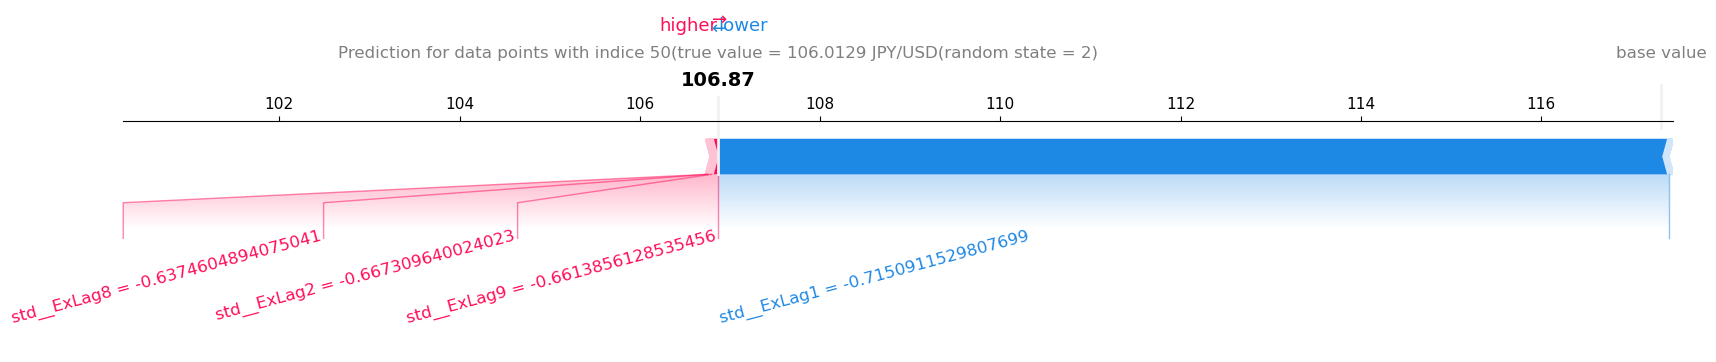

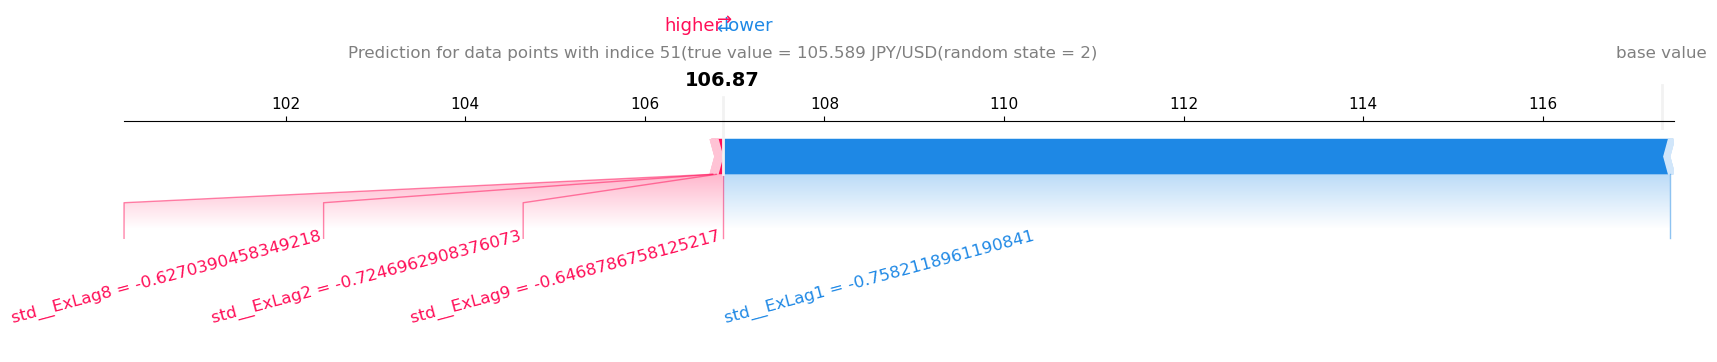

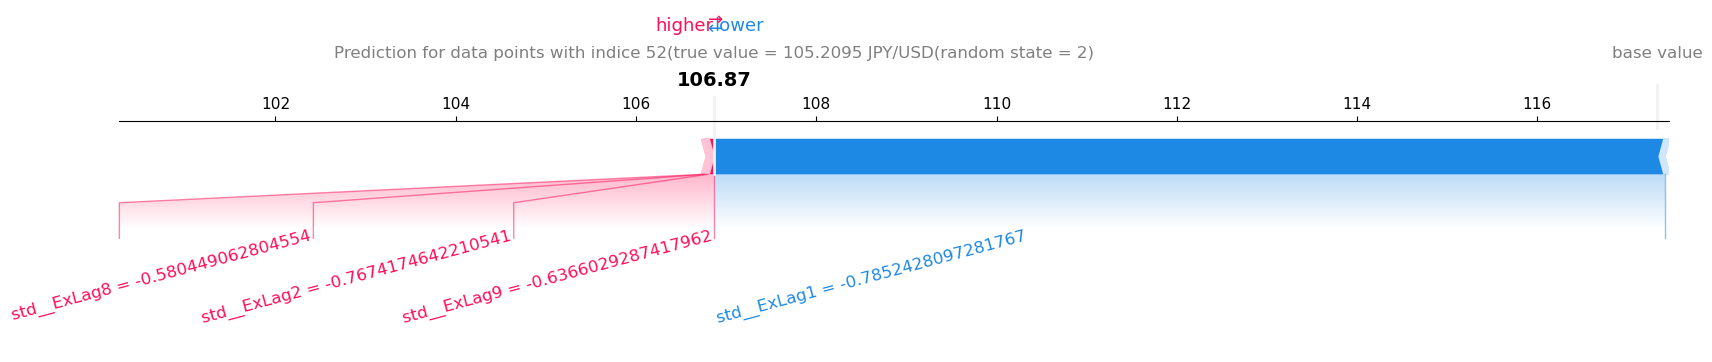

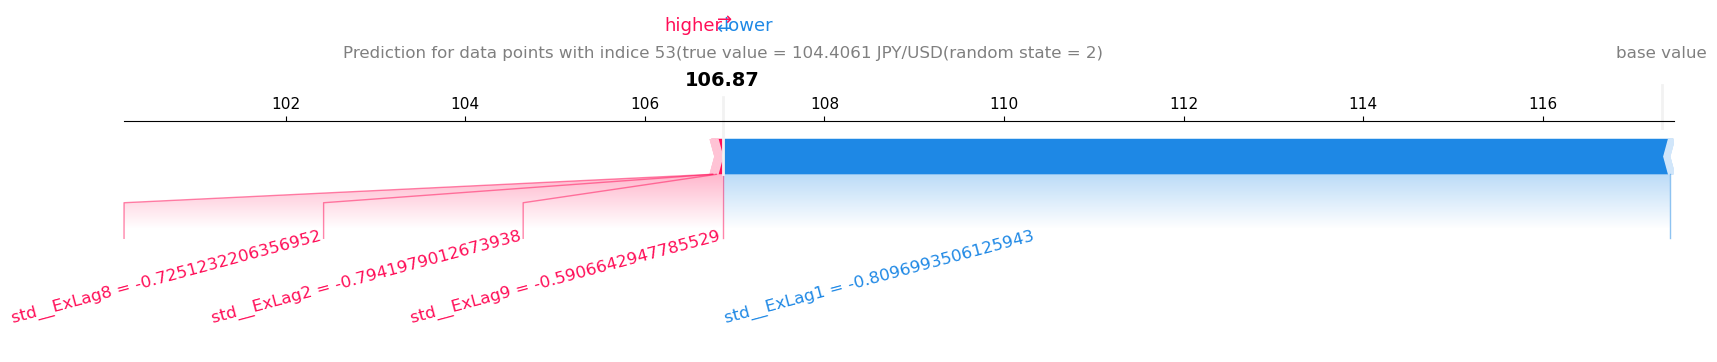

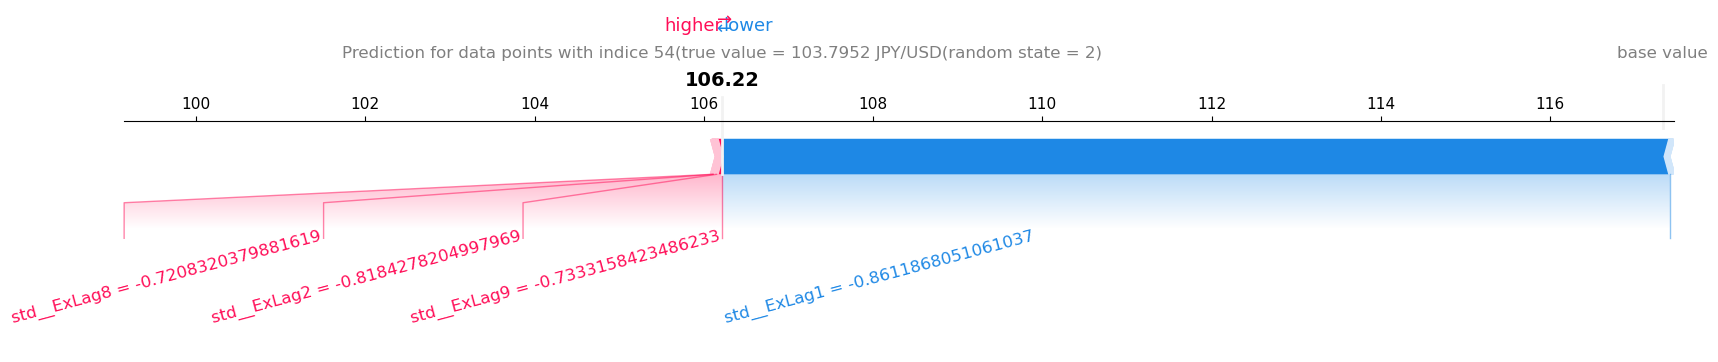

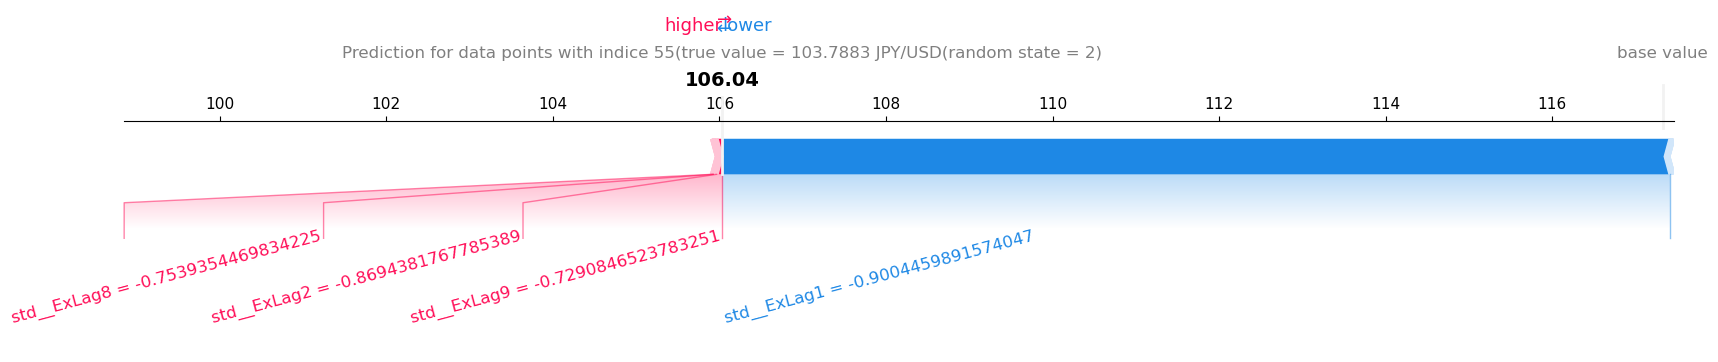

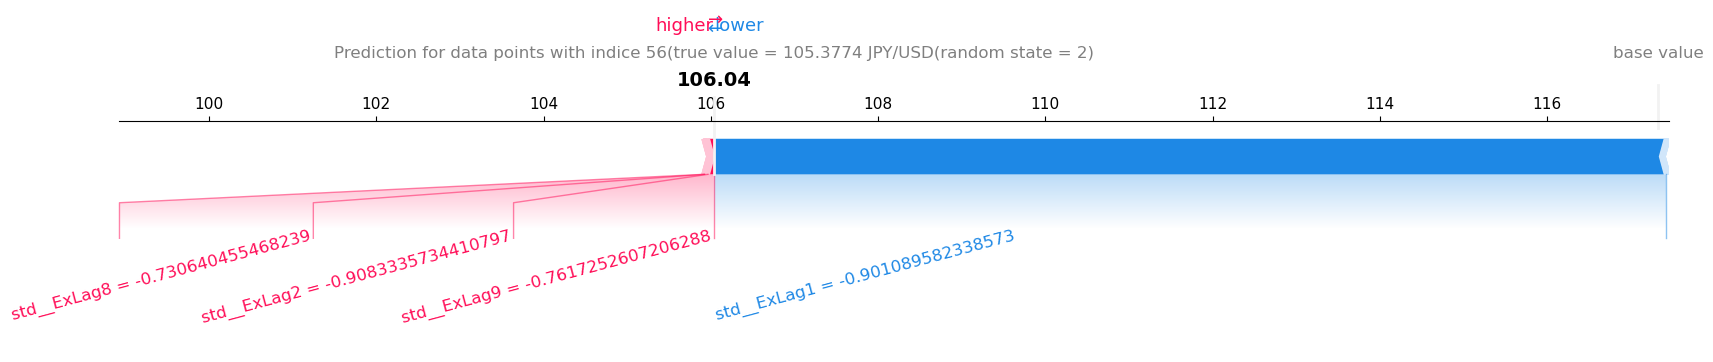

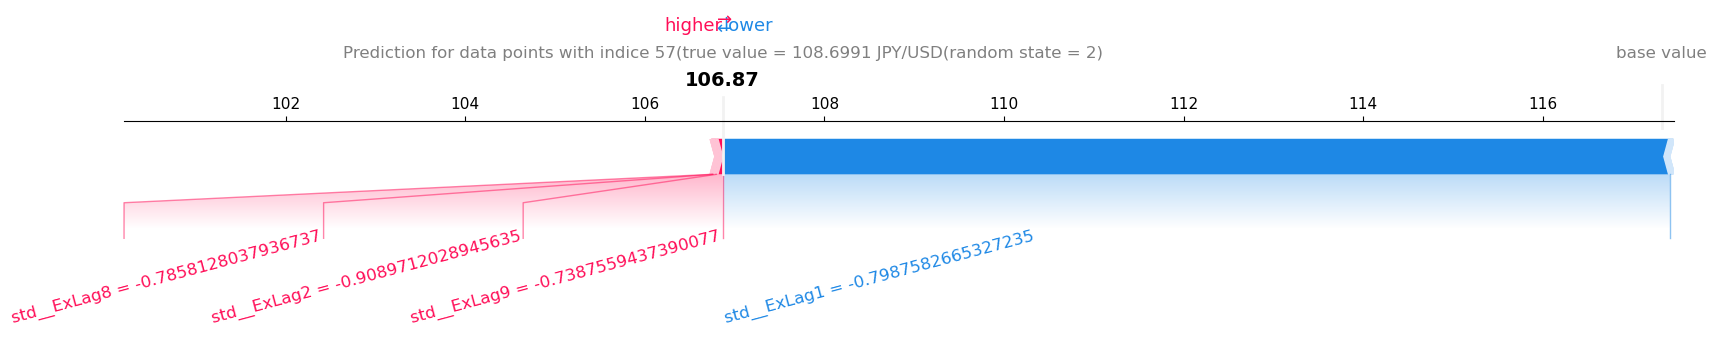

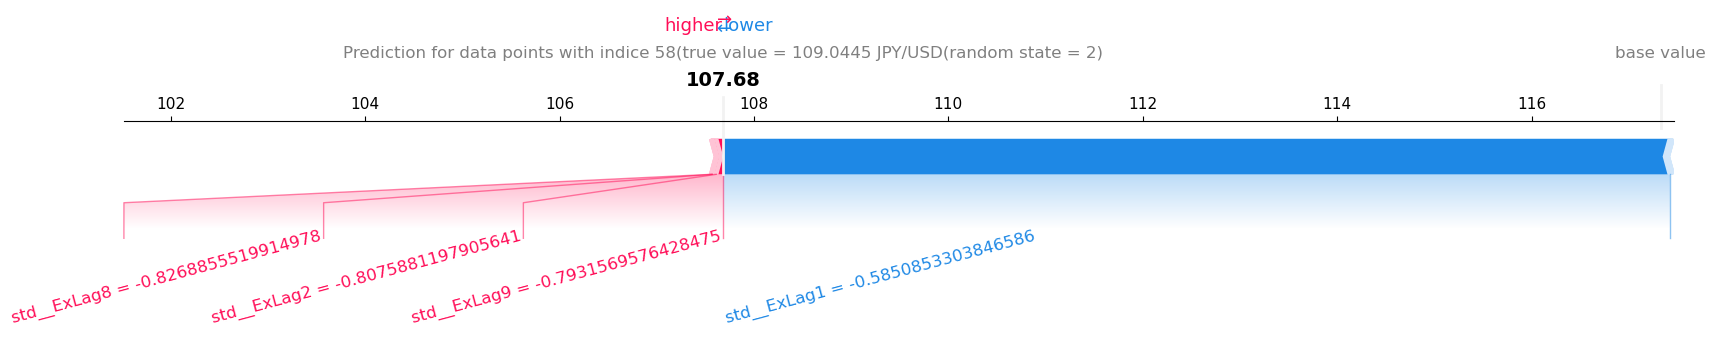

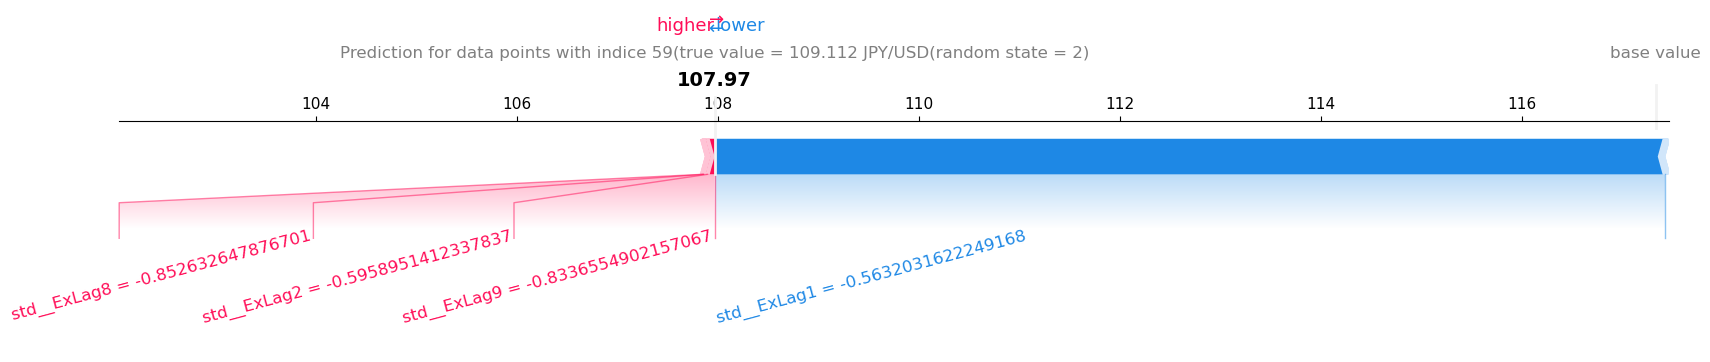

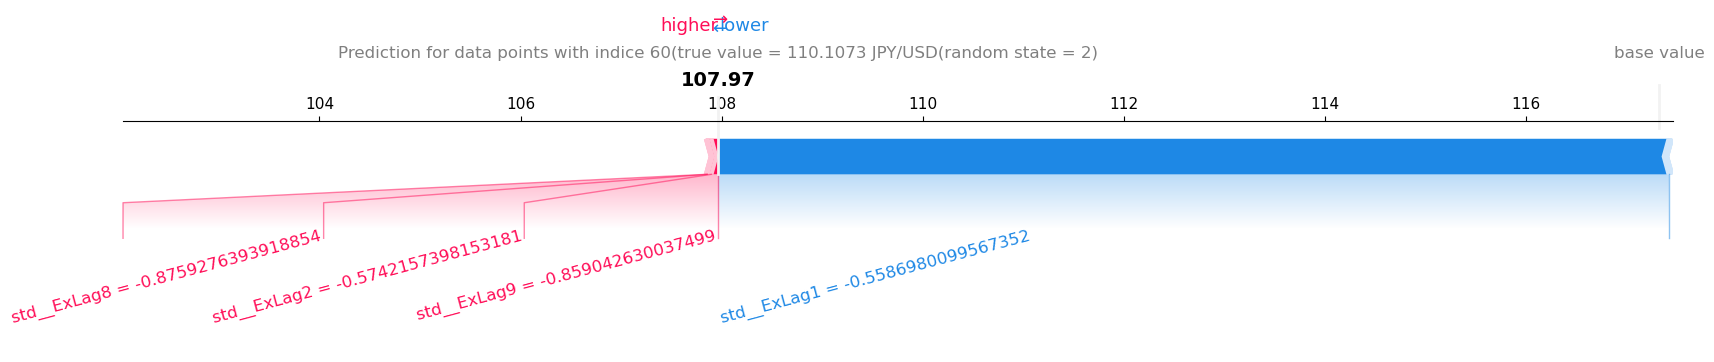

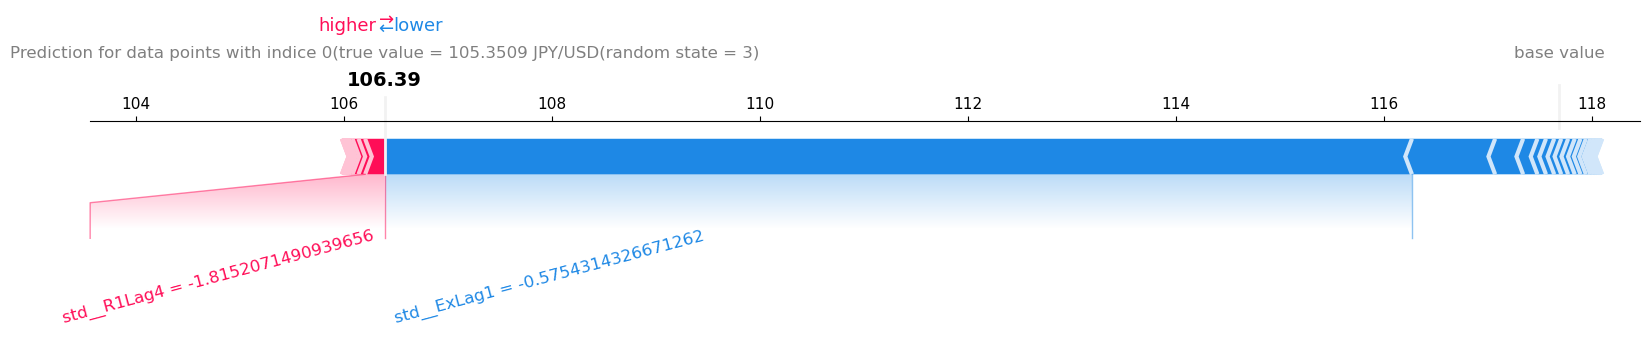

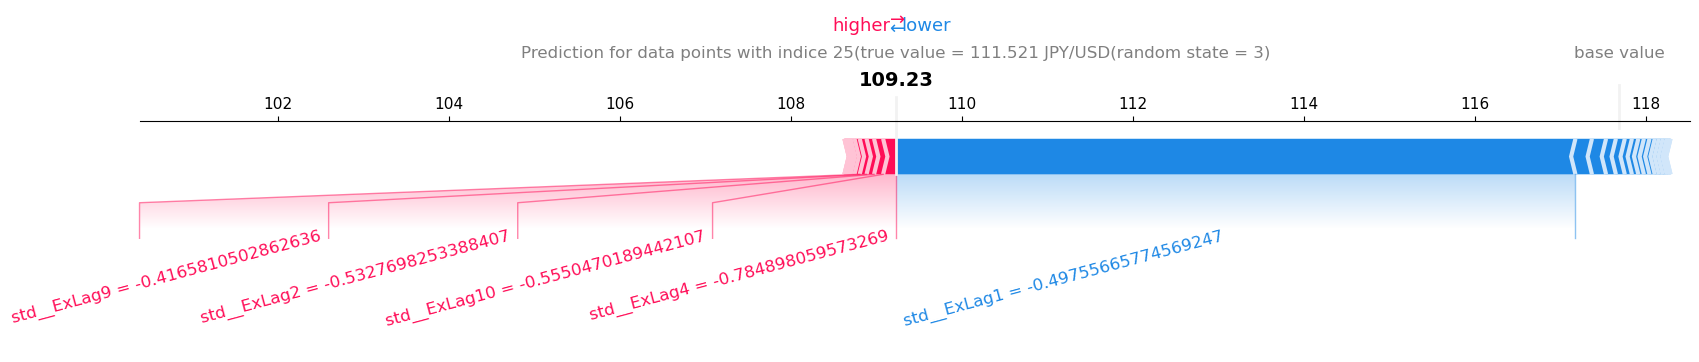

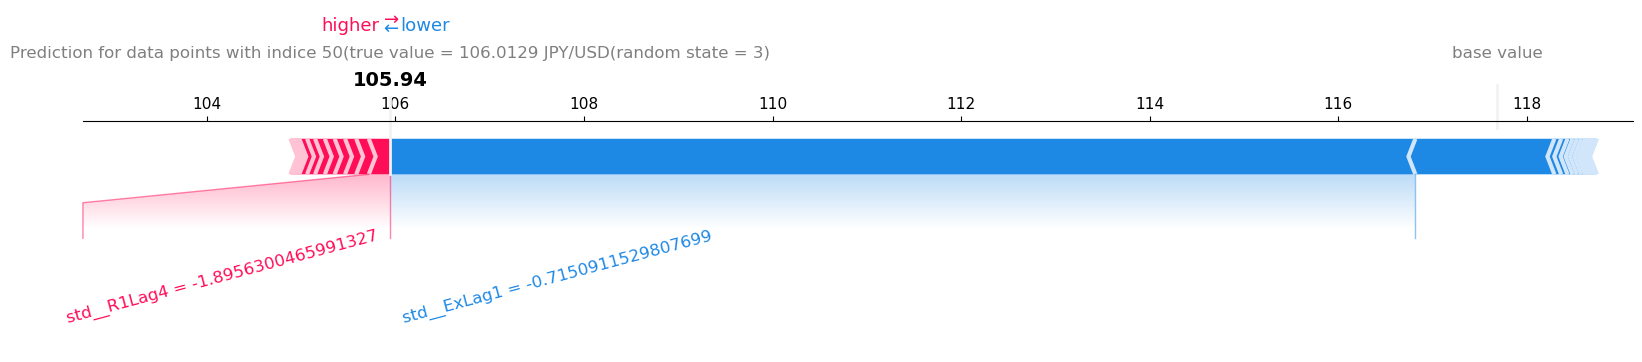

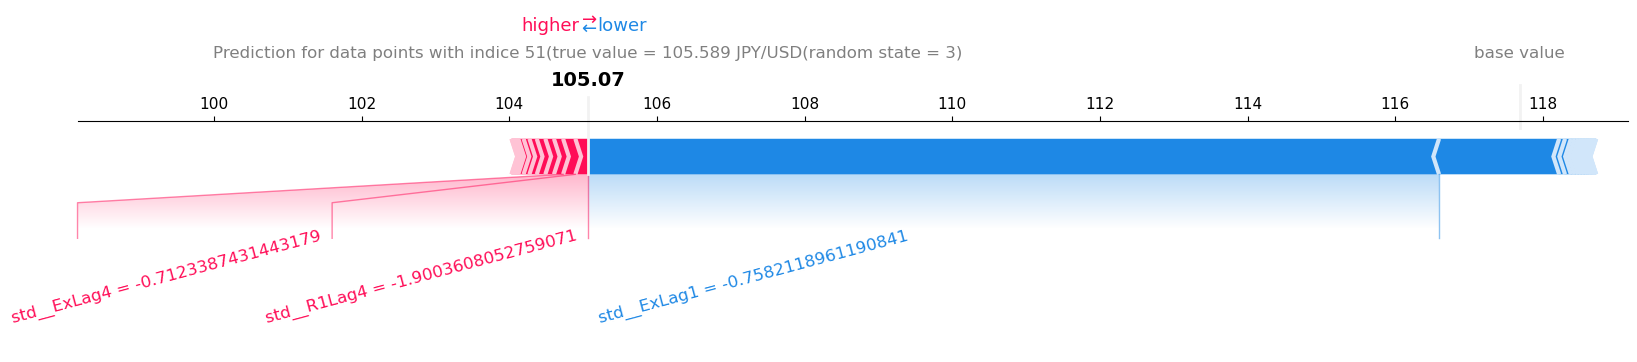

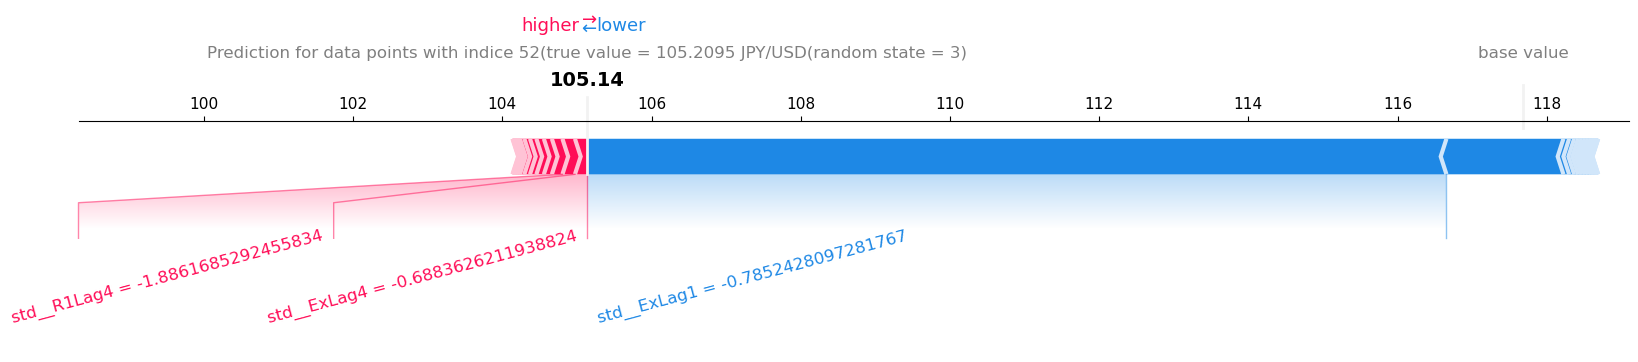

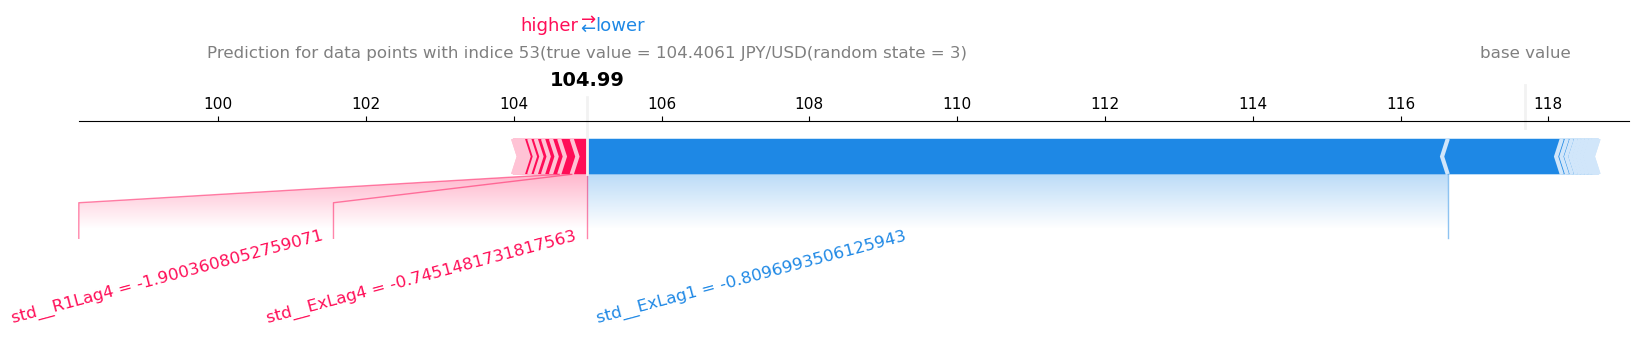

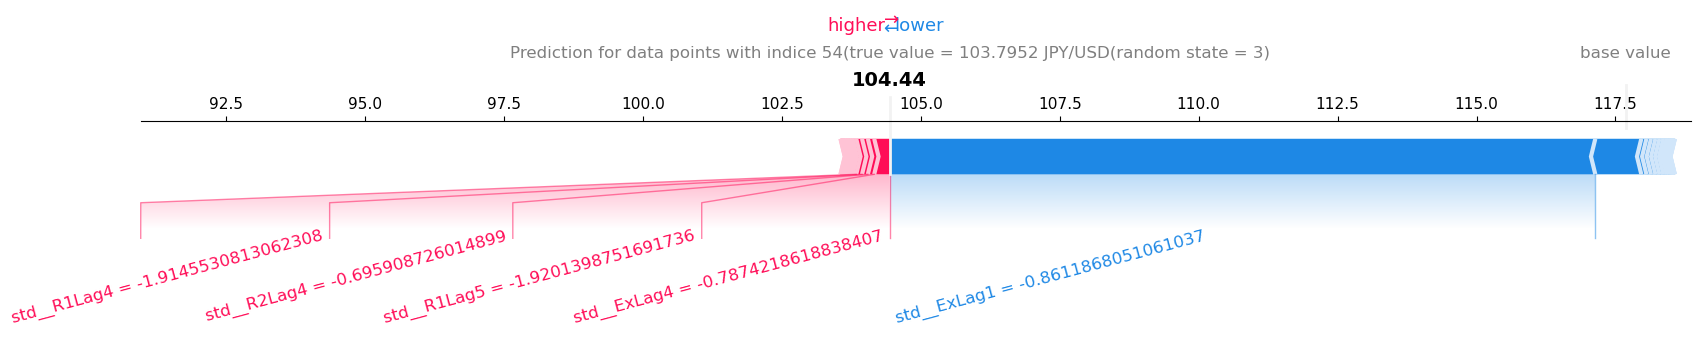

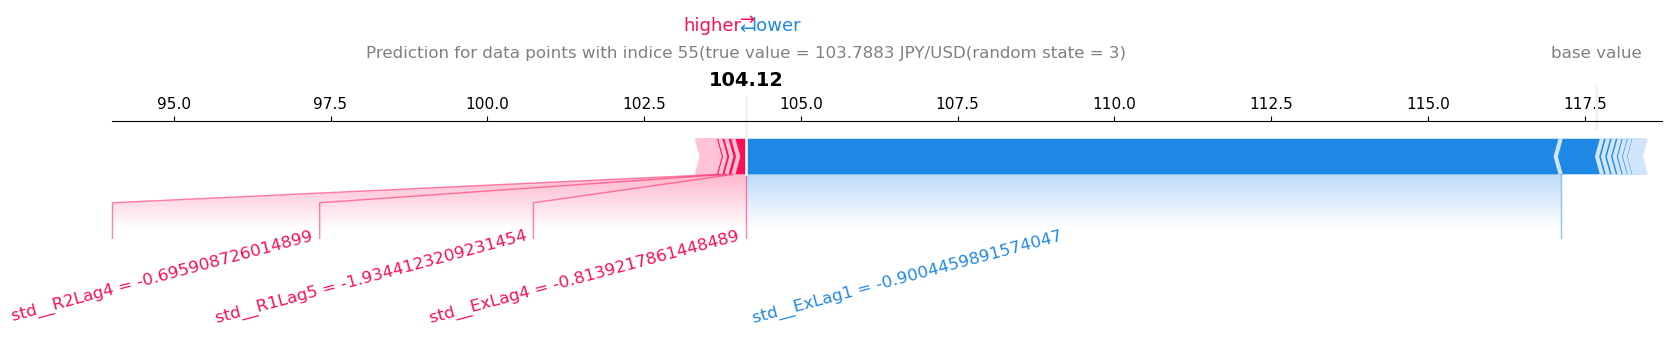

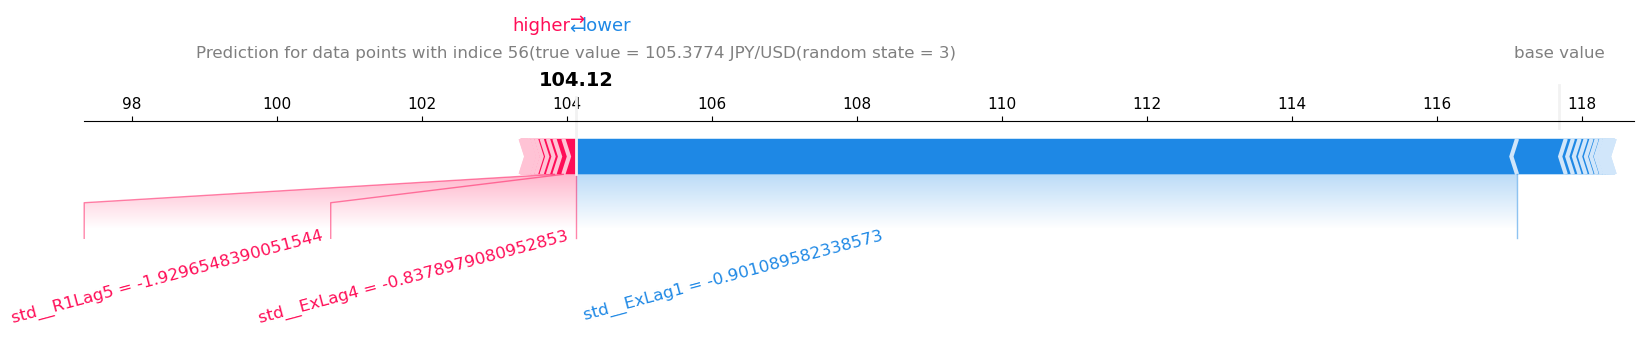

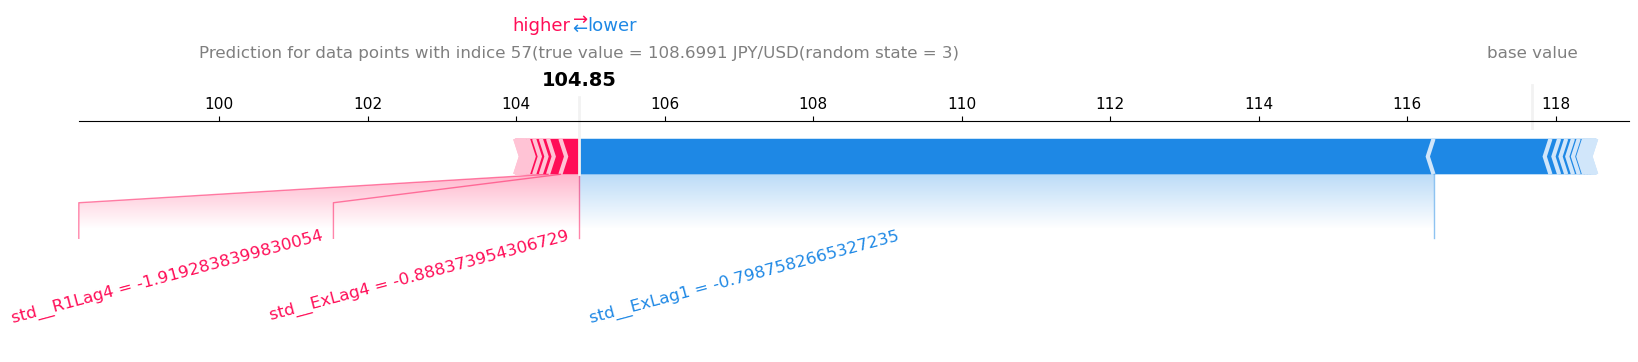

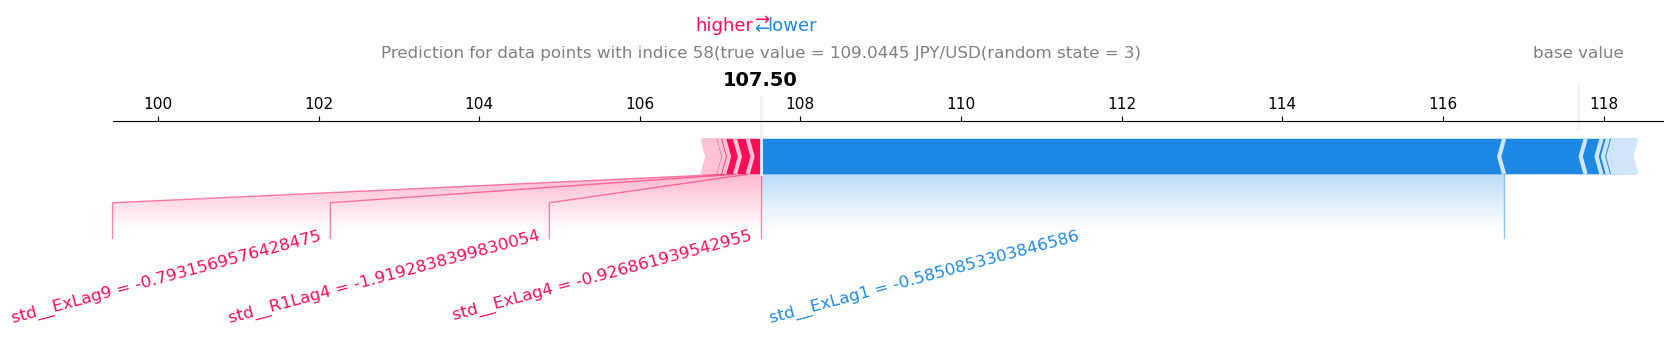

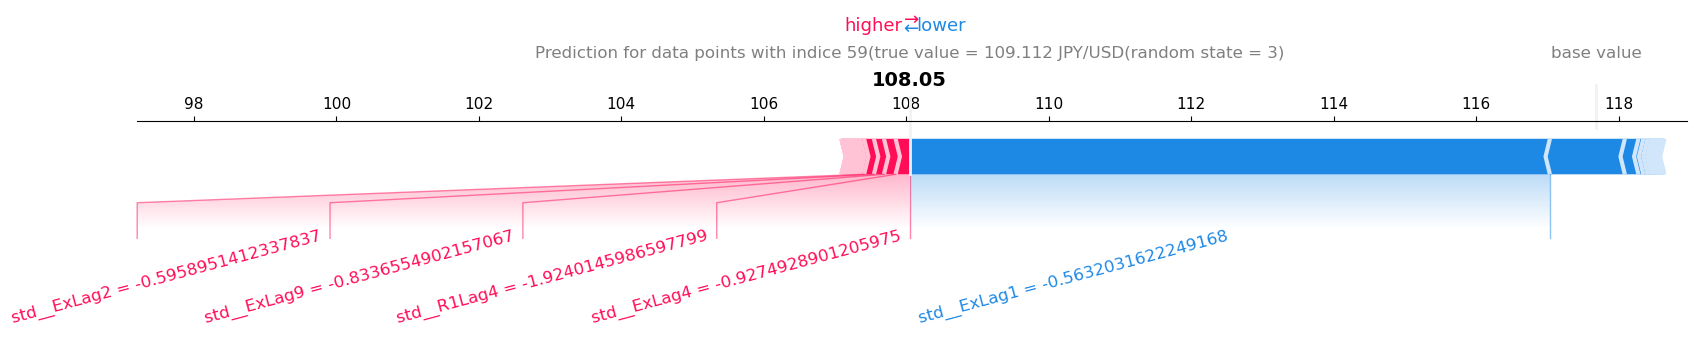

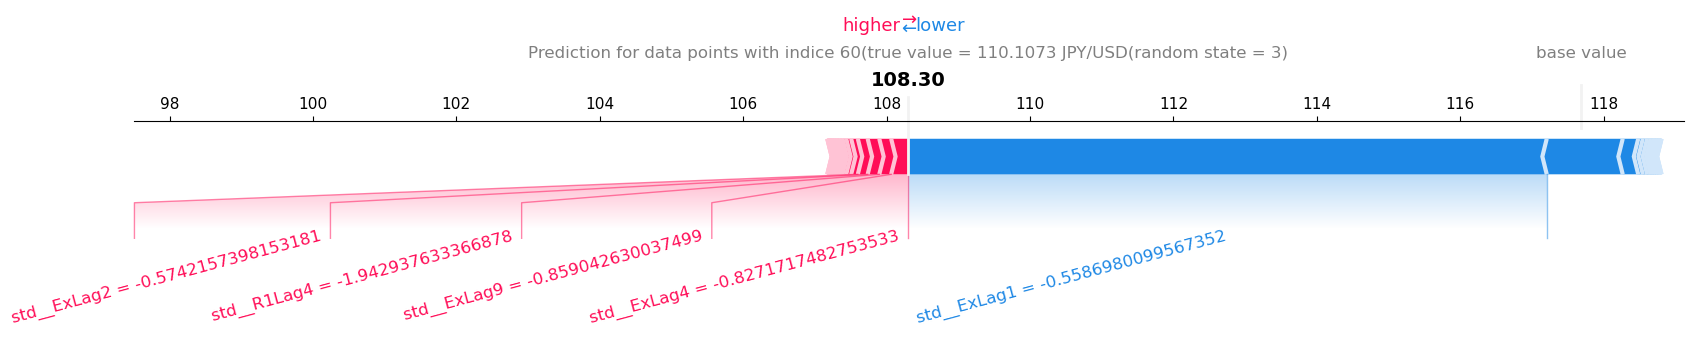

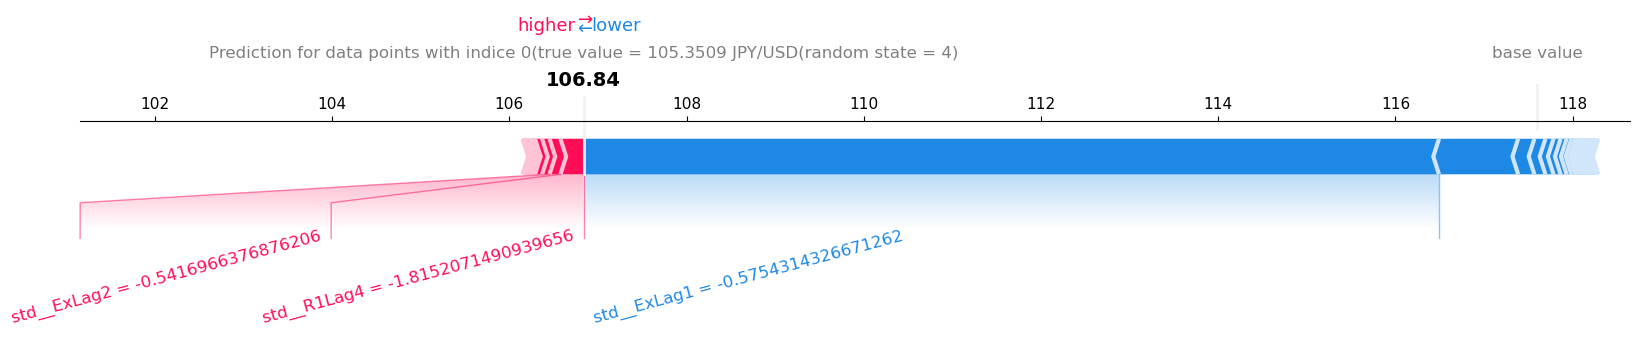

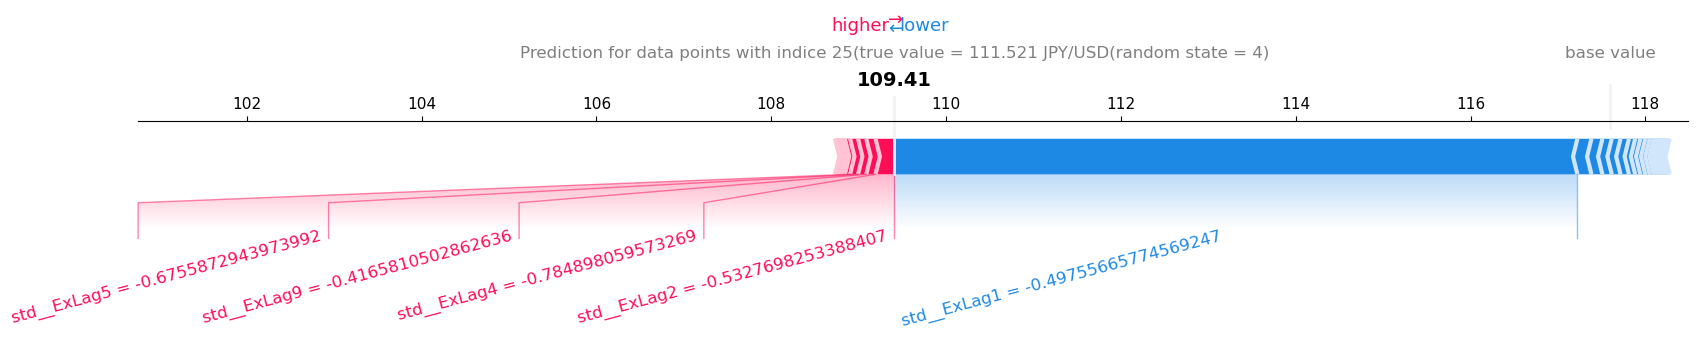

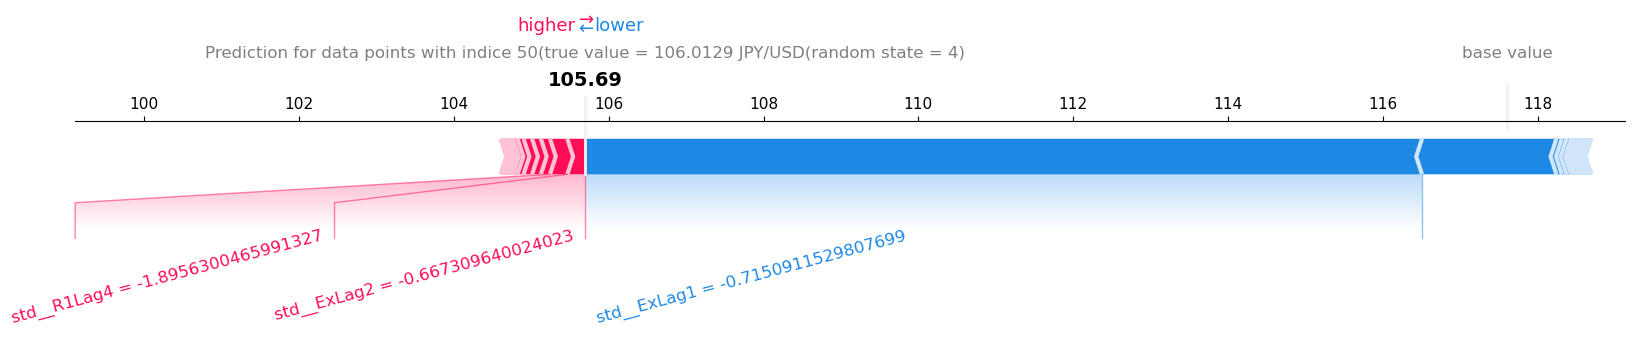

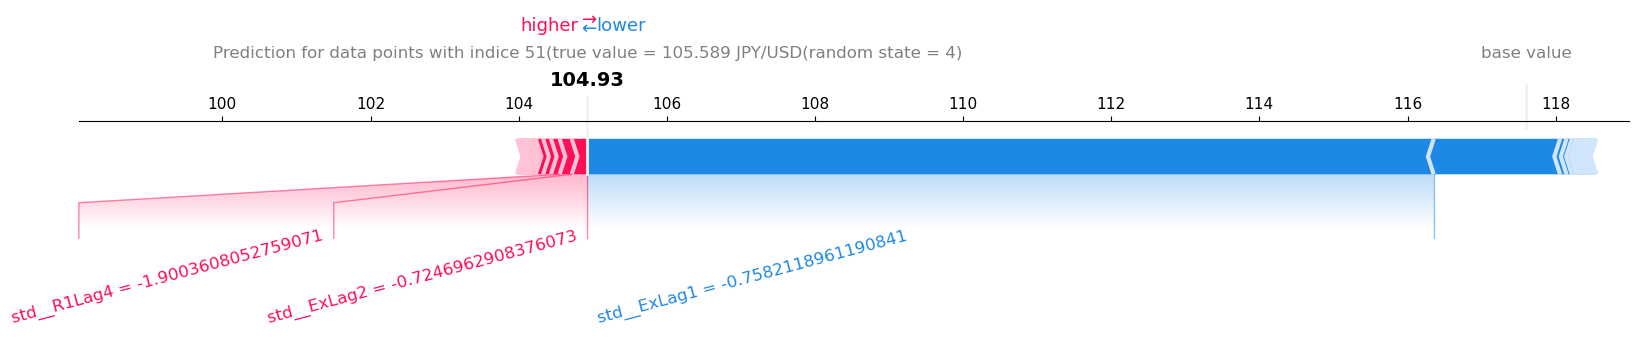

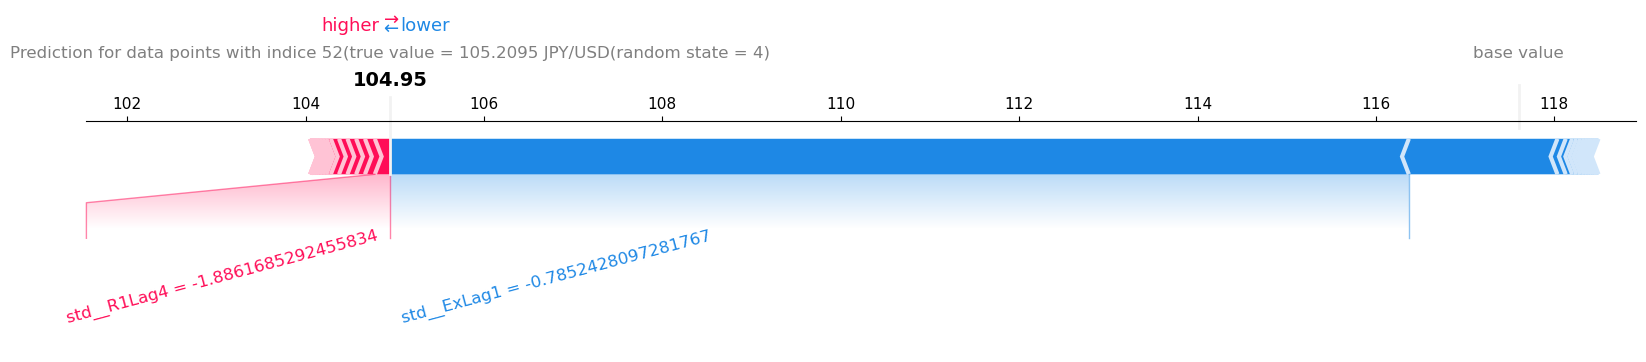

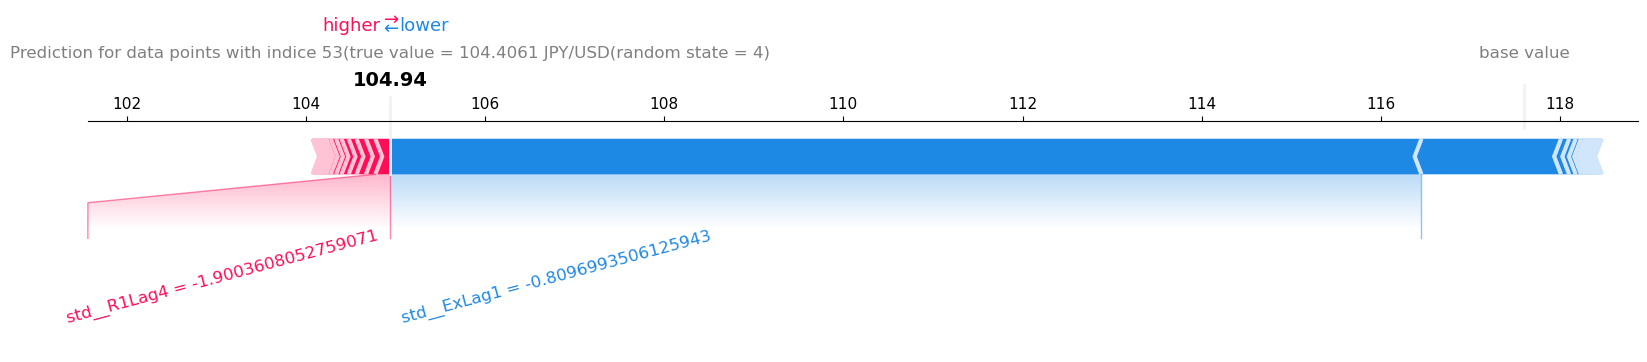

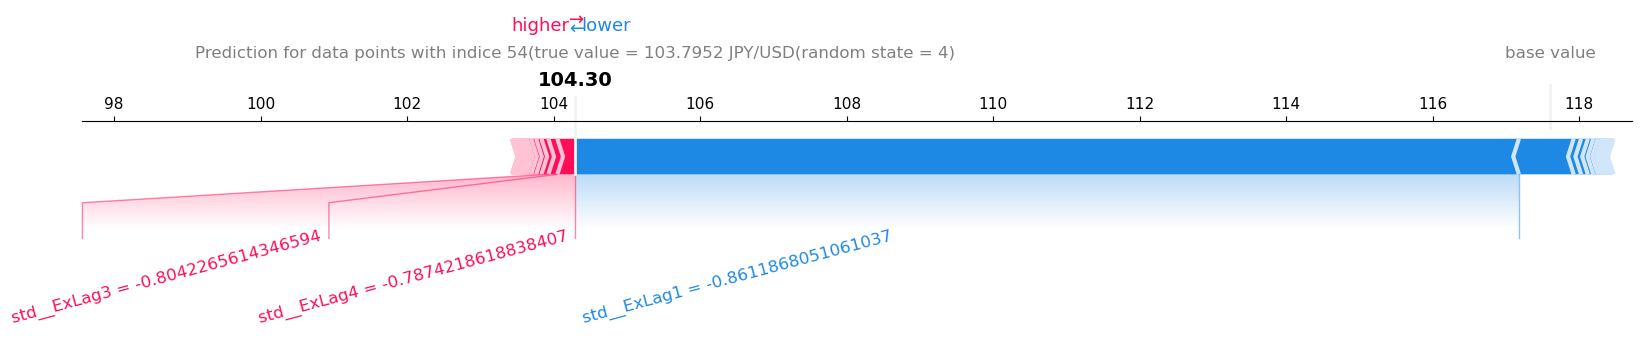

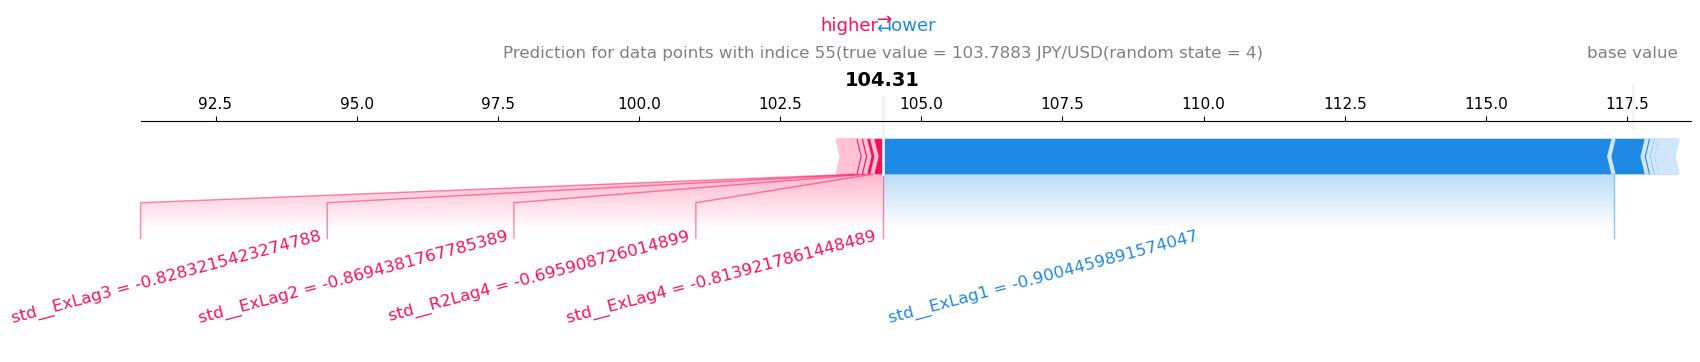

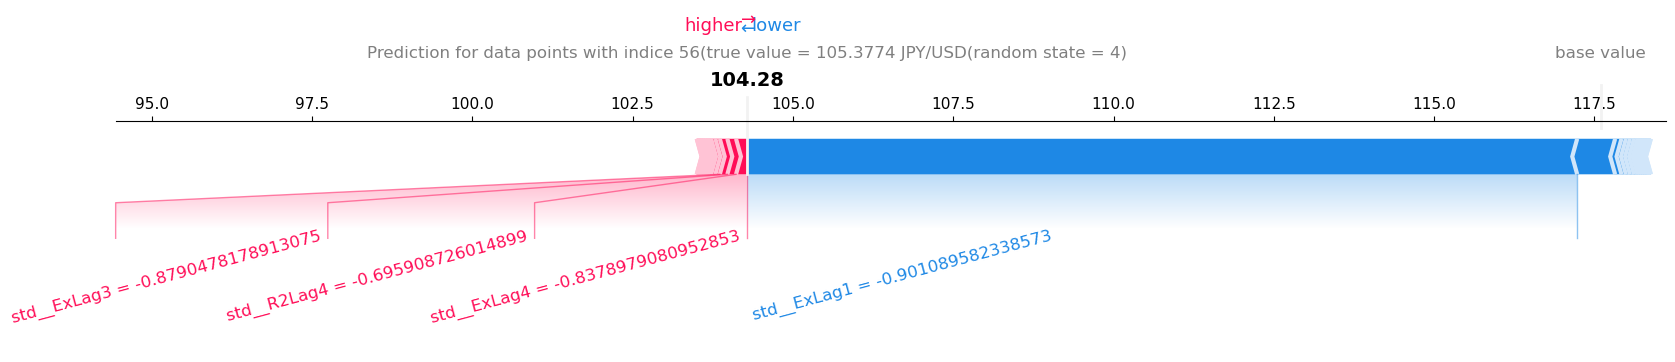

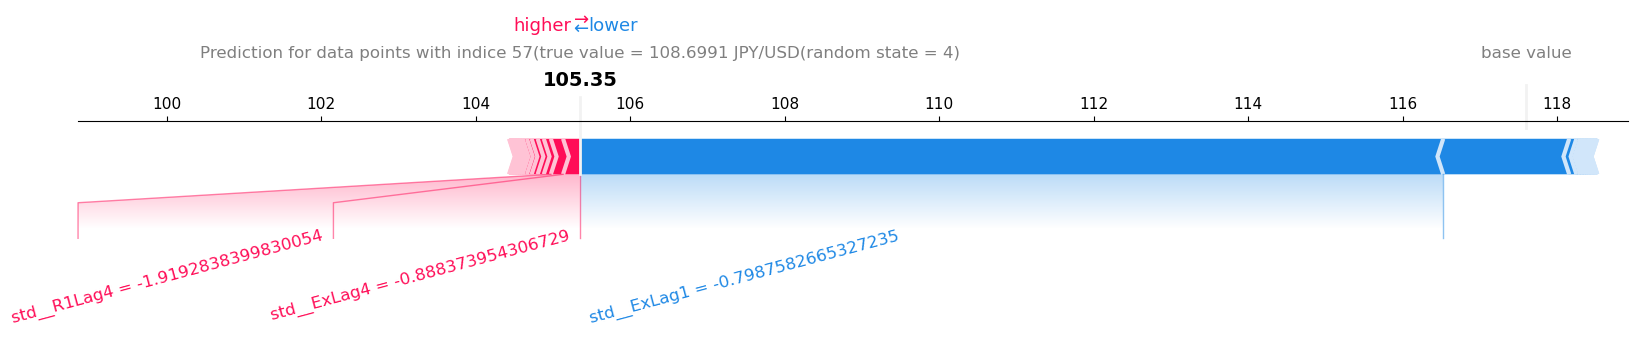

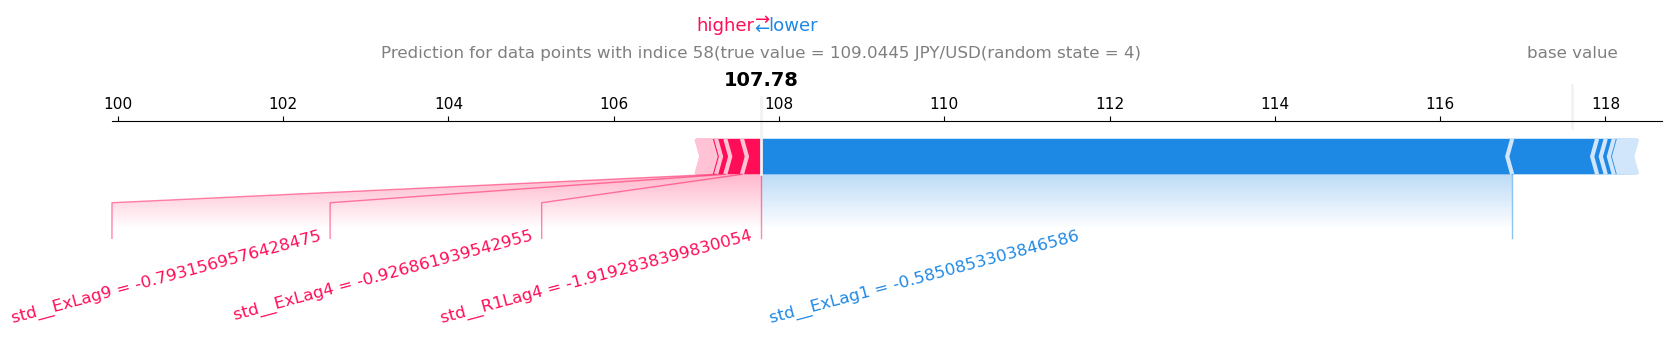

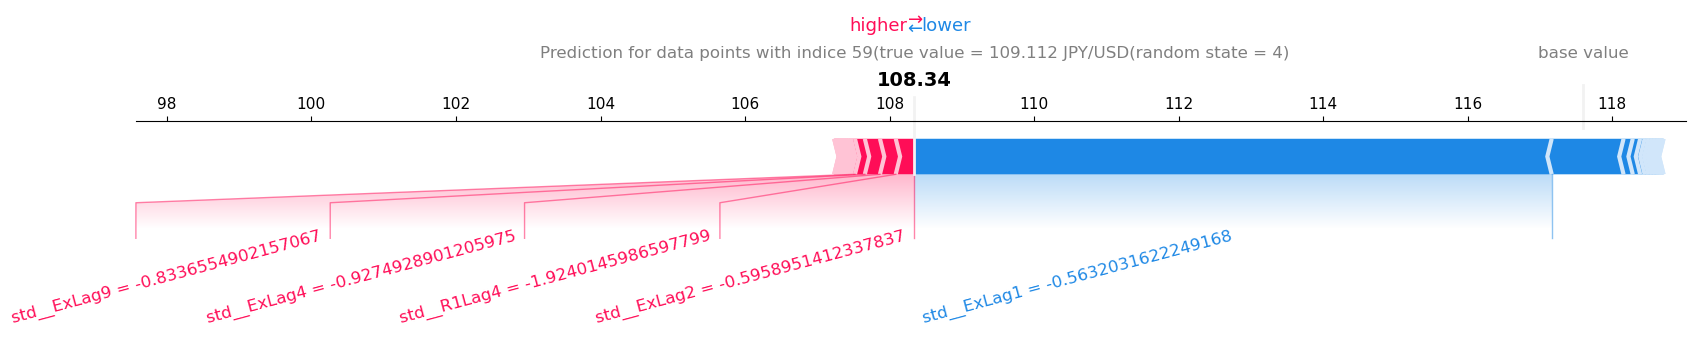

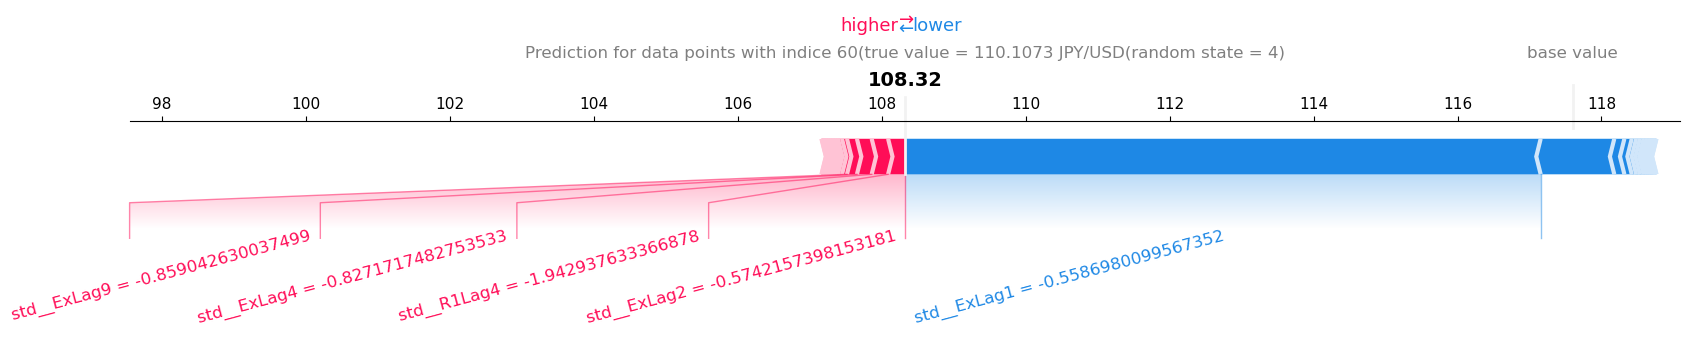

In [56]:
import shap

data_points_indices = [0, 25, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
selected_data_points = df_test_imp.iloc[data_points_indices]

for p in [0,1,2,3,4]:
    explainer = shap.TreeExplainer(best_models[p])

    shap_values = explainer.shap_values(selected_data_points)


    for i in range(len(data_points_indices)):
        
        
        shap.force_plot(
            explainer.expected_value,
            shap_values[i],
            features = selected_data_points.iloc[i],
            feature_names=df_test_imp.columns,
            out_names=f"Prediction for data points with indice {data_points_indices[i]}(true value = {y_test.iloc[data_points_indices[i]]} JPY/USD(random state = {p})",
            matplotlib=True,
            text_rotation=15,
            show=True, 
            
        )
        
       


year
2016    105.3509
2016    104.1910
2016    101.2383
2016    101.7843
2016    103.9075
          ...   
2023    137.0532
2023    141.3581
2023    140.9360
2023    144.7804
2023    147.8450
Name: Ex, Length: 88, dtype: float64


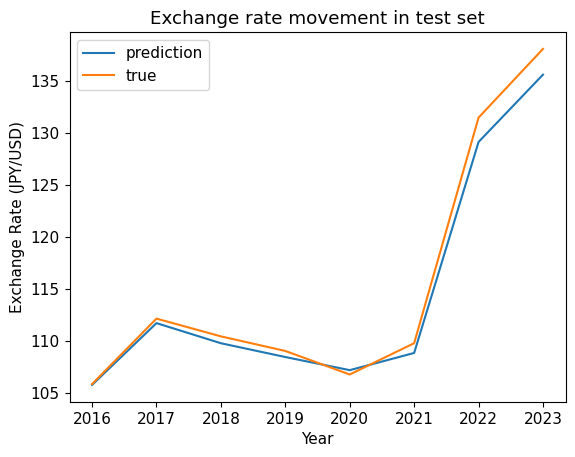

In [57]:
print(y_test)
col_name = y_test.index
df_y_pred = pd.DataFrame(best_models[0].predict(df_test_imp),col_name)





plt.plot(df_y_pred.groupby('year').mean(),label='prediction')
plt.plot(y_test.groupby('year').mean(),label='true')


plt.xlabel('Year')
plt.ylabel('Exchange Rate (JPY/USD)')
plt.title('Exchange rate movement in test set')


plt.legend()

# plt.savefig('figures/true vs prediction', dpi=350)

plt.show()

**<font size="5">KNN**

In [58]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
import warnings

warnings.filterwarnings('ignore', message='X has feature names, but KNeighborsRegressor was fitted without feature names', category=UserWarning)


nss = np.linspace(1, 250, 50).astype(int)
val_rmses = []
test_rmses = []
for n in nss:
    neigh = KNeighborsRegressor(n_neighbors = n,  weights = 'distance')
    neigh.fit(X_train_prep, y_train)
    y_pred = neigh.predict(X_val_prep)
    val_rmse = mean_squared_error(y_val, y_pred, squared = False)
    val_rmses.append(val_rmse)
    y_pred = neigh.predict(df_test_imp)
    test_rmse = mean_squared_error(y_test, y_pred, squared = False)
    test_rmses.append(test_rmse)






In [60]:
best_val = val_rmses[np.argmin(val_rmses)]
best_test = test_rmses[np.argmin(val_rmses)]
best_neigh = nss[np.argmin(val_rmses)]

best_model = KNeighborsRegressor(nss[np.argsort(val_rmses)[0]],  weights = 'distance')
best_model.fit(X_train_prep, y_train)
y_pred_test = best_model.predict(df_test_imp)


# result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
    
# result_df.to_csv('results/KNN_prediction.csv', index=False)
    
print("Predictions saved to /results/KNN_predictioncsv")

# save_path = "results/best_model_of_KNN.joblib"
# joblib.dump(final_models, save_path)
# print(f"Model saved to {save_path}")


print(best_val)
print(best_test)
print(best_neigh)



test_rmses = [best_test]*5
print(test_rmses)
global_scores = np.vstack((global_scores, test_rmses))
print(global_scores)

Predictions saved to /results/KNN_predictioncsv
9.417513871543504
9.770537196953168
1
[9.770537196953168, 9.770537196953168, 9.770537196953168, 9.770537196953168, 9.770537196953168]
[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]
 [9.7705372  9.7705372  9.7705372  9.7705372  9.7705372 ]]


**<font size="5">calculate baseline RMSE**

In [61]:
#calculate baseline score
base = np.mean(y_test)
bases = [base]*len(y_test)
baseline = mean_squared_error(y_test, bases, squared = False)
print(baseline)

11.932031854798263


**<font size="5">show performance for all the models**

[[3.22898415 3.22916188 3.22911707 3.22922974 3.22896684]
 [3.15711877 3.15922488 3.14623752 3.15166202 3.15842221]
 [5.13703002 5.13703002 5.13703002 5.13703002 5.13703002]
 [2.90006913 3.18806157 2.87913146 3.22353019 3.31258516]
 [9.7705372  9.7705372  9.7705372  9.7705372  9.7705372 ]]
      Ridge     Lasso  XGBoost        RF       KNN
0  3.228984  3.157119  5.13703  2.900069  9.770537
1  3.229162  3.159225  5.13703  3.188062  9.770537
2  3.229117  3.146238  5.13703  2.879131  9.770537
3  3.229230  3.151662  5.13703  3.223530  9.770537
4  3.228967  3.158422  5.13703  3.312585  9.770537


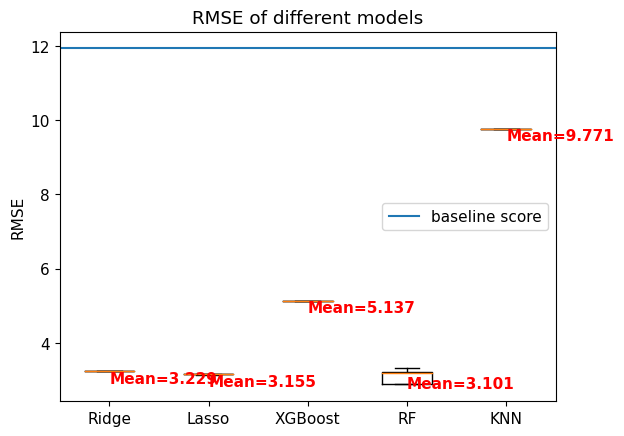

RF


In [62]:
import matplotlib.pyplot as plt
print(global_scores)

df_global_scores = pd.DataFrame(global_scores.T, columns = ['Ridge','Lasso','XGBoost', 'RF', 'KNN'])
print(df_global_scores)
plt.boxplot(df_global_scores, labels = df_global_scores.columns)
means = np.mean(df_global_scores, axis=0)
for i, mean_value in enumerate(means):
    plt.text(i + 1, mean_value, f'Mean={mean_value:.3f}', ha='left', va='top', color='red', fontweight='bold')

plt.ylabel('RMSE')
plt.title('RMSE of different models')
plt.axhline(baseline,label='baseline score')
plt.legend()
# plt.savefig('figures/RMSEs', dpi=350)

plt.show()
print(df_global_scores.columns[np.argmin(np.mean(df_global_scores, axis = 0))])